# Bike Rentals

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from itertools import combinations

import pdpexplorer
from pdpexplorer.pdp import partial_dependence, plot

In [2]:
df_original = pd.read_csv('bike-sharing.csv').drop(columns=['yr'])

In [3]:
categories = ['weathersit']
df_one_hot = pd.get_dummies(df_original, columns=categories)

In [4]:
feature_to_one_hot = {
    original_feat: [
        (feat, feat.split('_')[-1])
        for feat in df_one_hot.columns
        if feat.startswith(original_feat)
    ]
    for original_feat in categories
}
feature_to_one_hot

{'weathersit': [('weathersit_1', '1'),
  ('weathersit_2', '2'),
  ('weathersit_3', '3')]}

In [5]:
df_X = df_one_hot.drop(columns=['label', 'prediction'])

In [6]:
y = df_original['label'].to_numpy()

In [7]:
regr = RandomForestRegressor(n_estimators=20)
regr.fit(df_X, y)

RandomForestRegressor(n_estimators=20)

In [8]:
features = [col for col in df_original.columns if col != 'label' and col != 'prediction']
pairs = list(combinations(features, 2))

In [9]:
pd_data = partial_dependence(
    predict=regr.predict,
    df=df_X,
    one_way_features=features,
    two_way_feature_pairs=pairs,
    one_hot_features=feature_to_one_hot,
    n_instances=100,
    resolution=20,
    n_jobs=1,
)

[[[ 0.0000e+00]
  [-3.0000e-01]
  [ 6.5000e-01]]

 [[ 0.0000e+00]
  [-5.5000e-01]
  [-1.5000e+00]]

 [[ 0.0000e+00]
  [-2.1450e+01]
  [-1.6050e+01]]

 [[ 0.0000e+00]
  [ 1.0500e+00]
  [-1.0000e-01]]

 [[ 0.0000e+00]
  [ 1.2000e+01]
  [-6.9000e+00]]

 [[ 0.0000e+00]
  [ 7.1500e+00]
  [-1.0900e+01]]

 [[ 0.0000e+00]
  [-1.0500e+00]
  [-4.4900e+01]]

 [[ 0.0000e+00]
  [ 1.0000e-01]
  [-1.0000e+00]]

 [[ 0.0000e+00]
  [ 0.0000e+00]
  [-3.3750e+01]]

 [[ 0.0000e+00]
  [-2.7500e+01]
  [ 2.8000e+00]]

 [[ 0.0000e+00]
  [-2.4700e+01]
  [-7.2000e+00]]

 [[ 0.0000e+00]
  [-2.6700e+01]
  [-4.6400e+01]]

 [[ 0.0000e+00]
  [-1.3300e+01]
  [ 4.8500e+00]]

 [[ 0.0000e+00]
  [ 3.6000e+00]
  [-1.4340e+02]]

 [[ 0.0000e+00]
  [ 2.3850e+01]
  [-1.2500e+01]]

 [[ 0.0000e+00]
  [-2.6500e+00]
  [-1.0000e+00]]

 [[ 0.0000e+00]
  [-8.6750e+01]
  [-2.0370e+02]]

 [[ 0.0000e+00]
  [-9.0000e+00]
  [-7.4000e+00]]

 [[ 0.0000e+00]
  [ 4.0000e+00]
  [-6.5700e+01]]

 [[ 0.0000e+00]
  [-4.5000e-01]
  [-9.8750e+01]]



[[[ 0.0000e+00]
  [-2.5000e-01]
  [-2.5000e-01]
  [-8.0000e-01]
  [-2.1000e+00]
  [-2.1000e+00]
  [-2.1000e+00]]

 [[ 0.0000e+00]
  [ 0.0000e+00]
  [-4.5000e-01]
  [ 1.0000e-01]
  [ 6.0000e-01]
  [ 4.3500e+00]
  [ 4.3500e+00]]

 [[ 0.0000e+00]
  [-1.4500e+00]
  [-1.4500e+00]
  [ 2.3000e+00]
  [ 2.1350e+01]
  [ 2.1350e+01]
  [ 2.1350e+01]]

 [[ 0.0000e+00]
  [ 0.0000e+00]
  [ 7.5000e-01]
  [ 3.5000e-01]
  [ 0.0000e+00]
  [ 5.0000e-01]
  [ 5.0000e-01]]

 [[ 0.0000e+00]
  [-1.4500e+00]
  [-1.7350e+01]
  [-2.6950e+01]
  [-1.2000e+01]
  [-1.2000e+01]
  [ 4.0000e+01]]

 [[ 0.0000e+00]
  [ 0.0000e+00]
  [-2.1500e+00]
  [-7.7000e+00]
  [-7.1500e+00]
  [ 4.7250e+01]
  [ 6.5150e+01]]

 [[ 0.0000e+00]
  [ 0.0000e+00]
  [ 1.5000e-01]
  [-3.8000e+00]
  [ 2.5850e+01]
  [ 1.6000e+01]
  [ 3.5350e+01]]

 [[ 0.0000e+00]
  [ 0.0000e+00]
  [ 2.5000e-01]
  [ 2.0500e+00]
  [ 9.0000e-01]
  [ 1.3500e+00]
  [ 1.3500e+00]]

 [[ 0.0000e+00]
  [-4.8500e+00]
  [-3.9000e+00]
  [ 6.3500e+00]
  [ 1.4350e+01]
  [ 6.27

[[[ 0.  ]
  [ 0.  ]
  [-0.85]
  ...
  [ 6.25]
  [ 6.25]
  [ 6.25]]

 [[ 0.  ]
  [ 0.  ]
  [-1.  ]
  ...
  [-1.05]
  [-1.05]
  [-1.05]]

 [[ 0.  ]
  [ 0.  ]
  [ 0.  ]
  ...
  [-2.3 ]
  [-2.3 ]
  [-2.3 ]]

 ...

 [[ 0.  ]
  [ 0.  ]
  [-0.65]
  ...
  [-1.35]
  [-1.35]
  [-1.35]]

 [[ 0.  ]
  [ 0.  ]
  [-0.6 ]
  ...
  [-1.8 ]
  [-1.8 ]
  [-1.8 ]]

 [[ 0.  ]
  [ 0.  ]
  [ 1.15]
  ...
  [-0.45]
  [-0.45]
  [-0.45]]]
[[[ 0.00000000e+00]
  [ 5.00000000e-02]
  [-5.00000000e-02]
  [-1.60000000e+00]
  [-1.95000000e+00]
  [-1.95000000e+00]
  [-3.30000000e+00]
  [-3.55000000e+00]]

 [[ 0.00000000e+00]
  [-1.55000000e+00]
  [-1.05000000e+00]
  [-9.50000000e-01]
  [-1.50000000e-01]
  [-3.50000000e-01]
  [ 1.00000000e-01]
  [-4.00000000e-01]]

 [[ 0.00000000e+00]
  [ 1.27500000e+01]
  [ 1.28000000e+01]
  [ 2.13000000e+01]
  [ 8.45000000e+00]
  [-7.25000000e+00]
  [-7.25000000e+00]
  [-7.25000000e+00]]

 [[ 0.00000000e+00]
  [ 9.00000000e-01]
  [ 9.50000000e-01]
  [ 3.00000000e-01]
  [ 6.00000000e-01]


[[[  0.  ]
  [ -5.6 ]
  [-35.9 ]
  ...
  [ 62.05]
  [ 51.05]
  [ 28.25]]

 [[  0.  ]
  [-26.4 ]
  [-54.45]
  ...
  [188.9 ]
  [157.8 ]
  [113.75]]

 [[  0.  ]
  [-62.95]
  [-87.6 ]
  ...
  [ 16.2 ]
  [ -6.45]
  [-75.65]]

 ...

 [[  0.  ]
  [-21.35]
  [ -3.3 ]
  ...
  [218.9 ]
  [166.  ]
  [ 63.4 ]]

 [[  0.  ]
  [-31.65]
  [-35.55]
  ...
  [163.8 ]
  [ 99.45]
  [ 79.  ]]

 [[  0.  ]
  [-35.9 ]
  [-35.6 ]
  ...
  [176.  ]
  [117.4 ]
  [ 55.5 ]]]
[[[ 0.0000e+00]
  [ 0.0000e+00]
  [-1.0000e-01]
  [-1.5000e-01]]

 [[ 0.0000e+00]
  [ 1.2000e+00]
  [ 1.5500e+00]
  [ 1.6000e+00]]

 [[ 0.0000e+00]
  [ 0.0000e+00]
  [ 1.9500e+00]
  [-3.0000e-01]]

 [[ 0.0000e+00]
  [ 4.5000e-01]
  [ 3.5000e-01]
  [ 3.5000e-01]]

 [[ 0.0000e+00]
  [ 1.5175e+02]
  [ 1.4005e+02]
  [ 1.2870e+02]]

 [[ 0.0000e+00]
  [ 7.1050e+01]
  [ 7.5200e+01]
  [ 7.9800e+01]]

 [[ 0.0000e+00]
  [ 4.9750e+01]
  [ 4.9750e+01]
  [ 4.9750e+01]]

 [[ 0.0000e+00]
  [ 1.1200e+01]
  [ 1.4600e+01]
  [ 1.6800e+01]]

 [[ 0.0000e+00]
  [ 2.

In [10]:
w = pdpexplorer.PDPExplorerWidget(
    predict=regr.predict,
    df=df_X,
    one_hot_features=feature_to_one_hot,
    pd_data=pd_data,
    n_jobs=8,
    height=600
)

w

PDPExplorerWidget(double_pdps=[{'num_features': 2, 'kind': 'quantitative', 'id': 'season_mnth', 'x_feature': '…

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [12]:
one_way_pdps, two_way_pdps = plot(
    data=pd_data,
    one_way_sort_by='good_fit',
    two_way_sort_by='h',
    same_prediction_scale=True
);

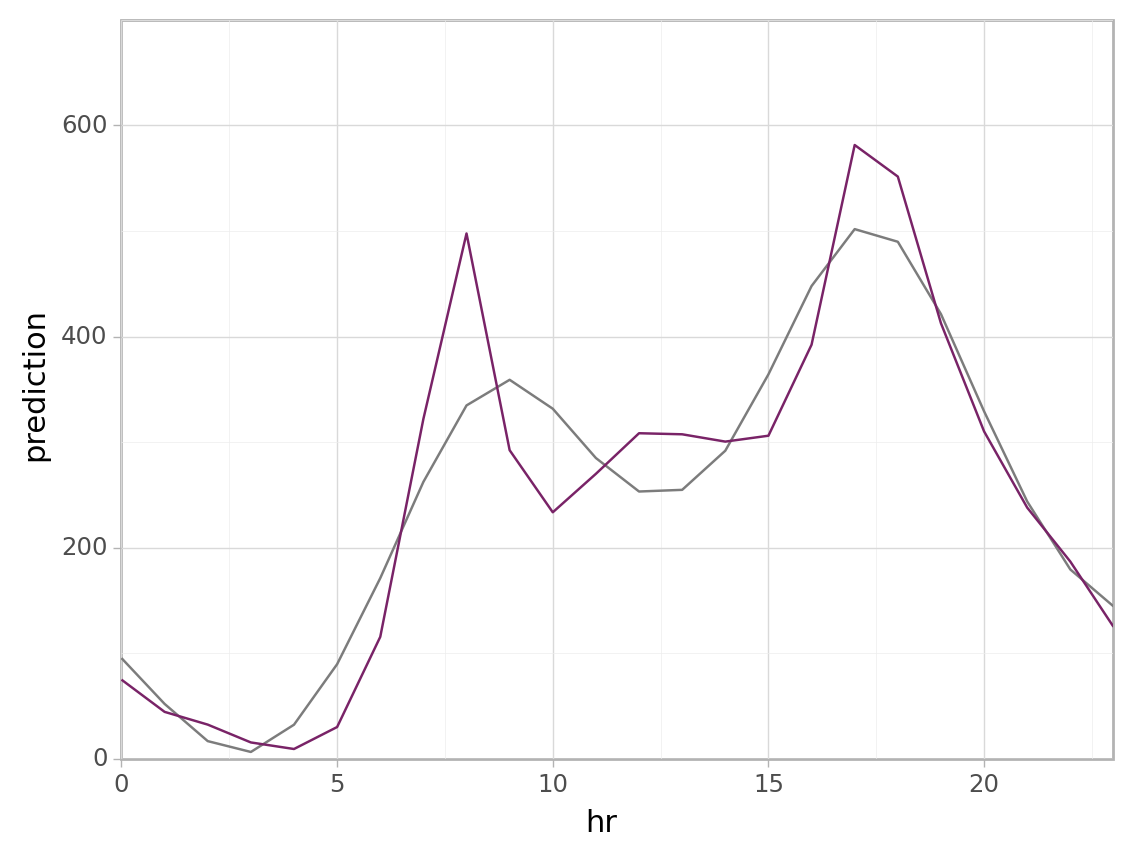

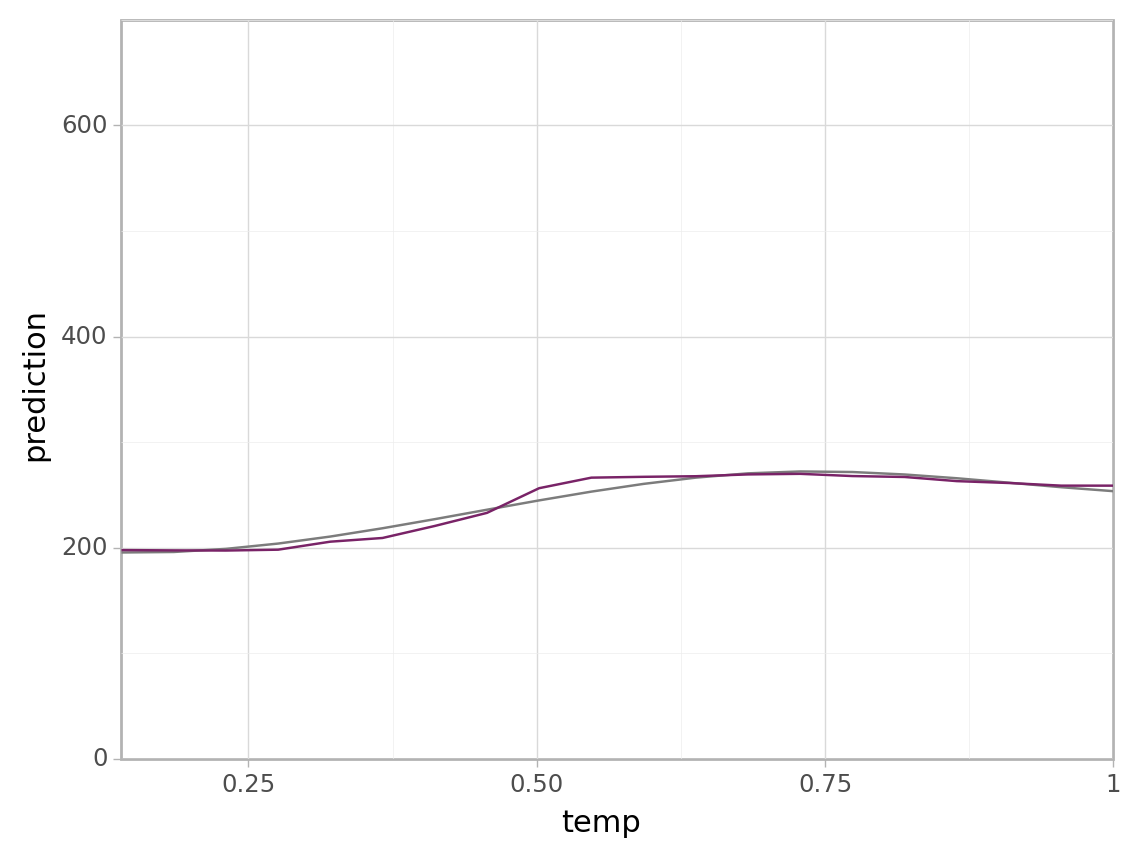

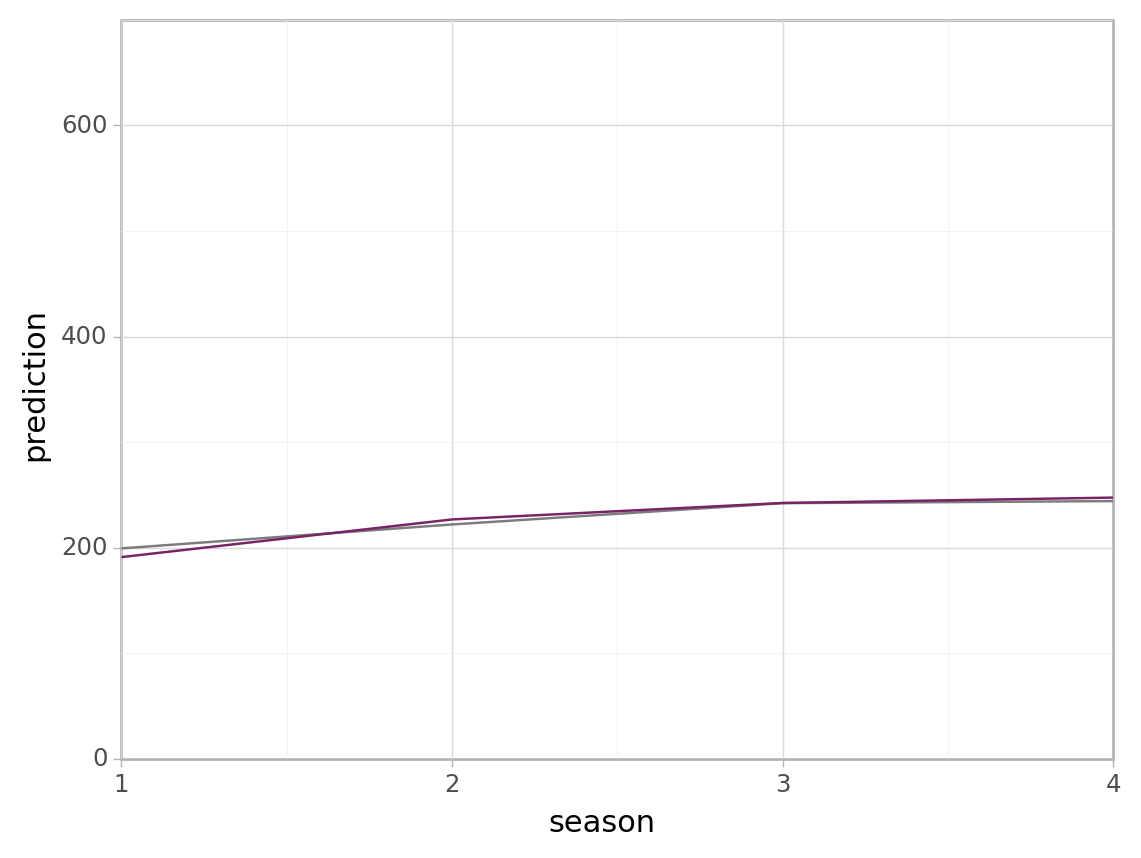

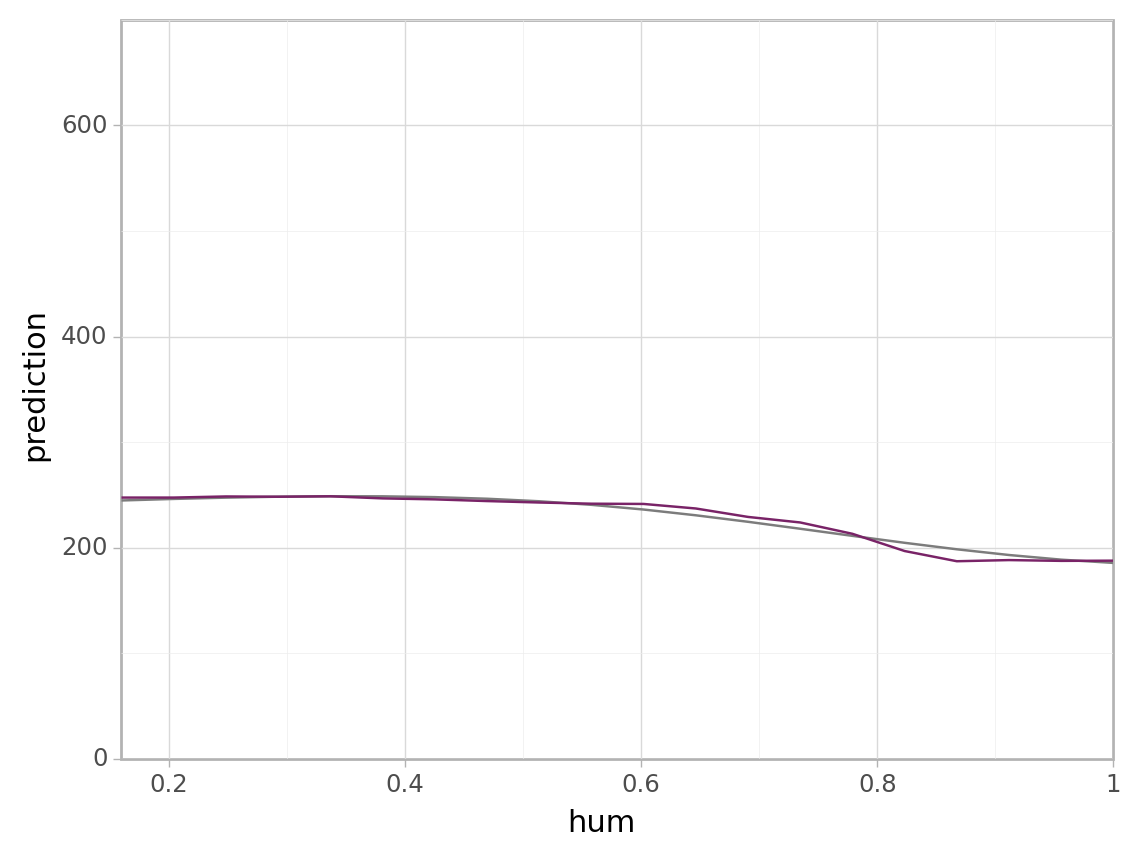

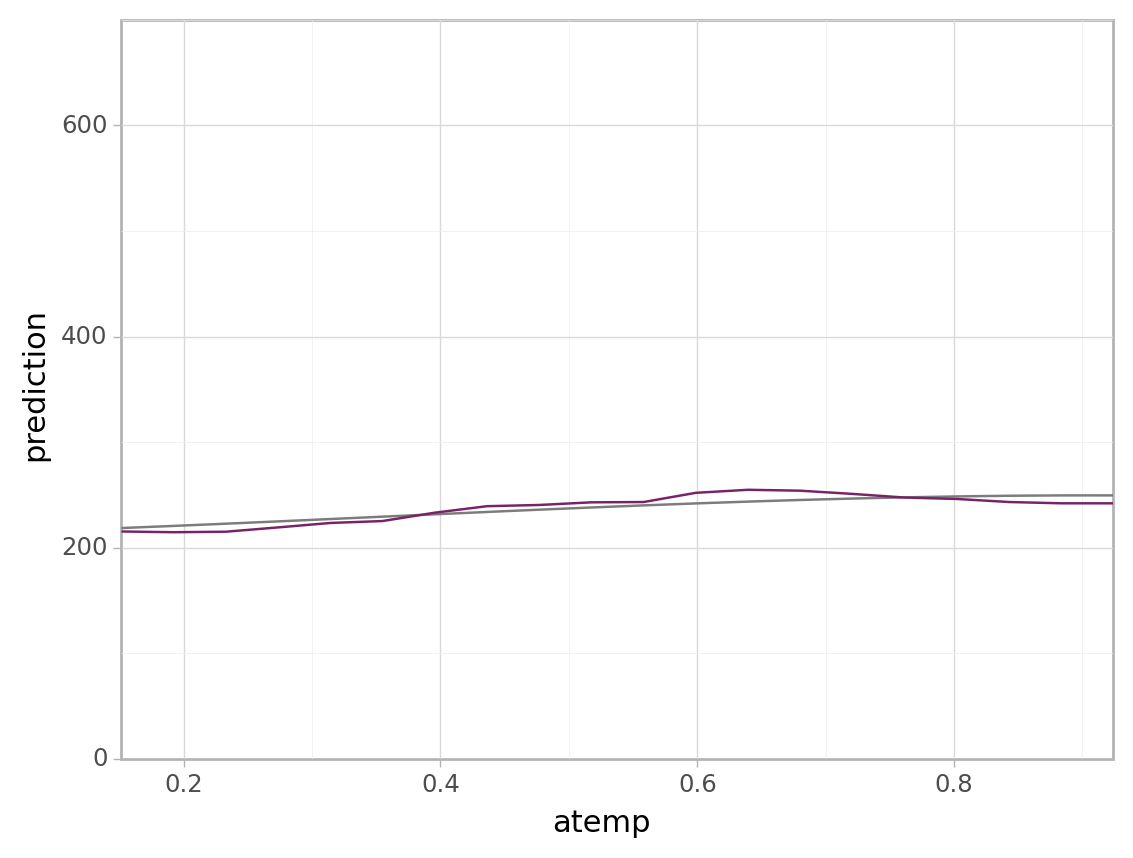

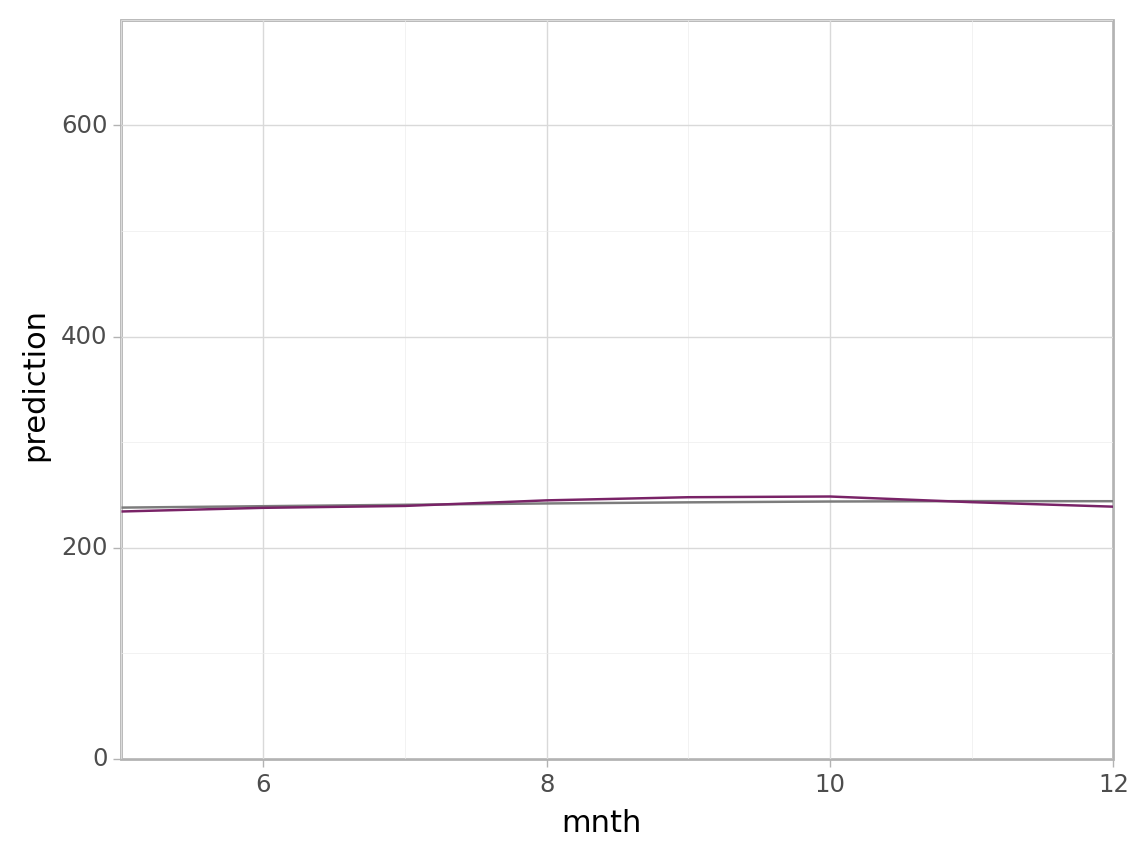

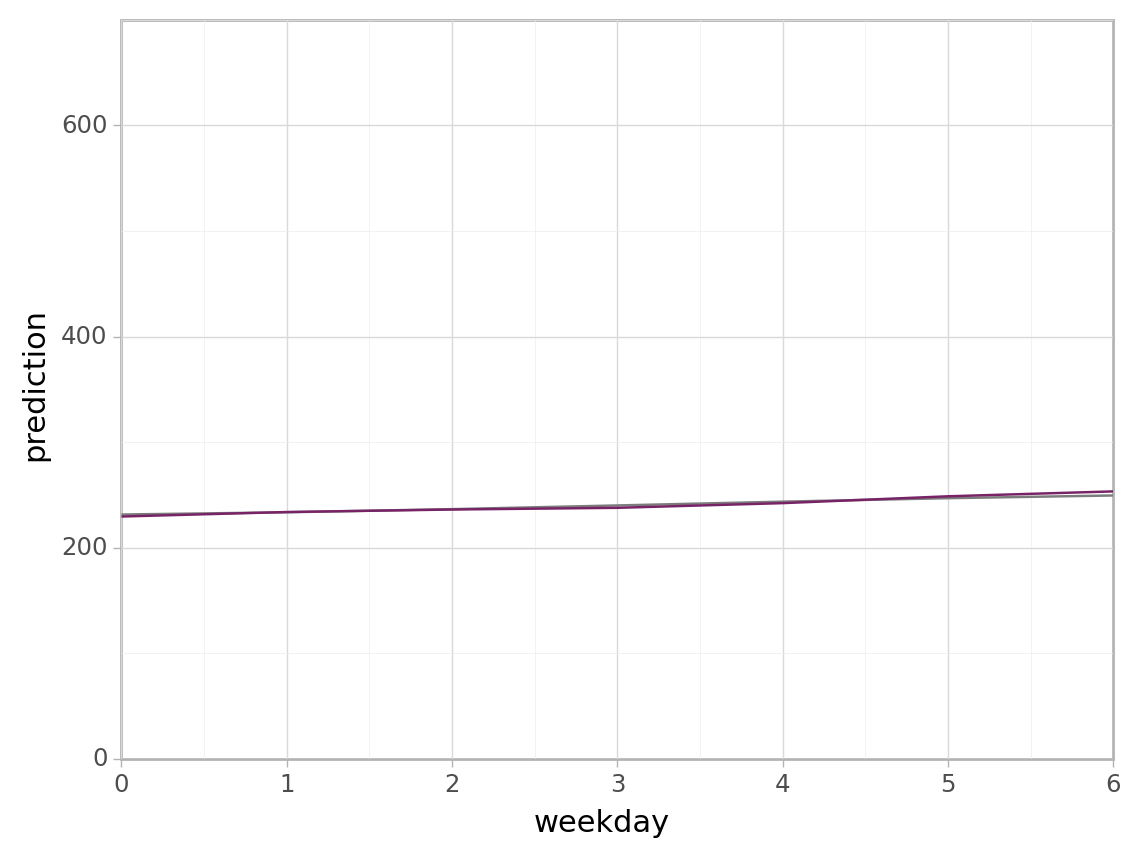

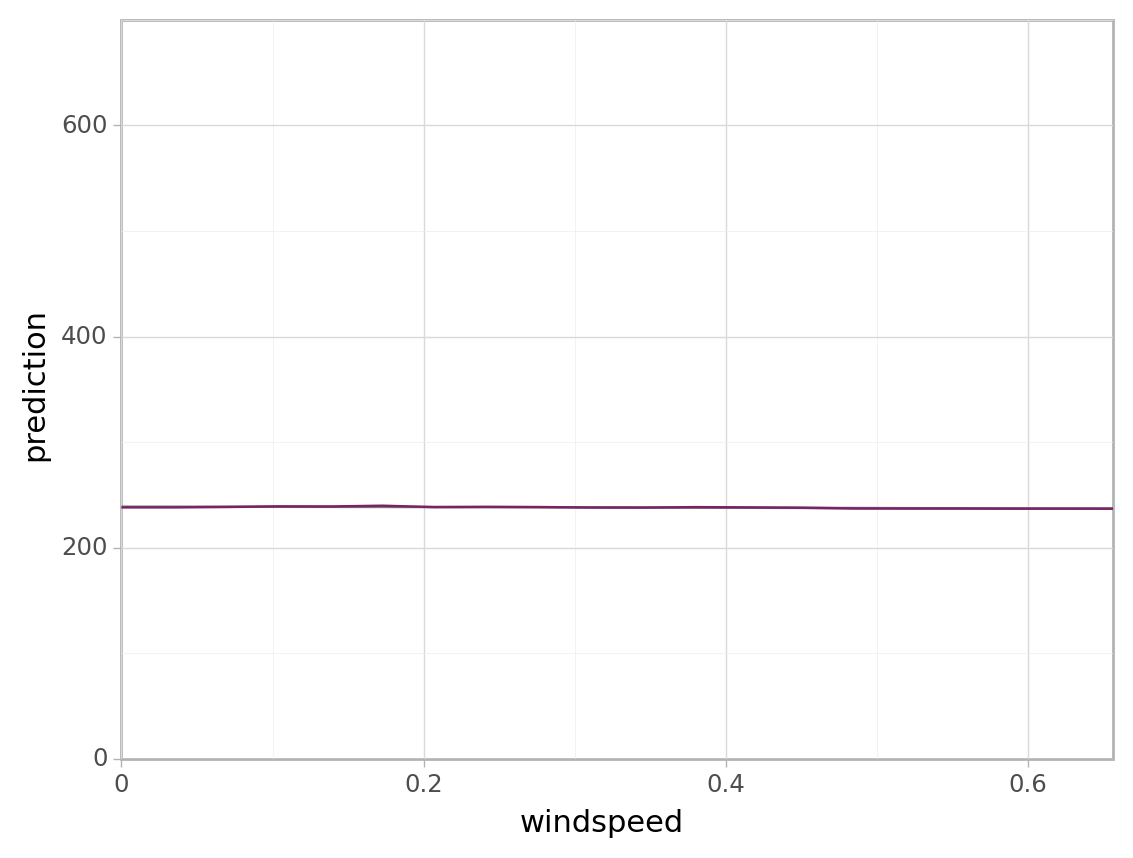

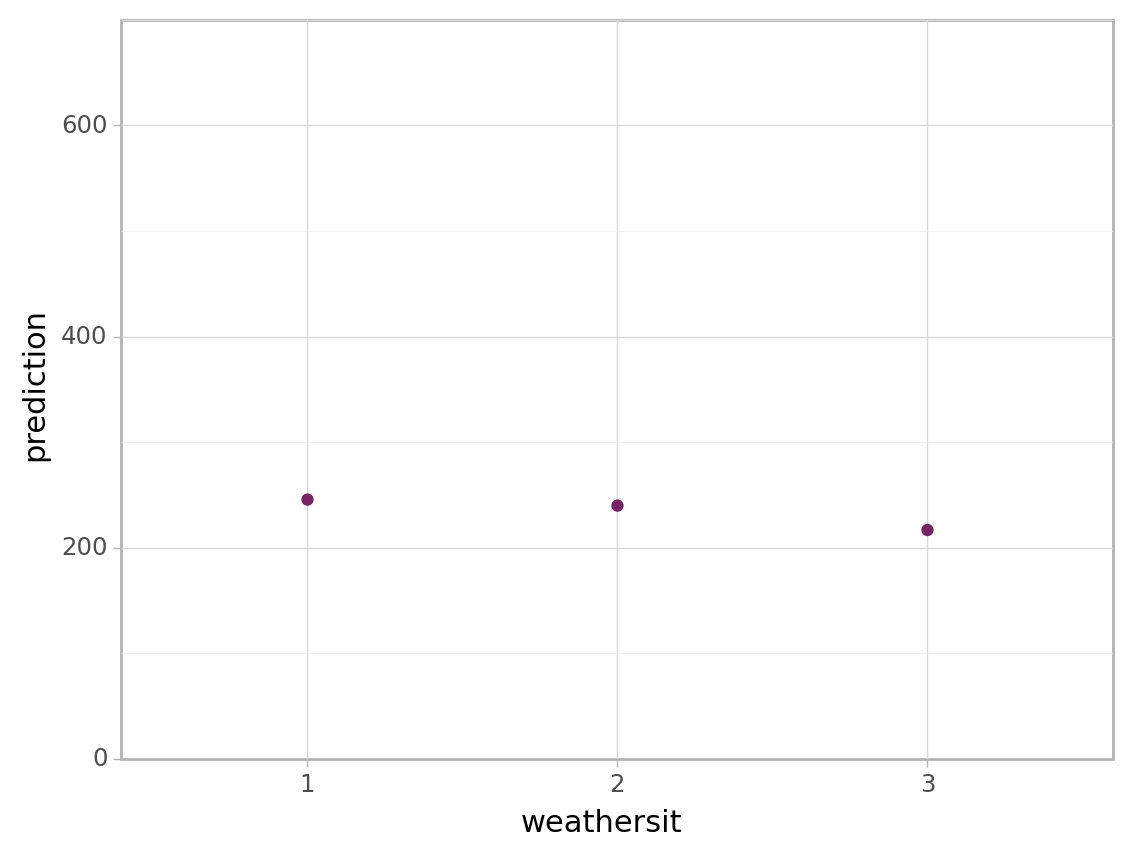

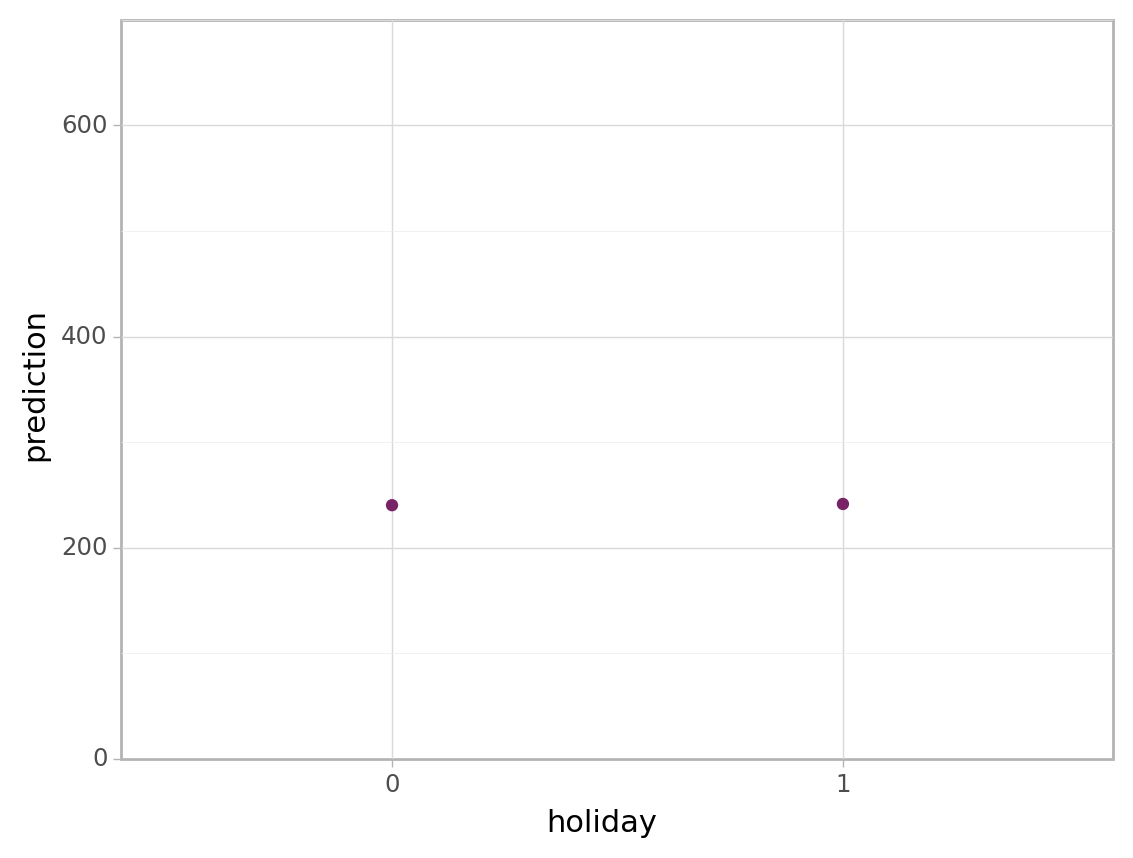

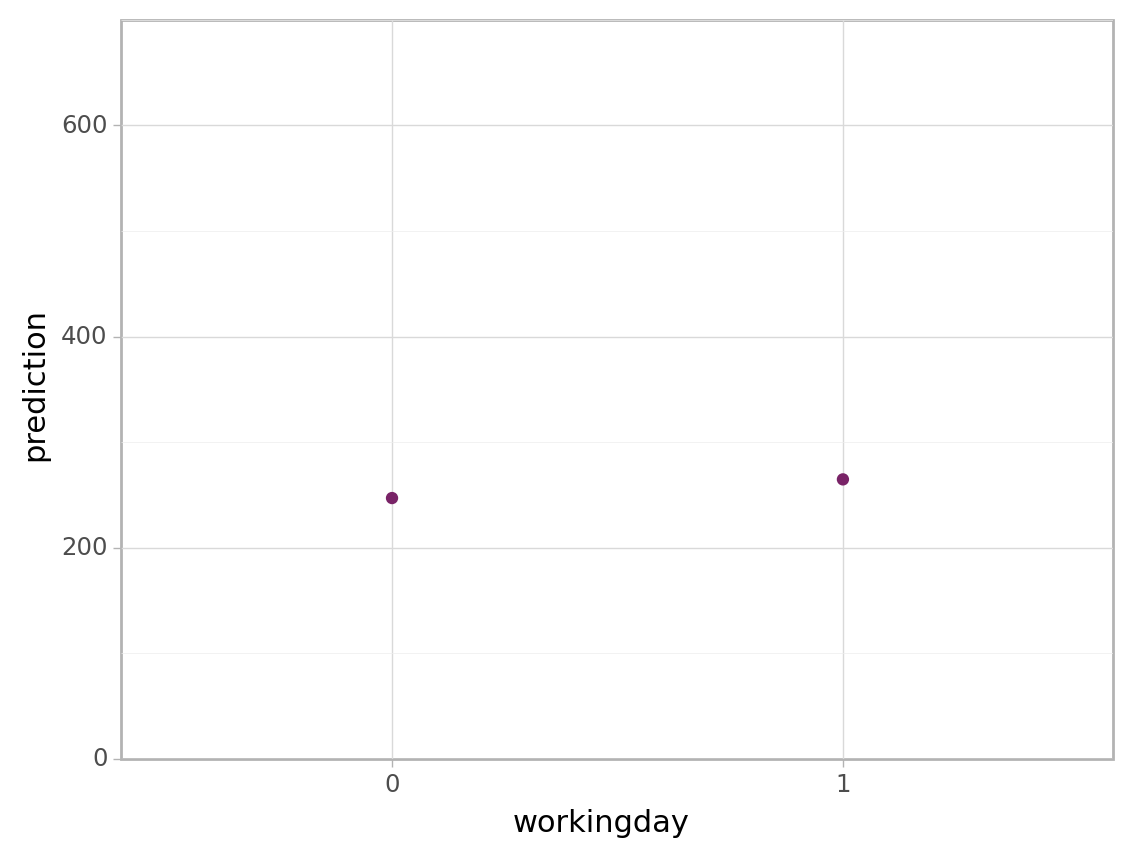

In [13]:
[p.draw() for p in one_way_pdps];

/Users/Dan/anaconda3/envs/pdpexplorer/lib/python3.10/site-packages/plotnine/ggplot.py:365: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


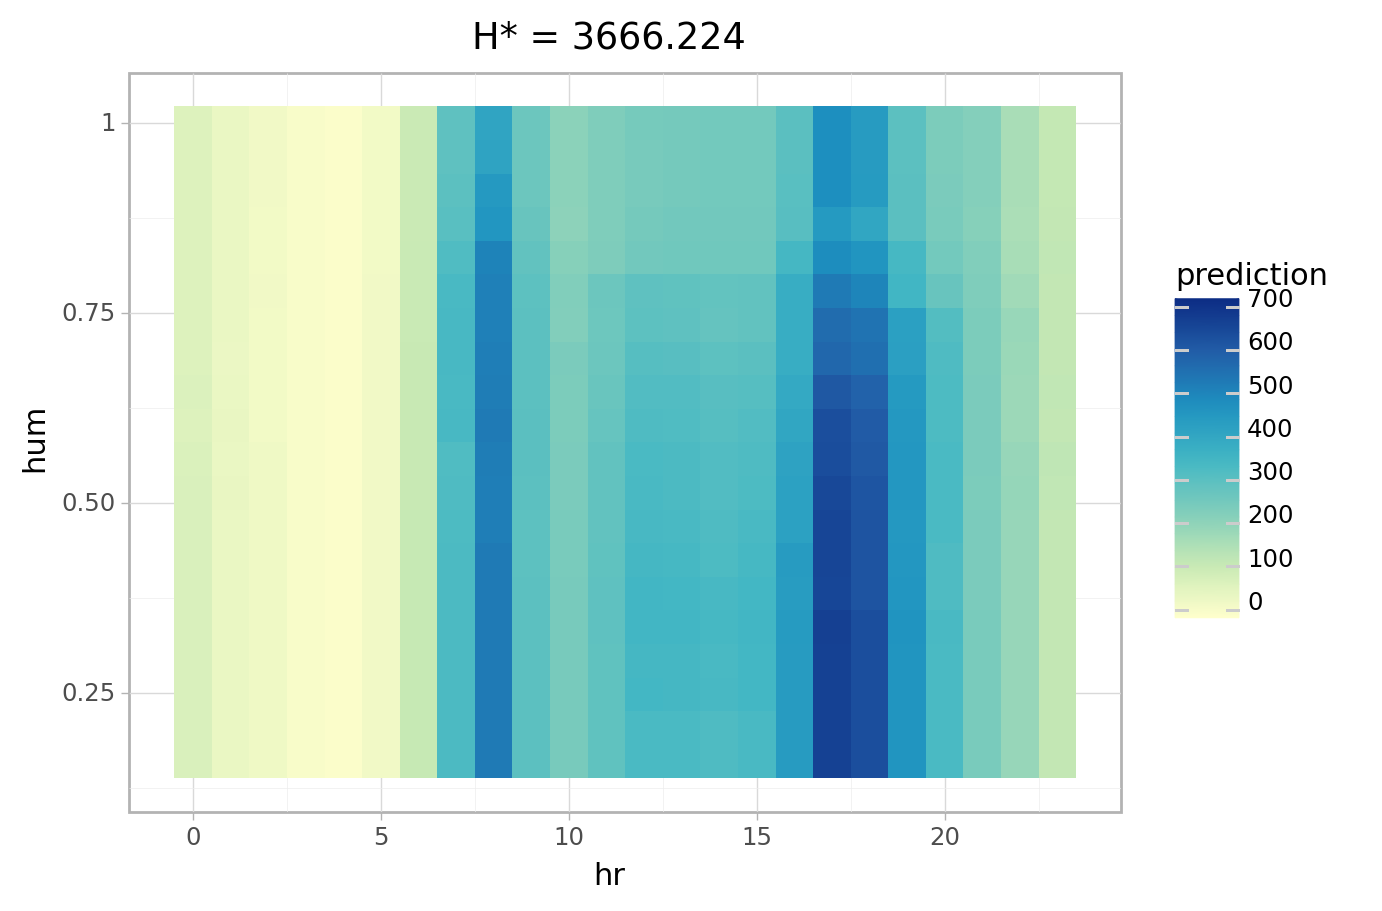

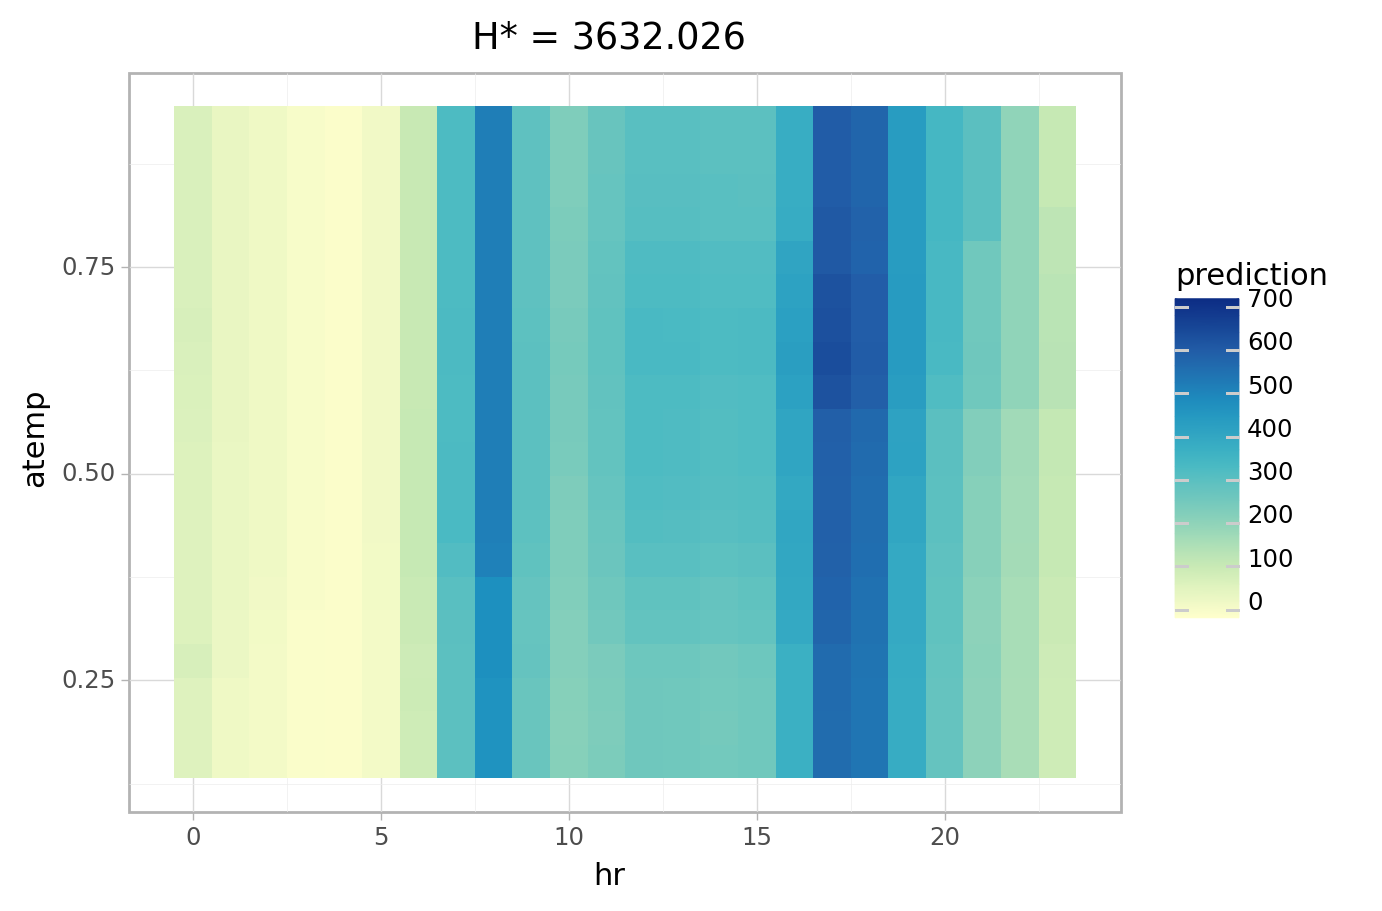

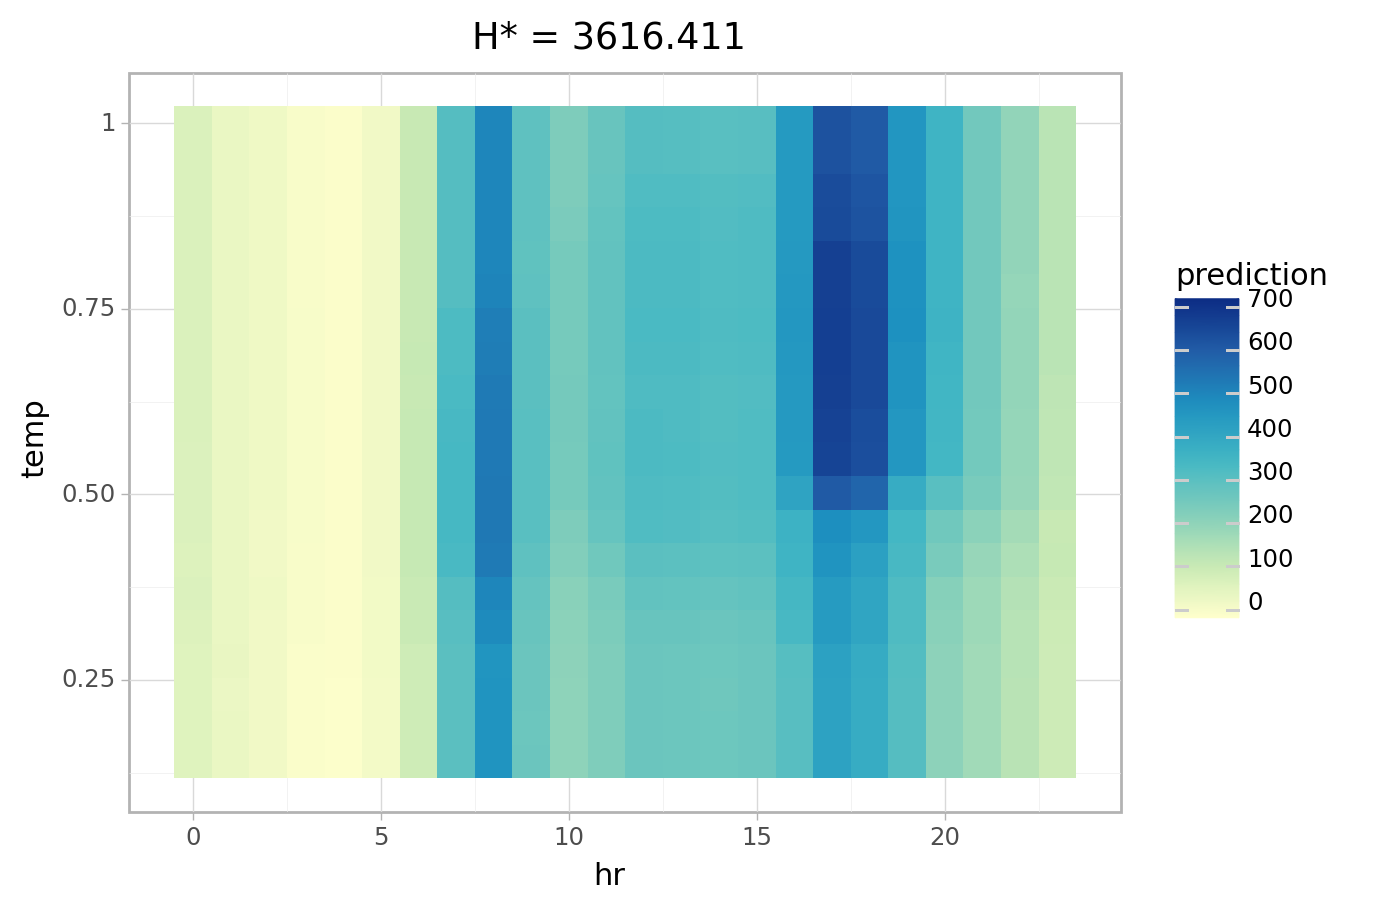

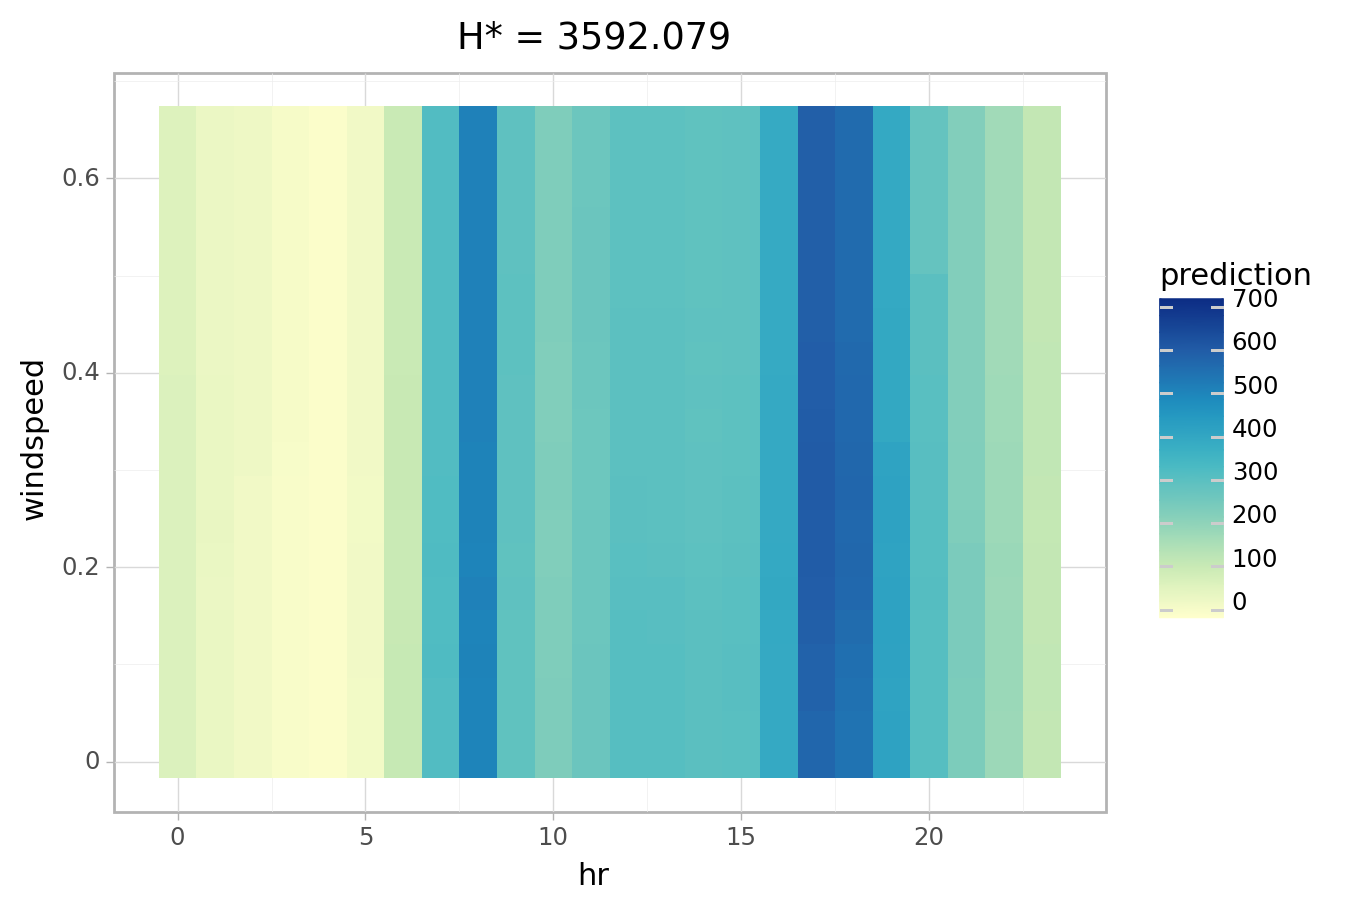

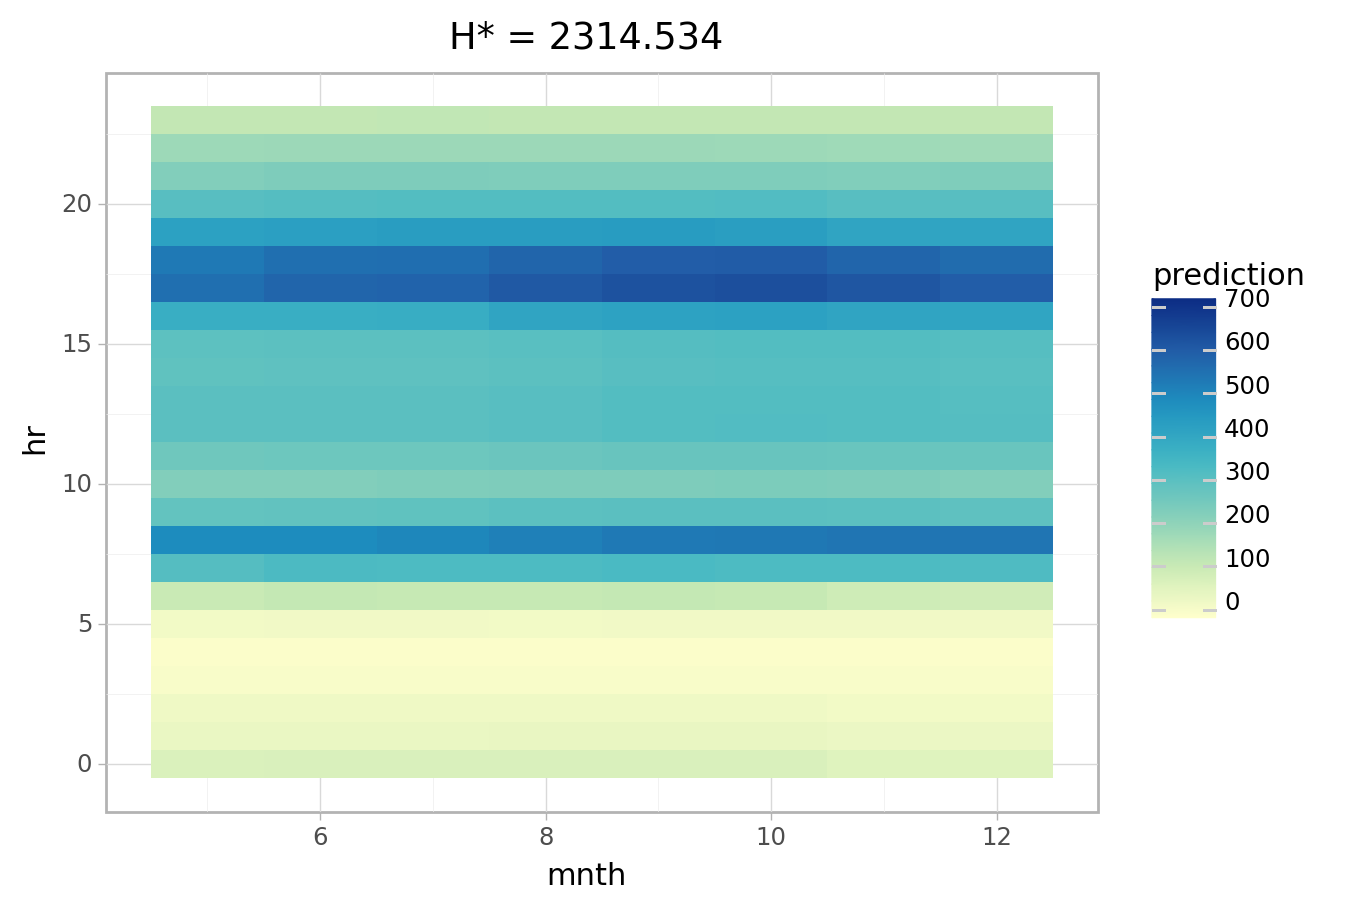

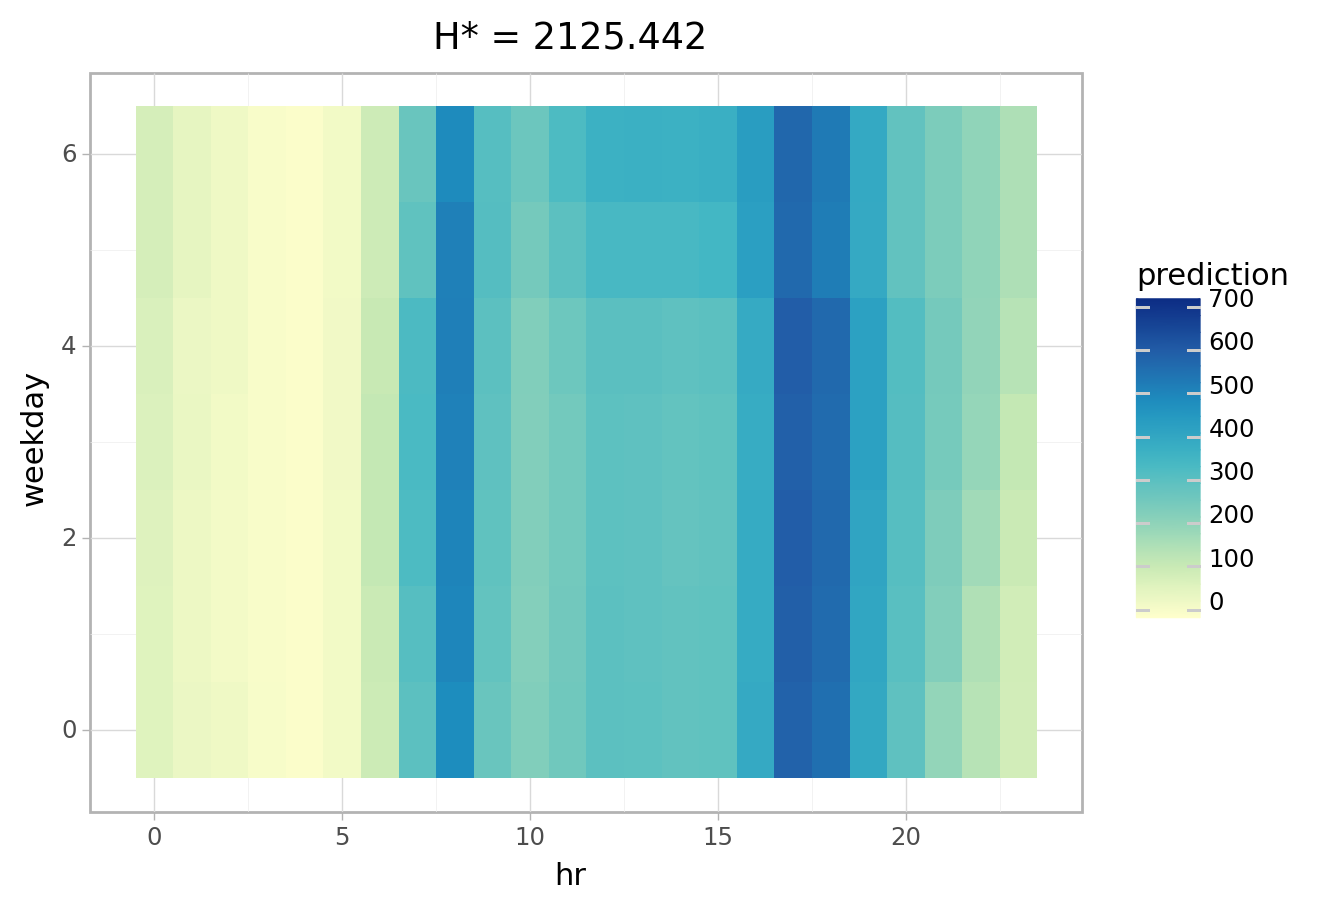

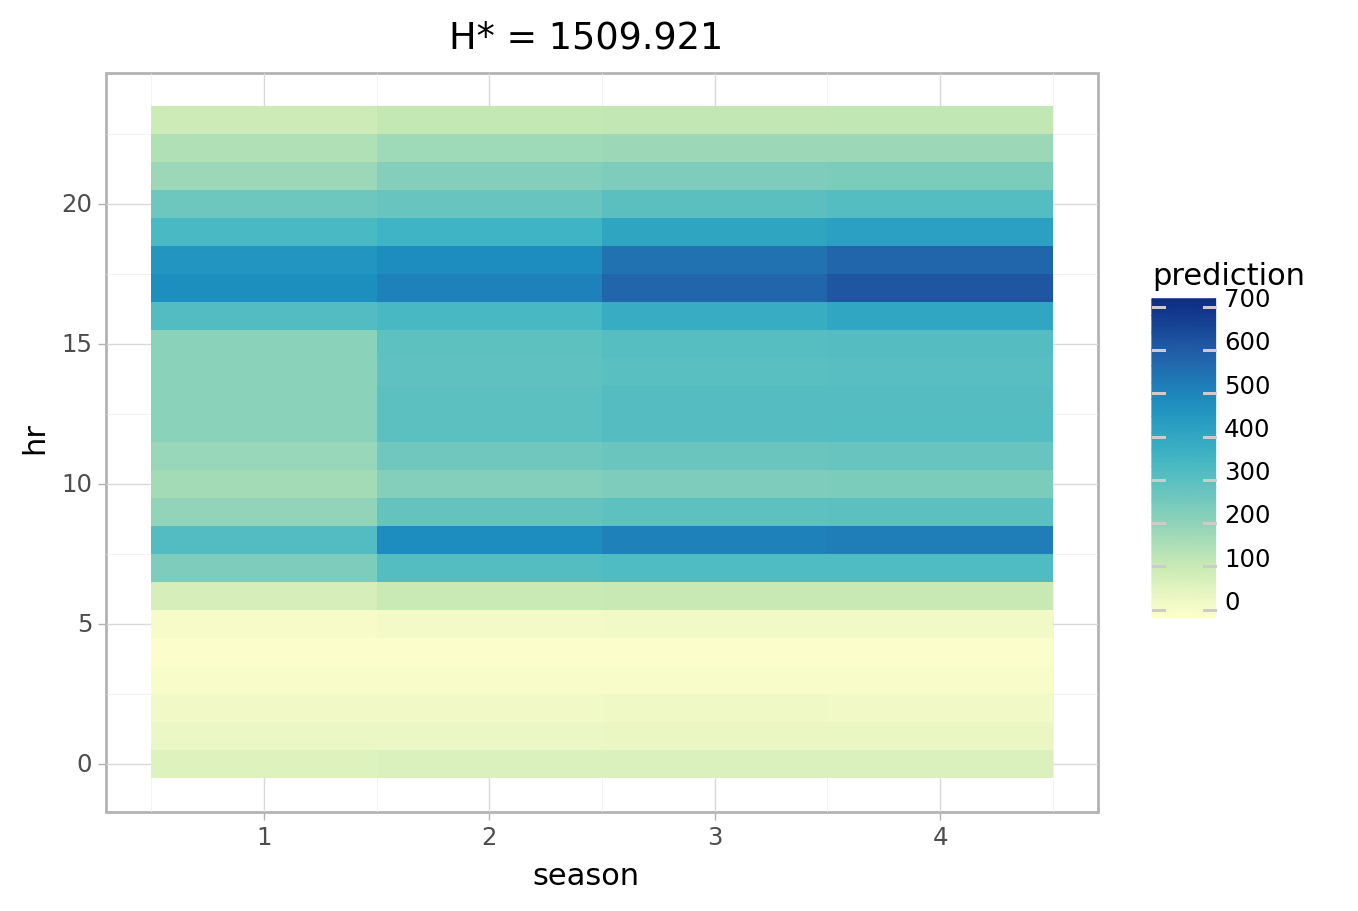

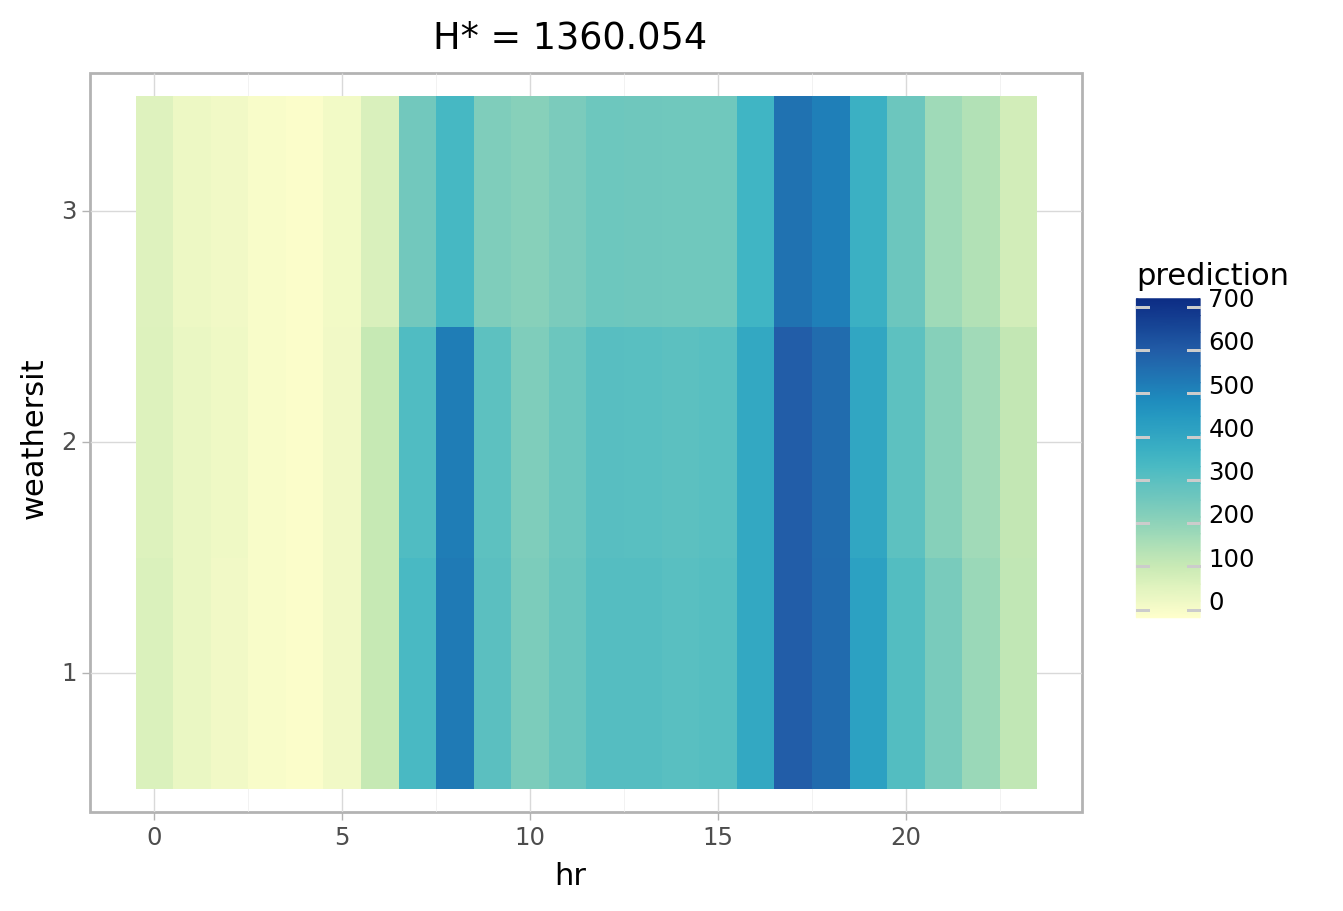

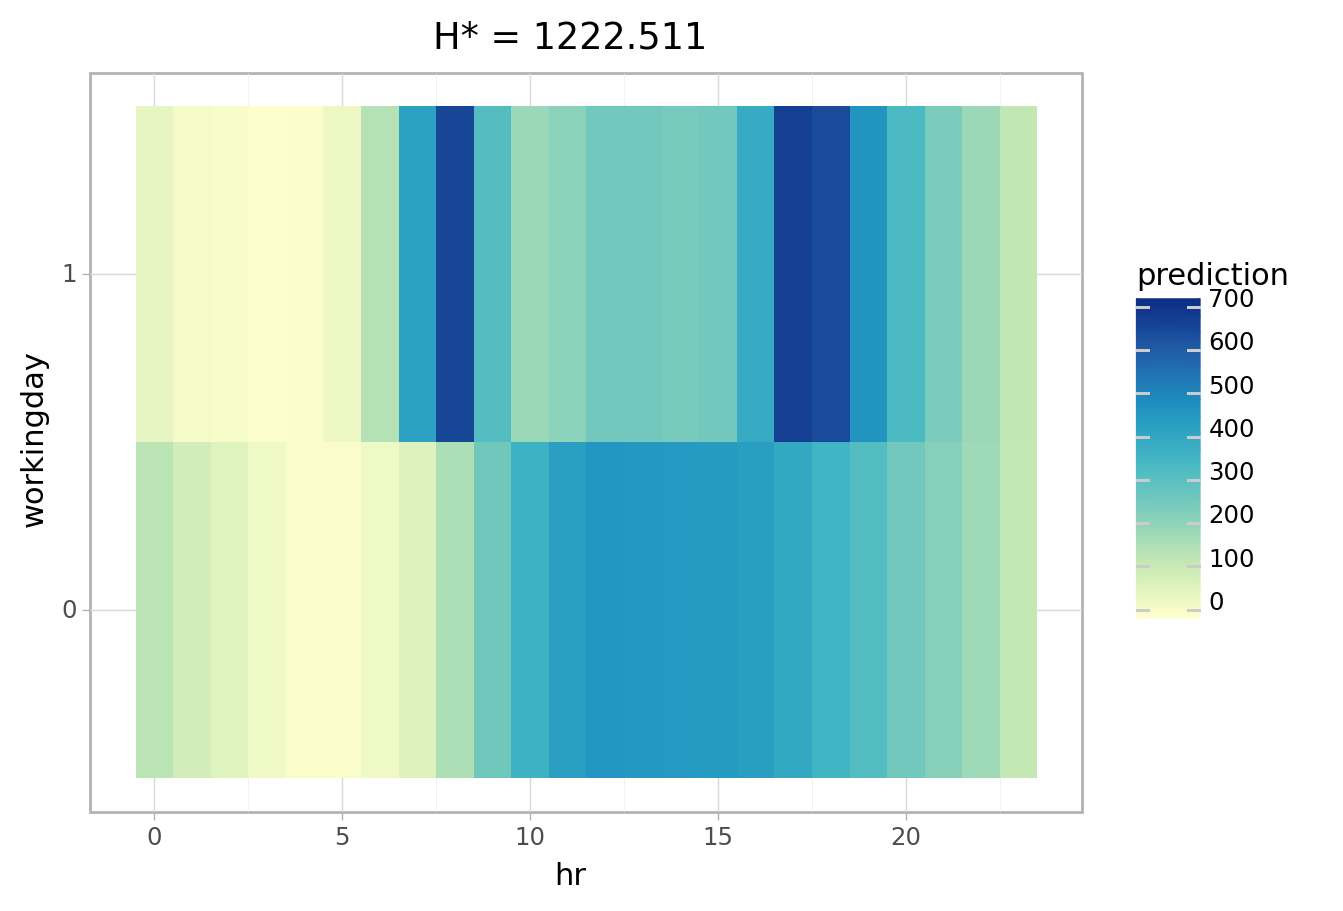

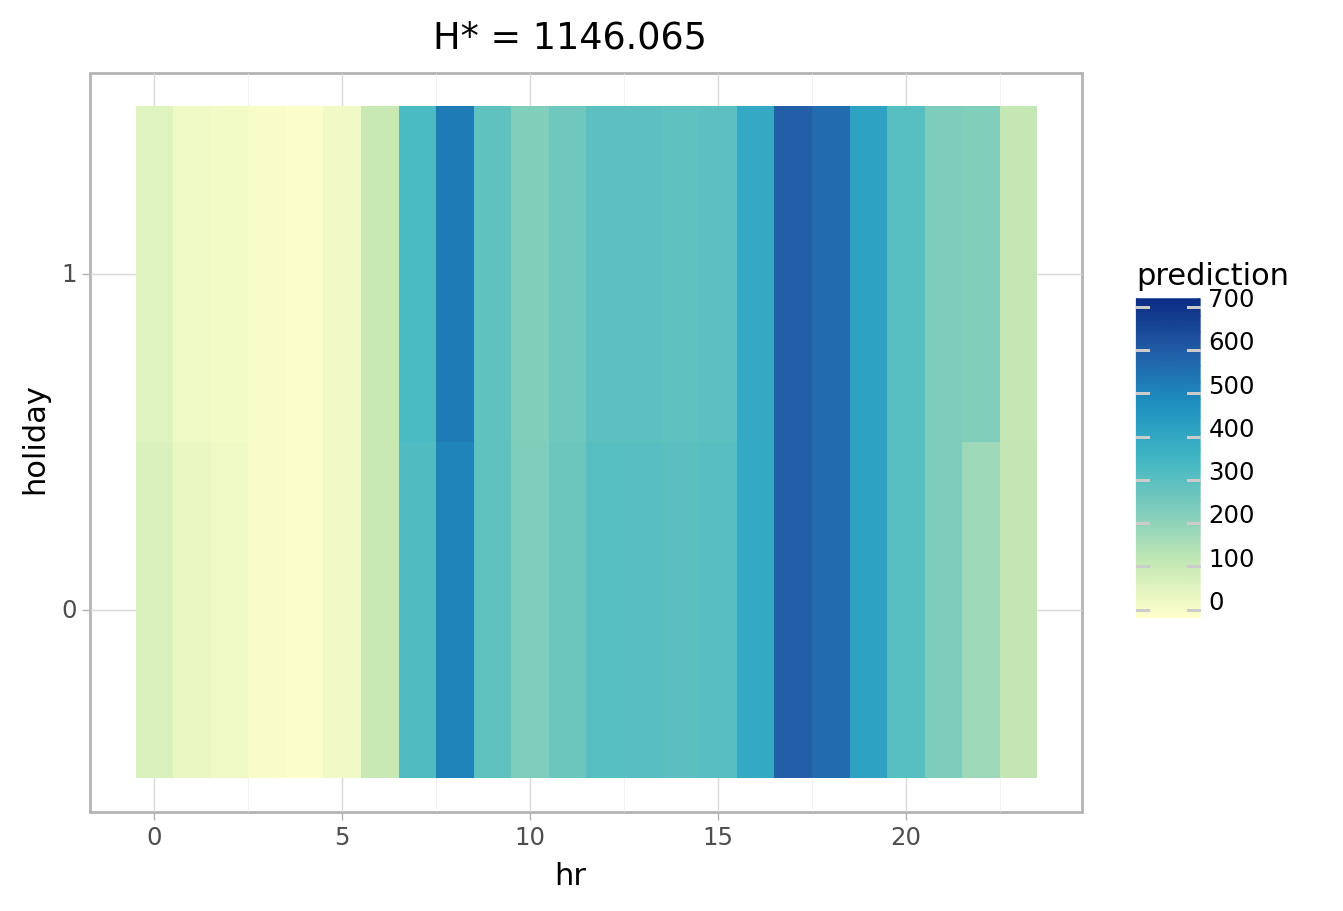

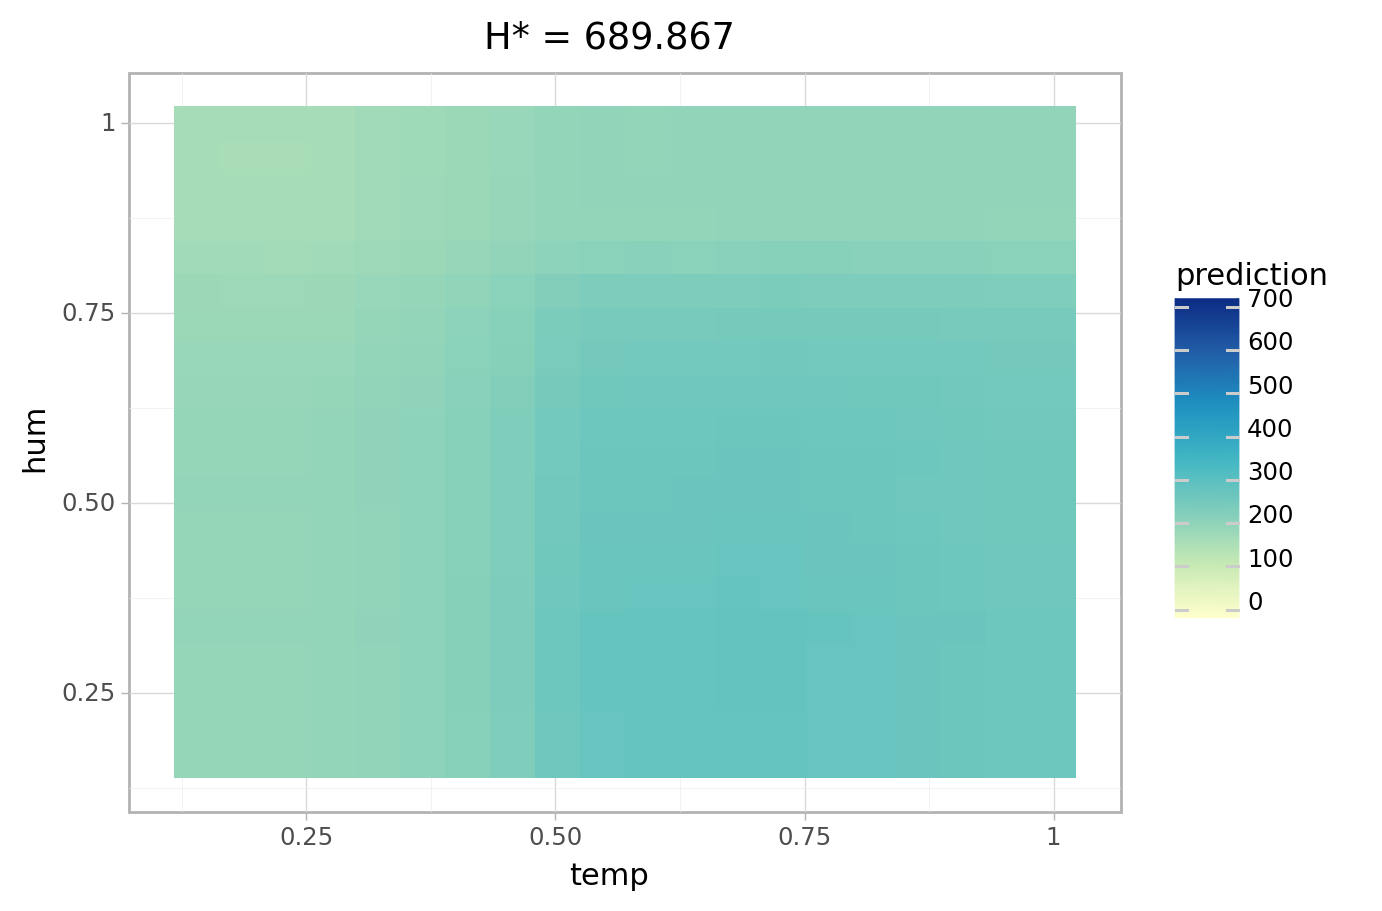

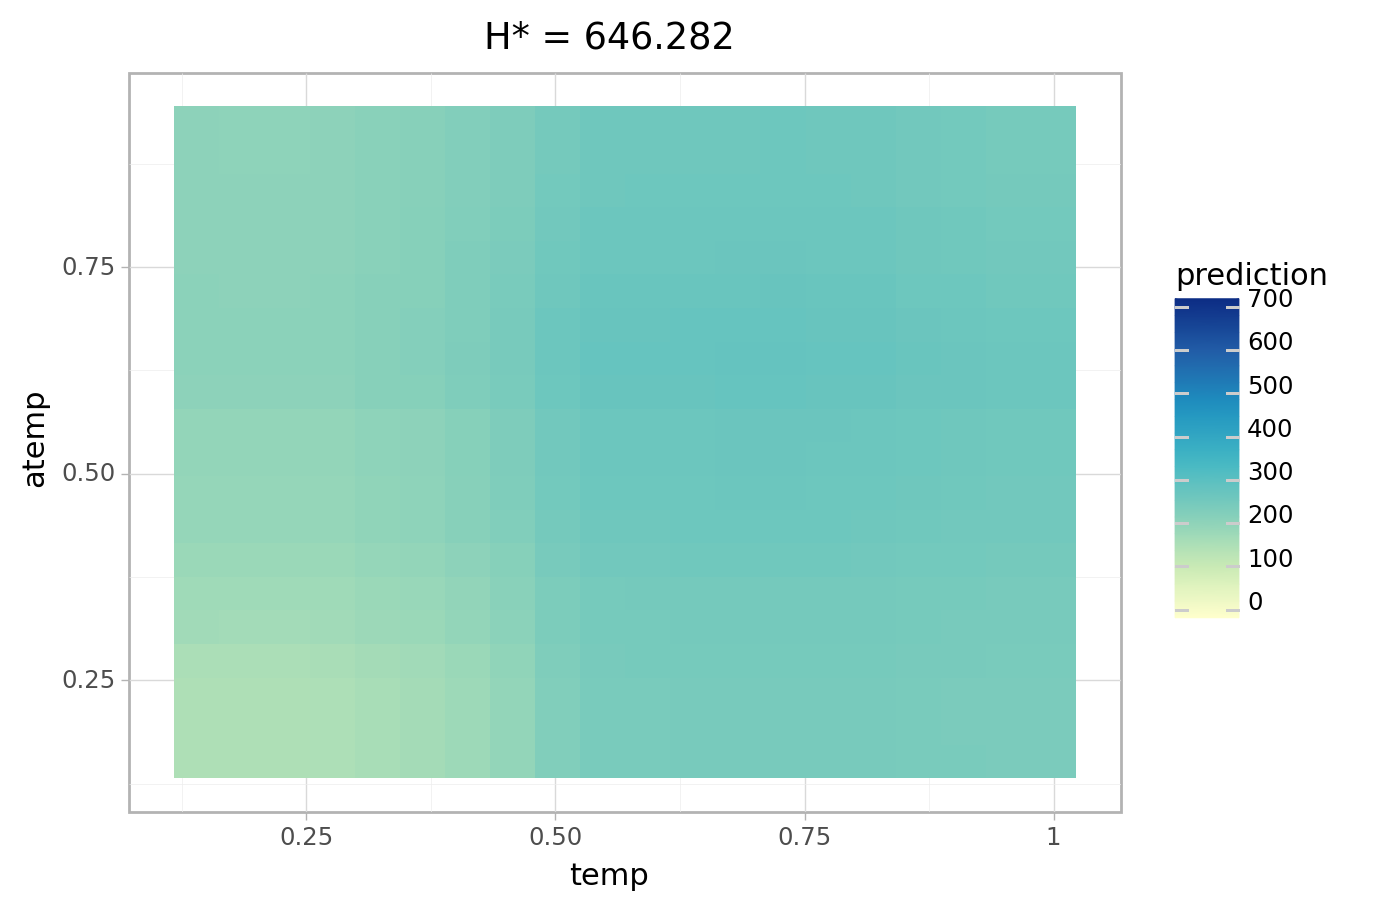

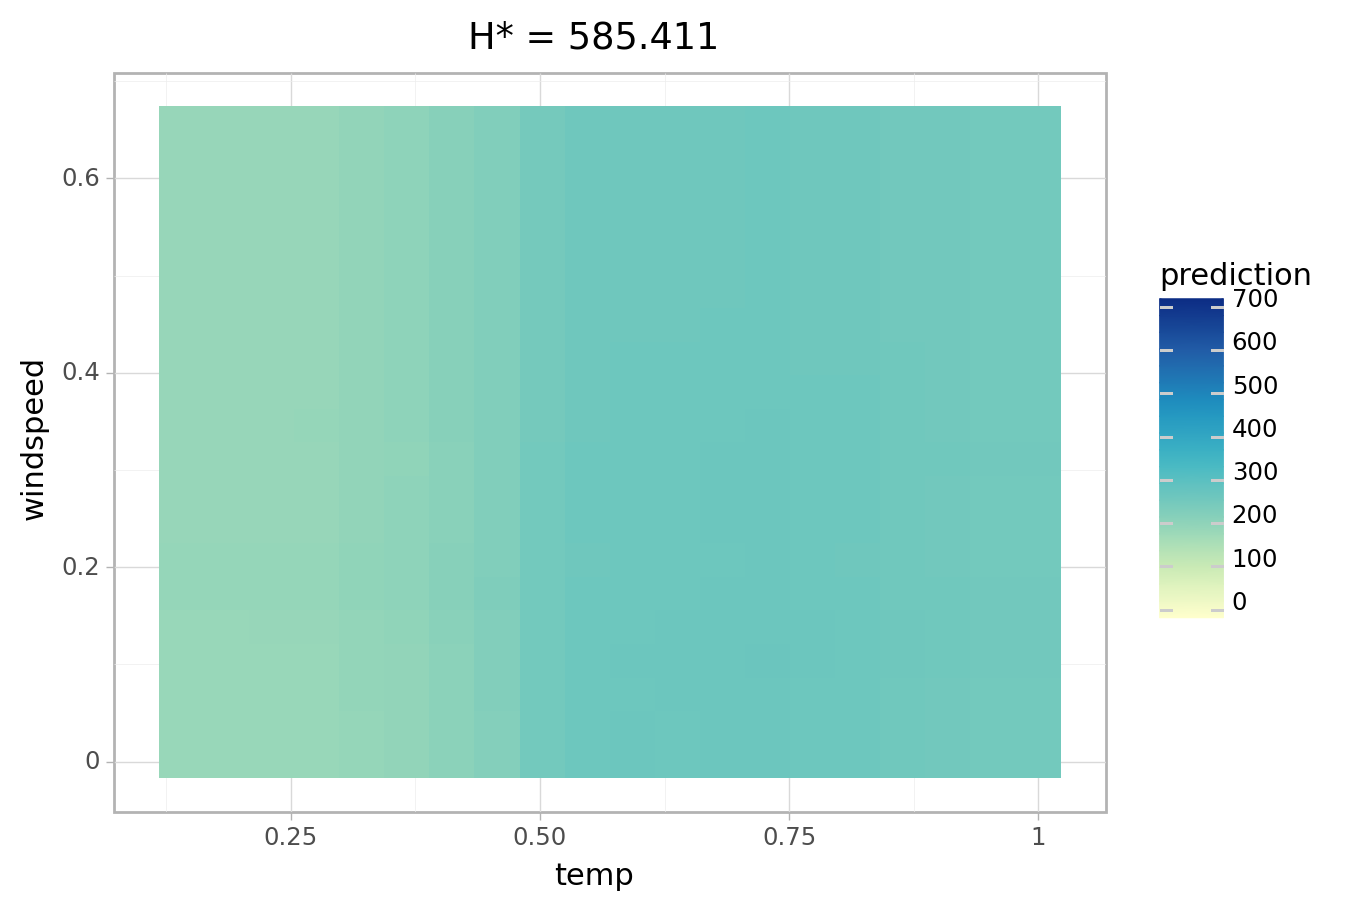

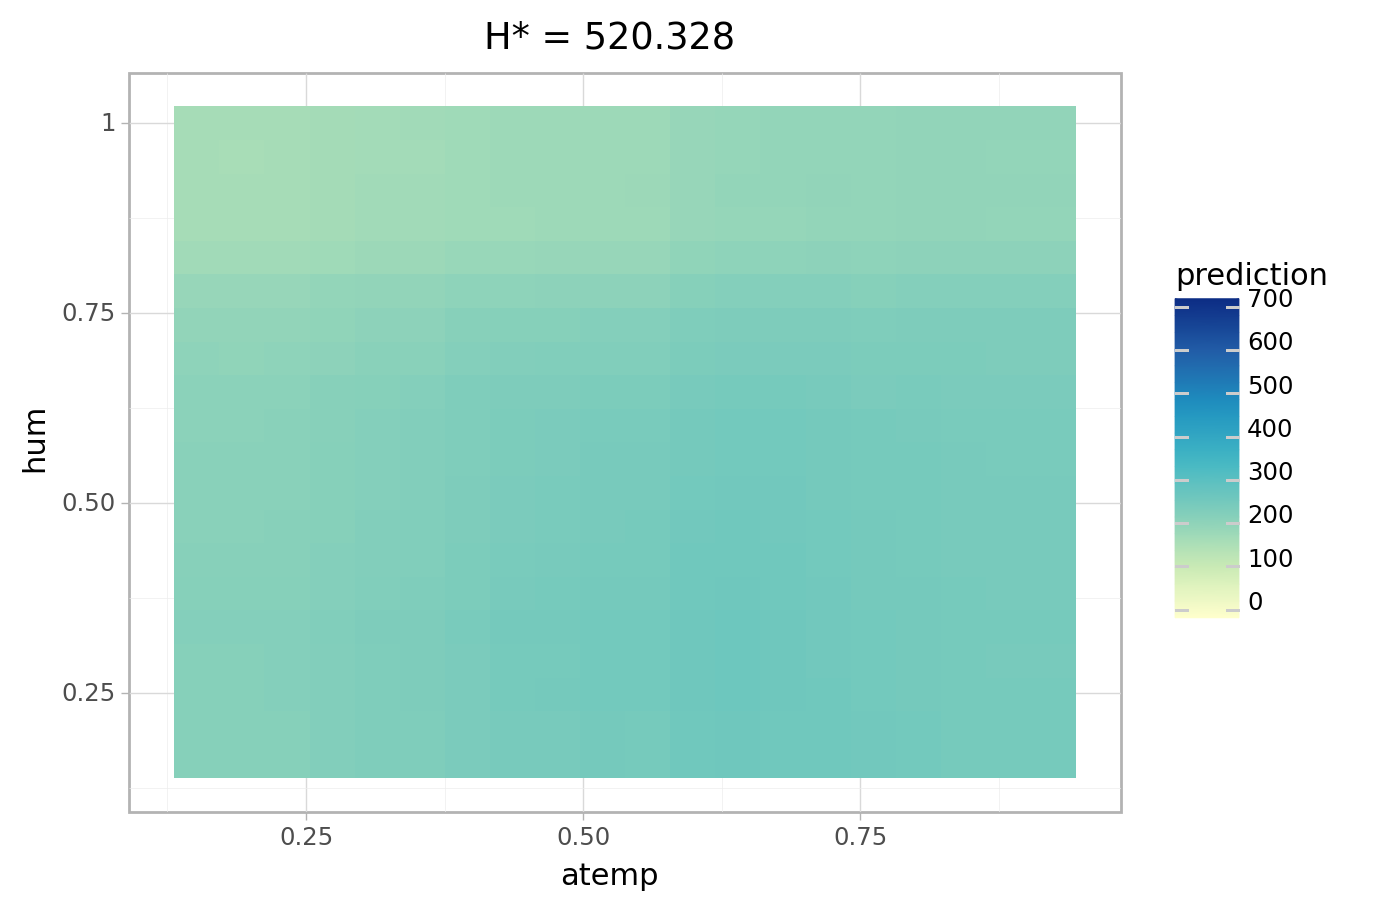

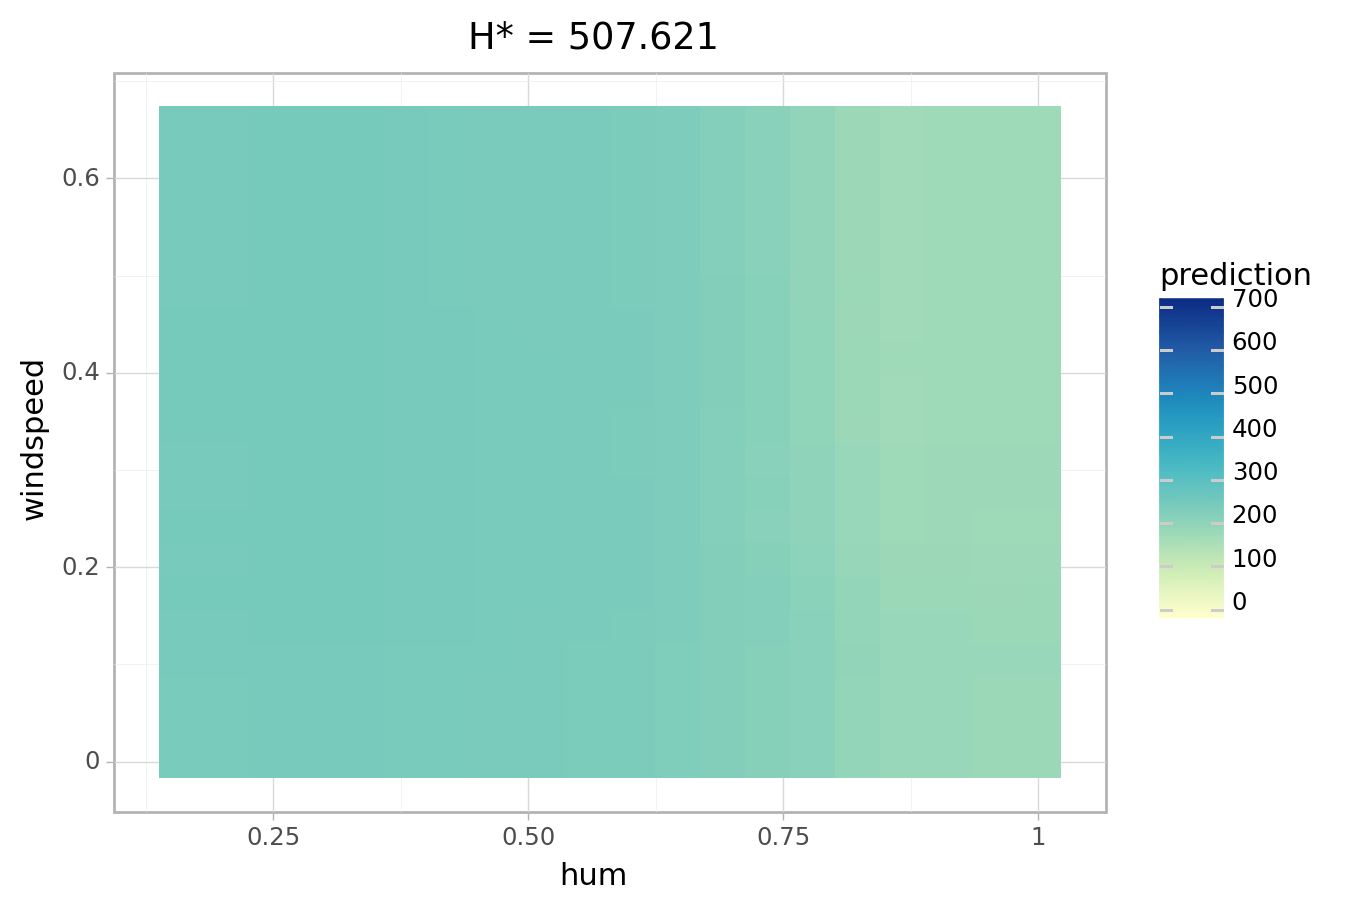

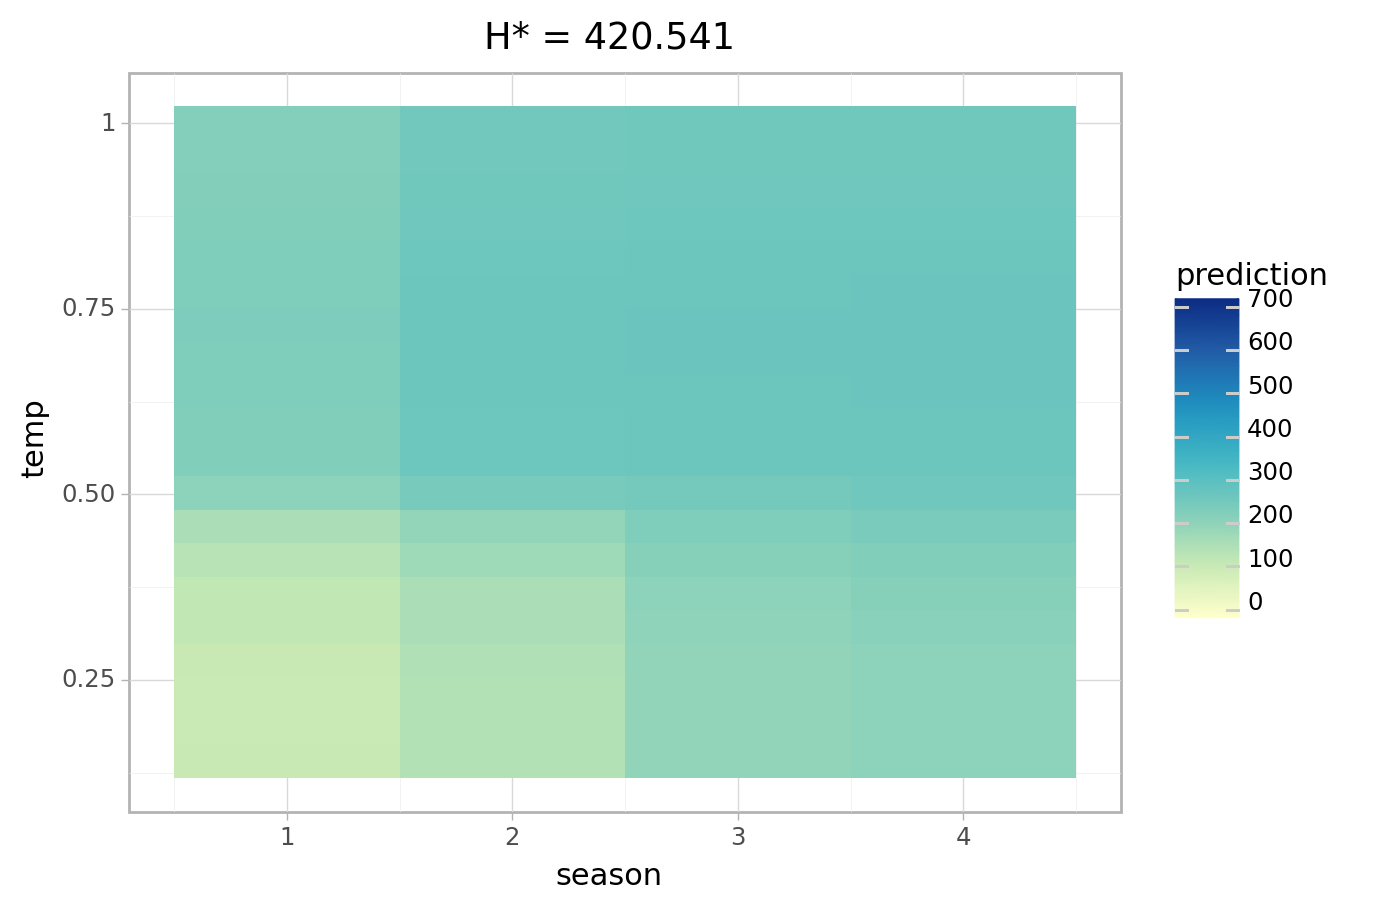

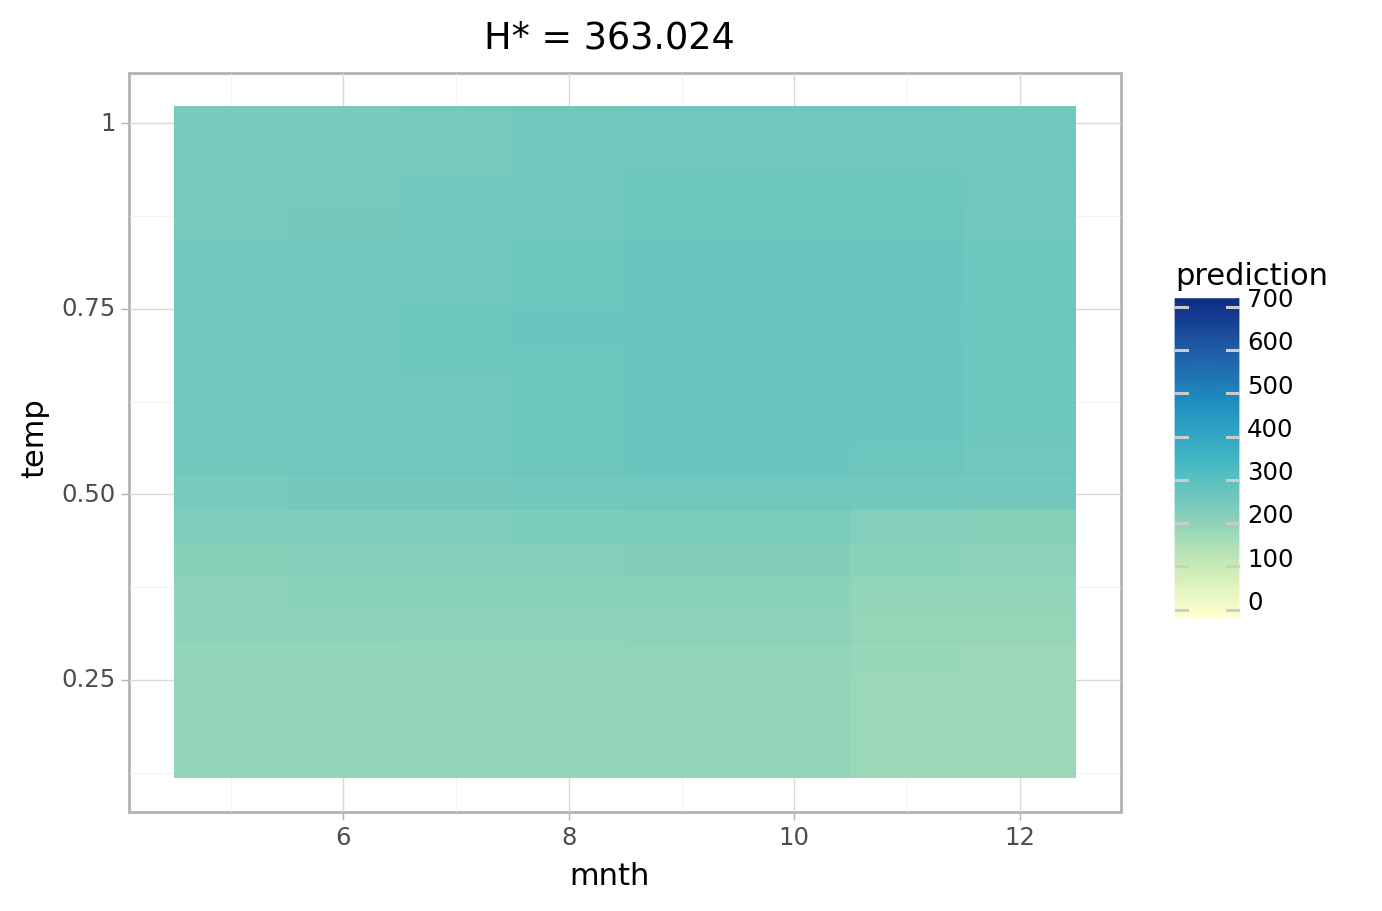

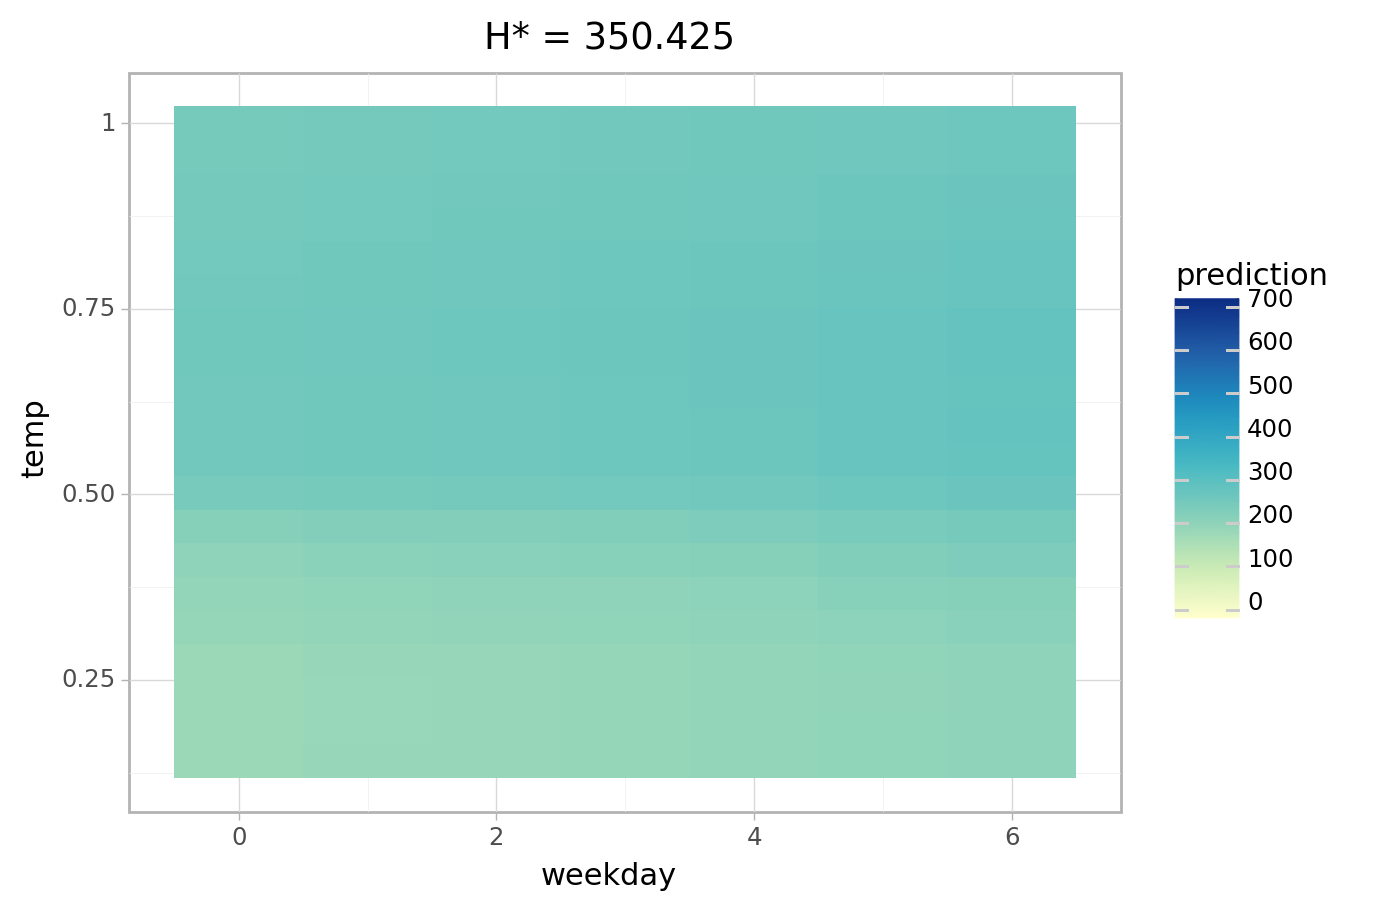

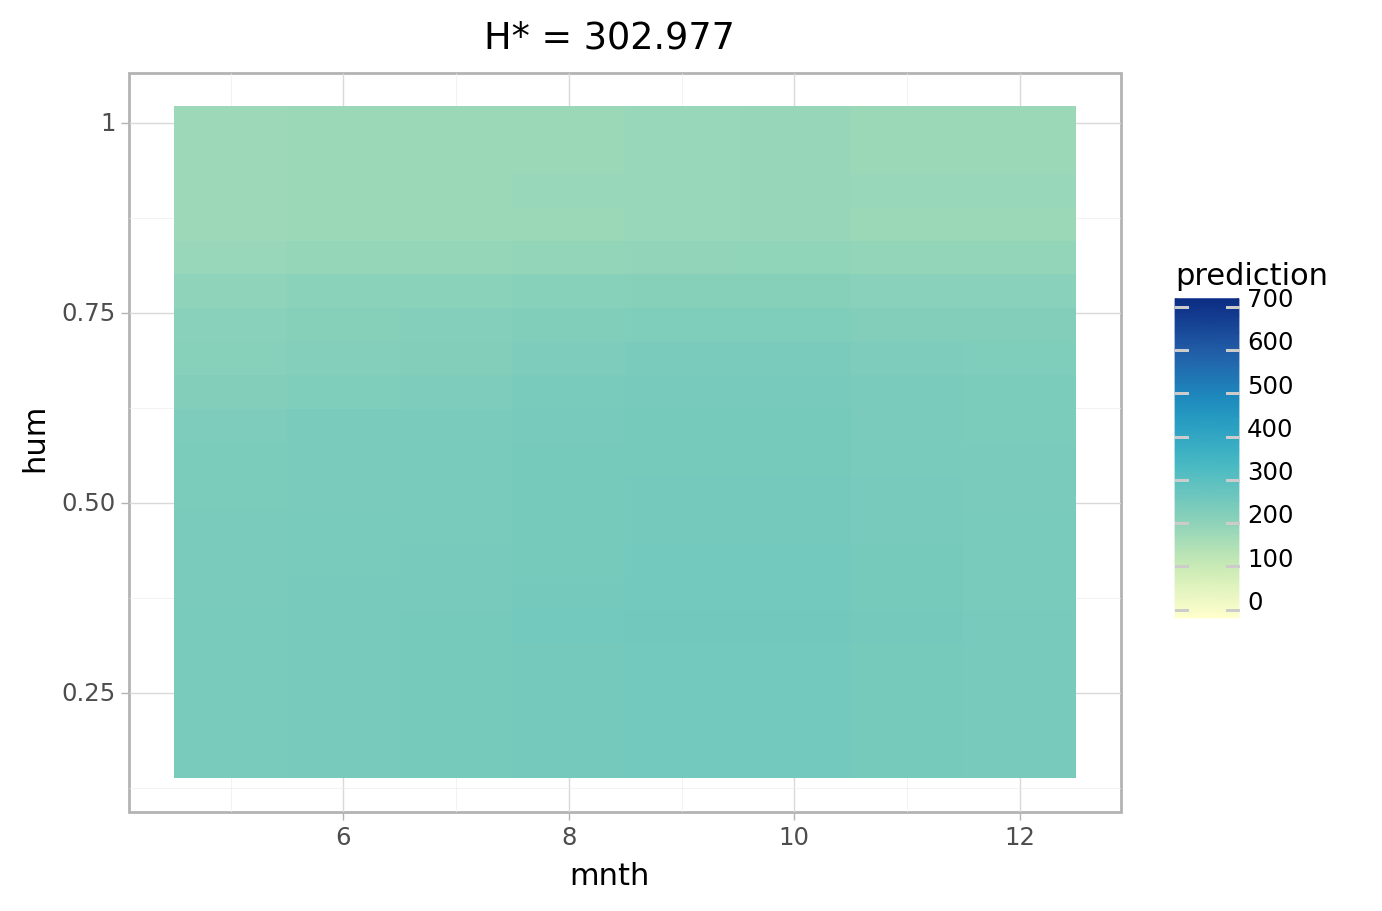

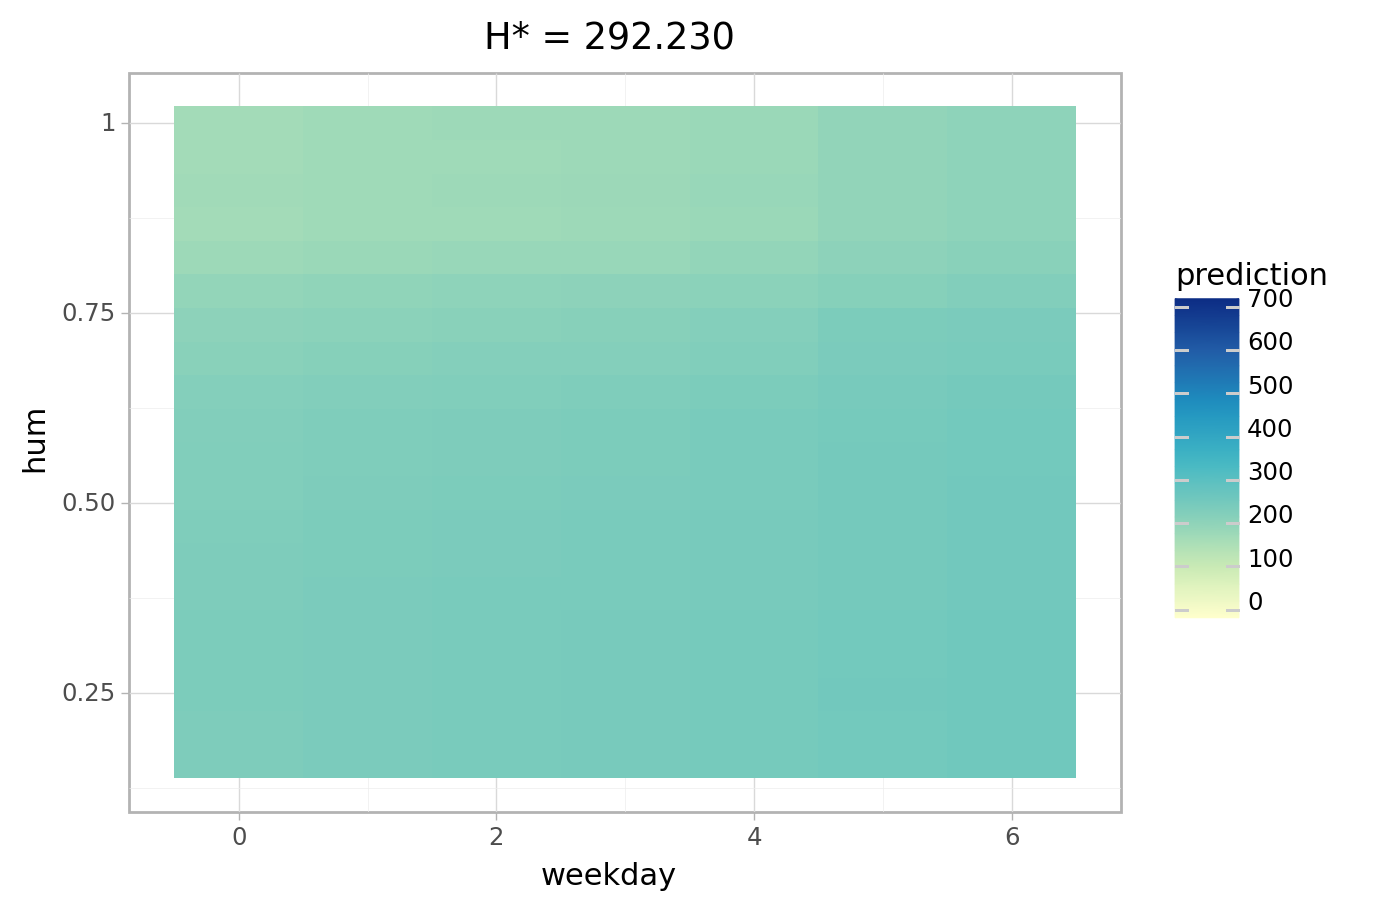

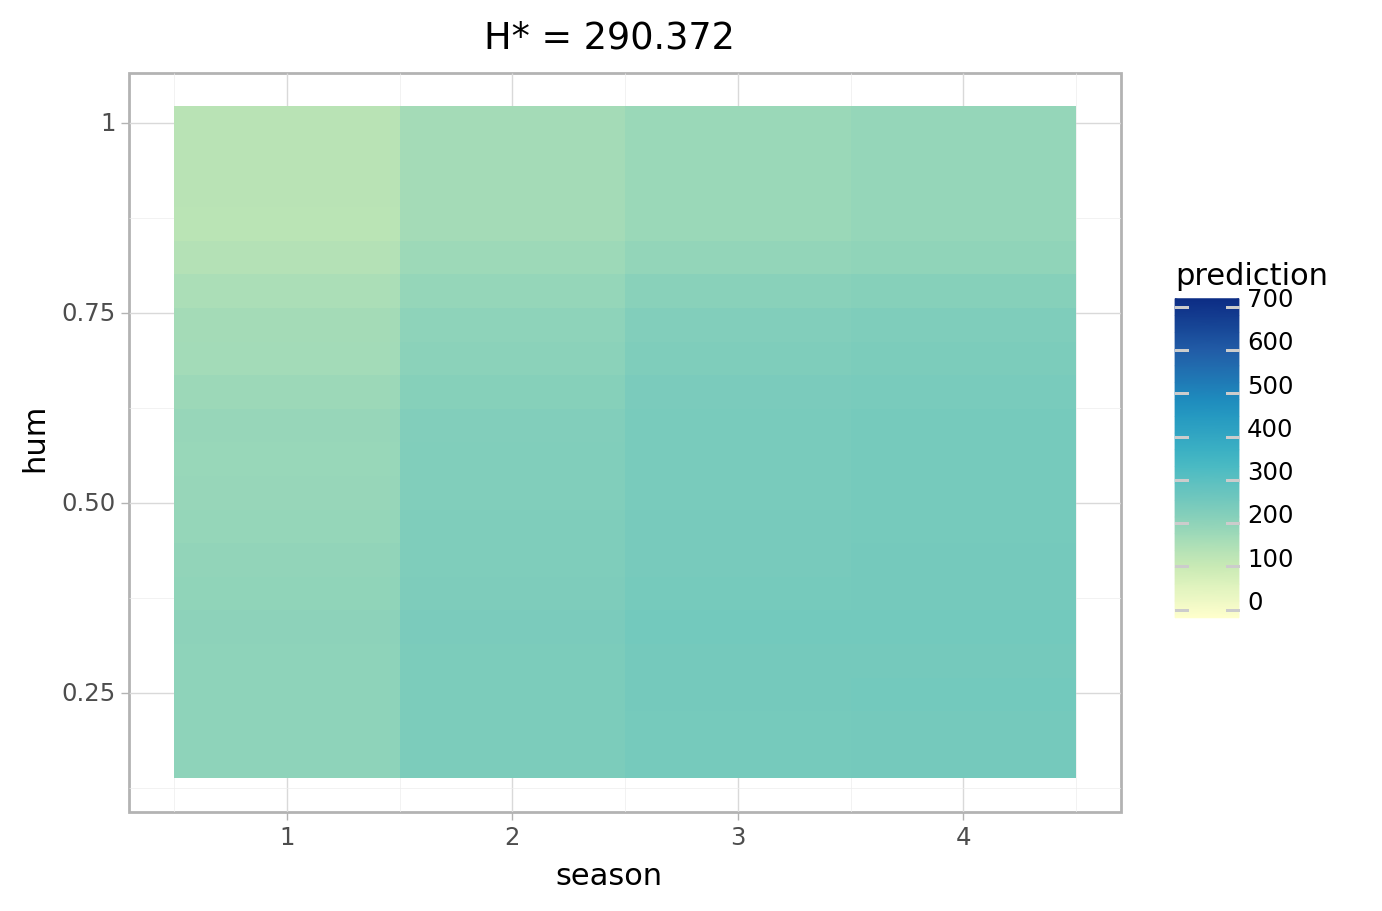

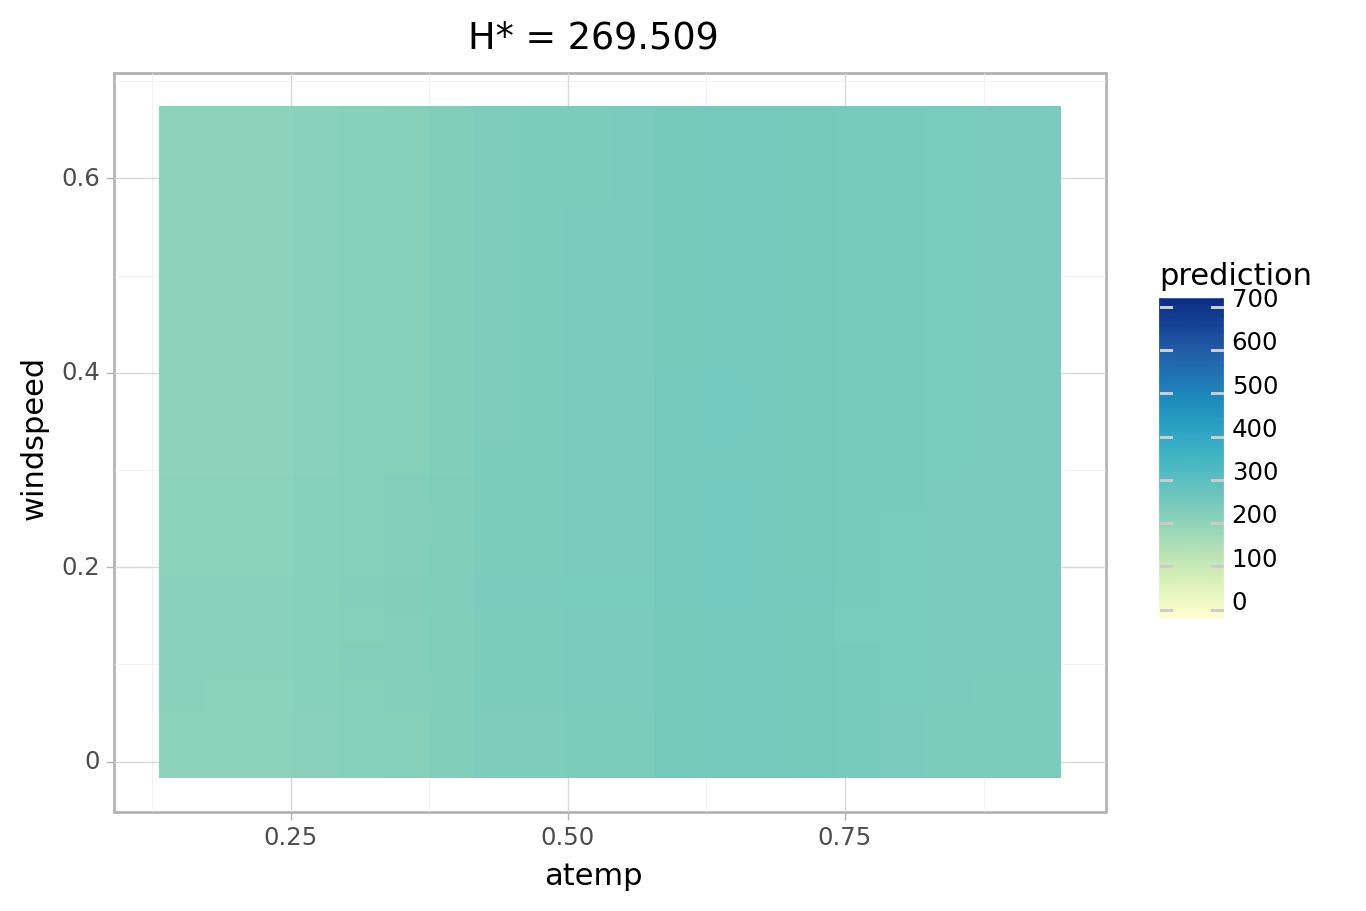

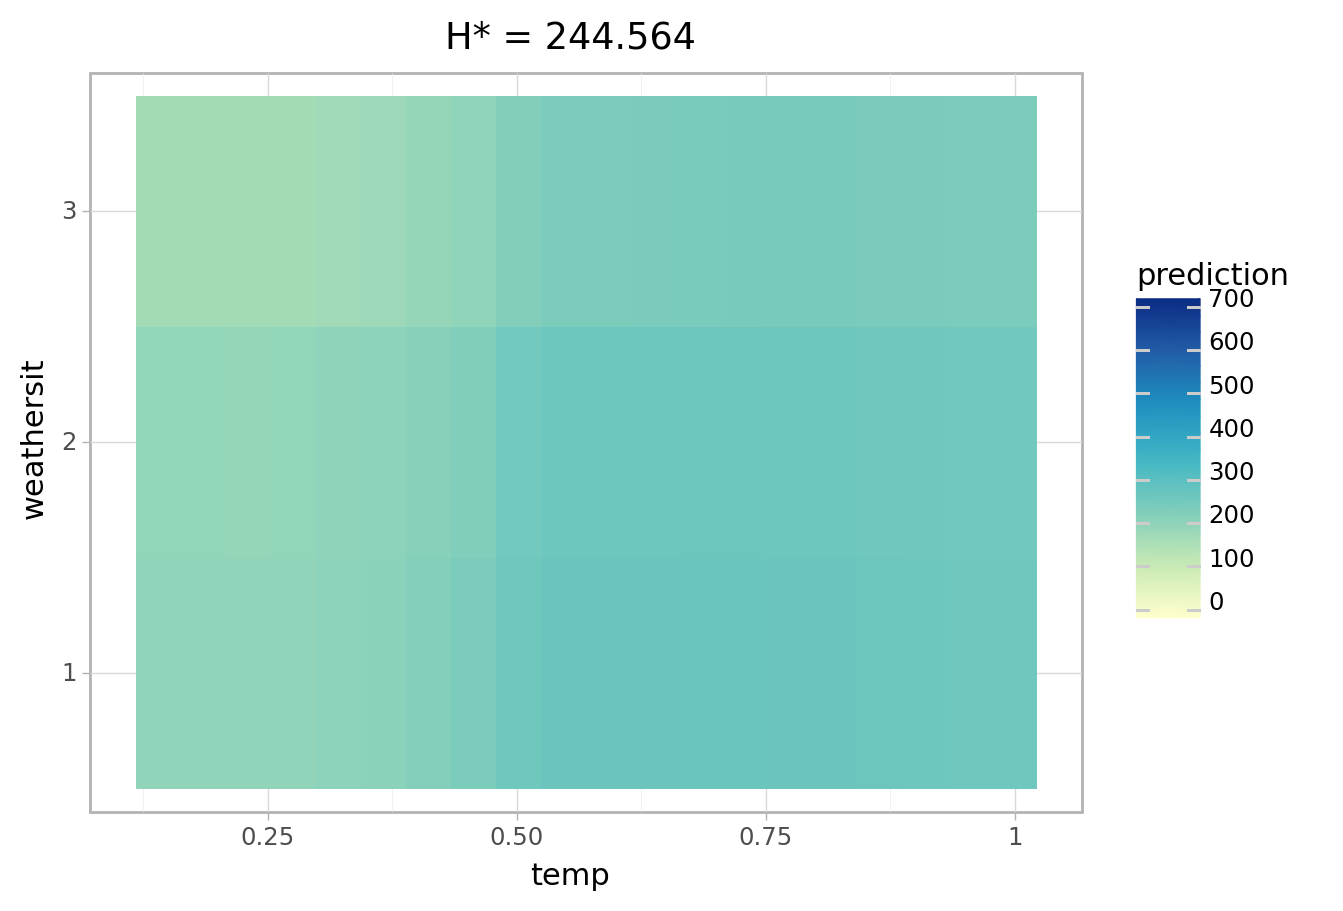

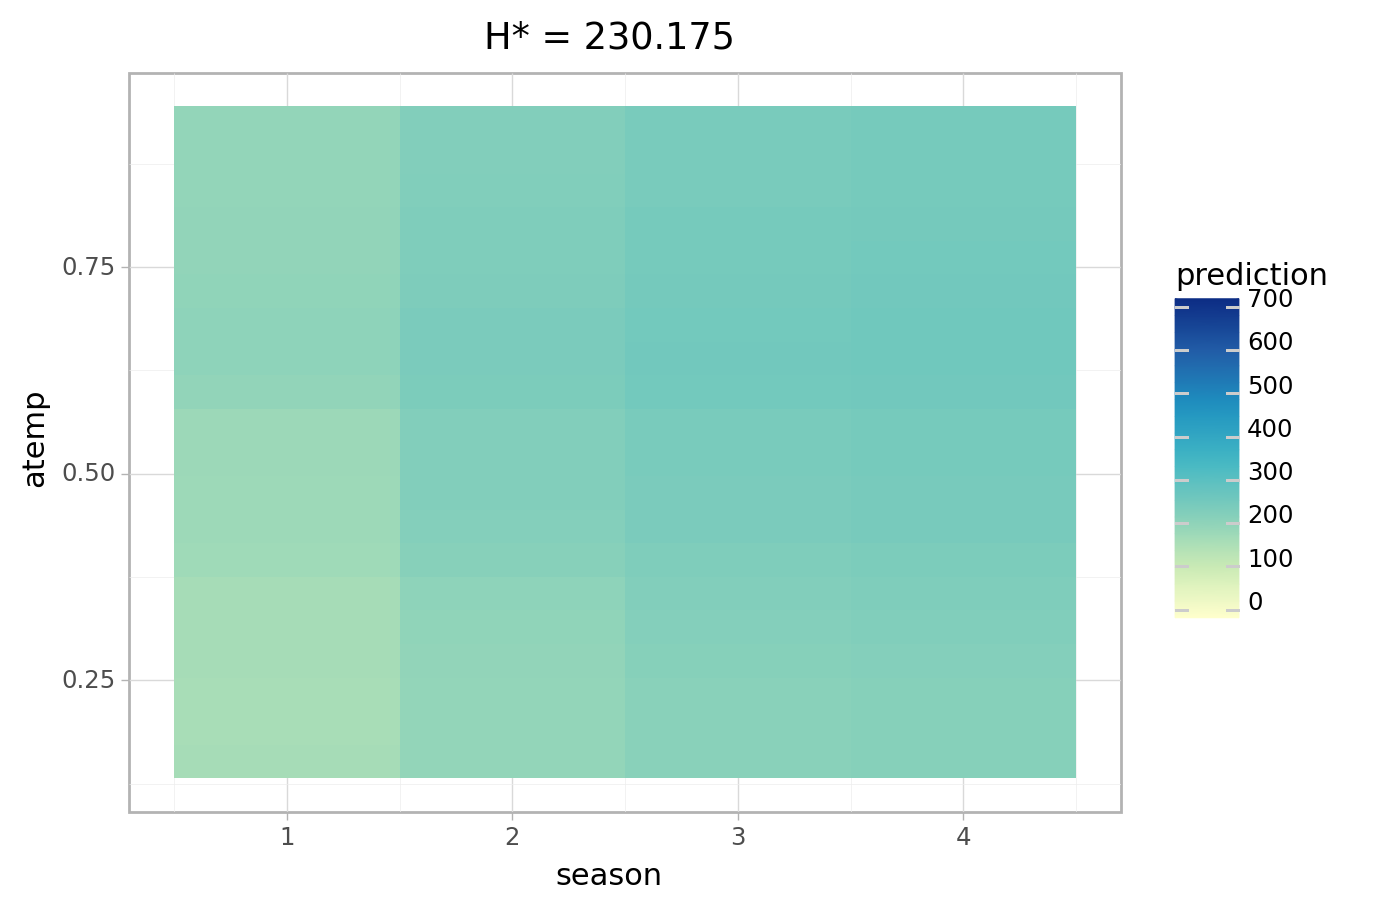

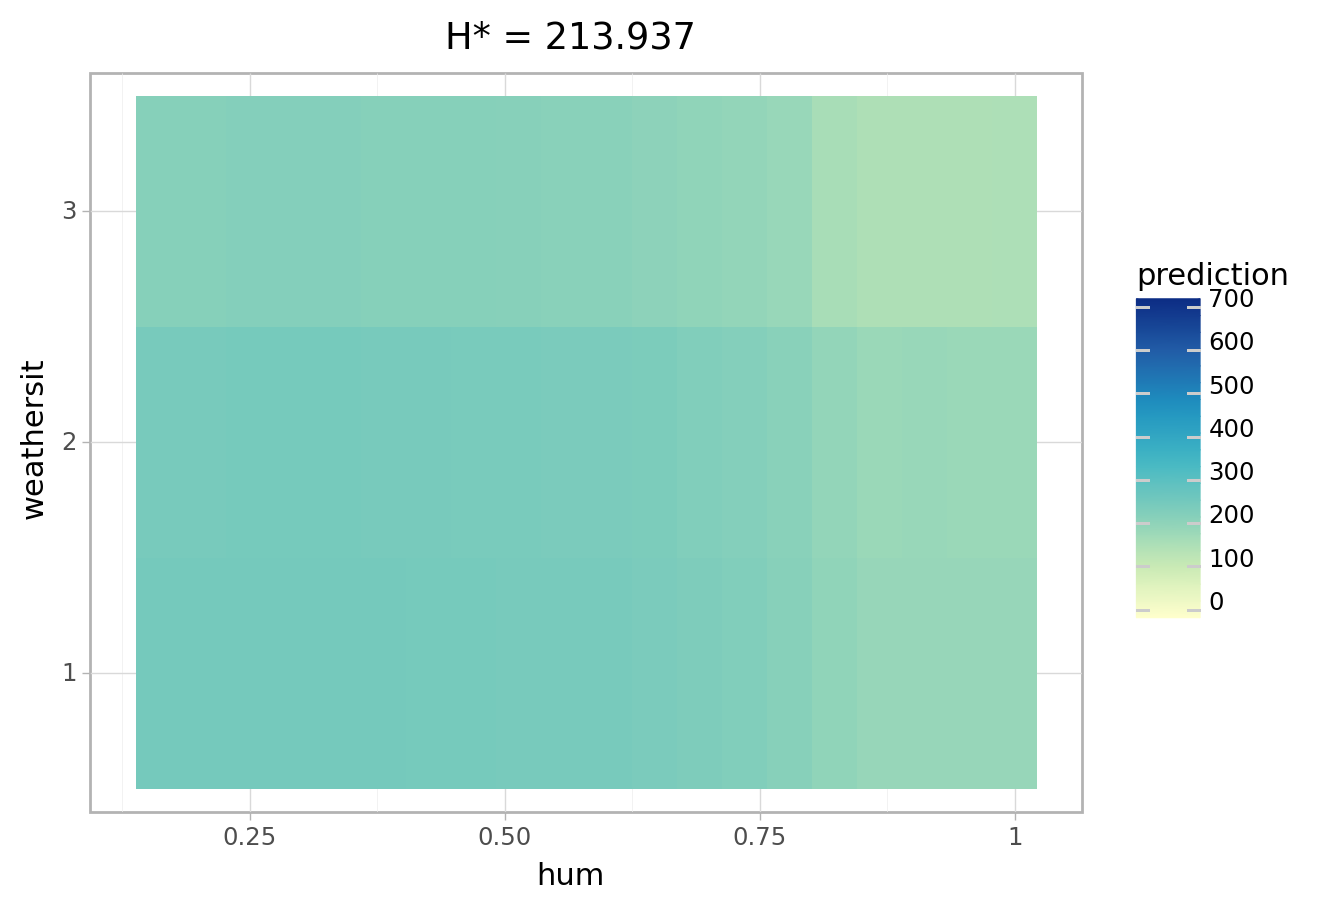

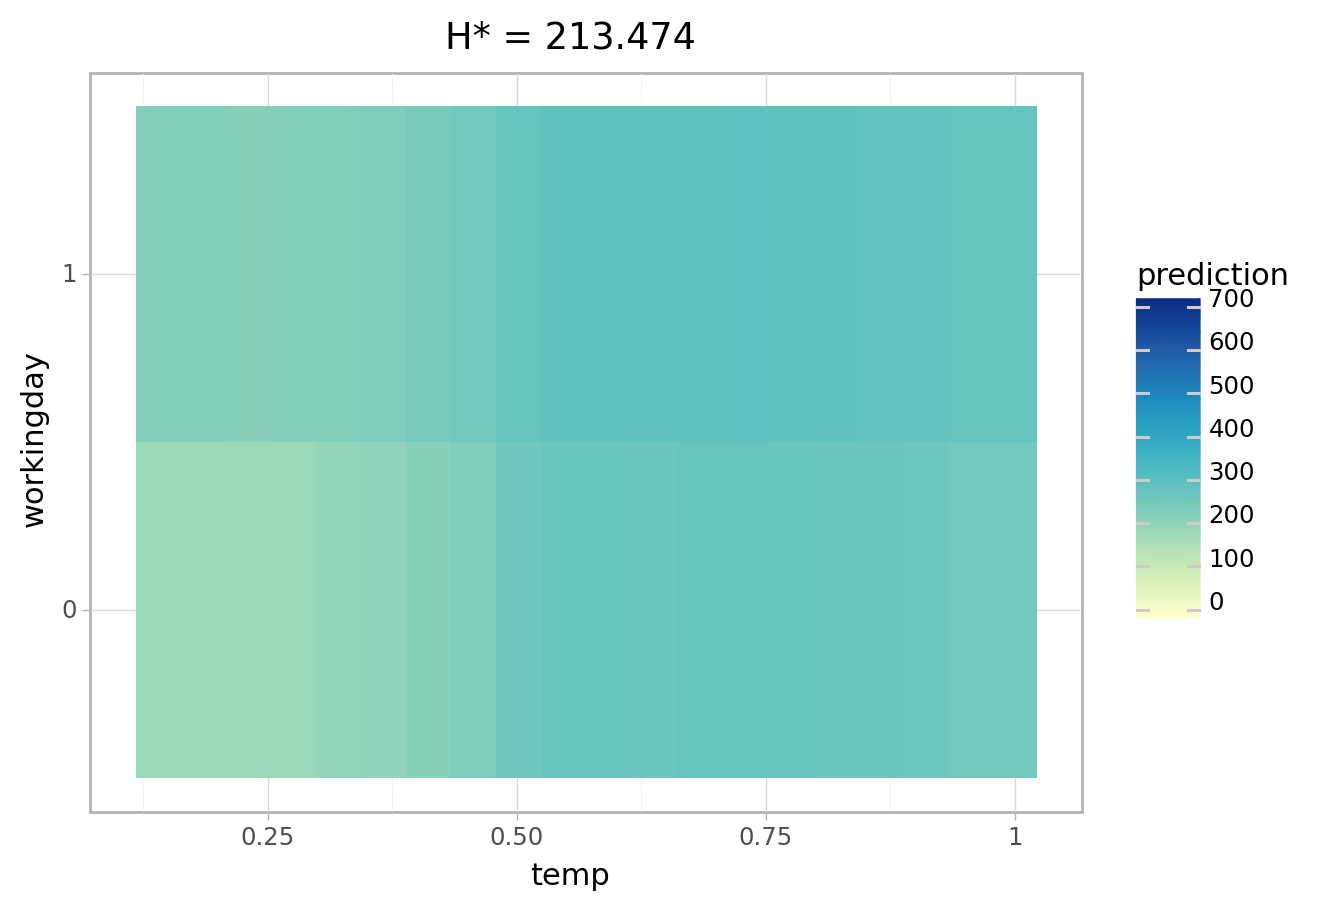

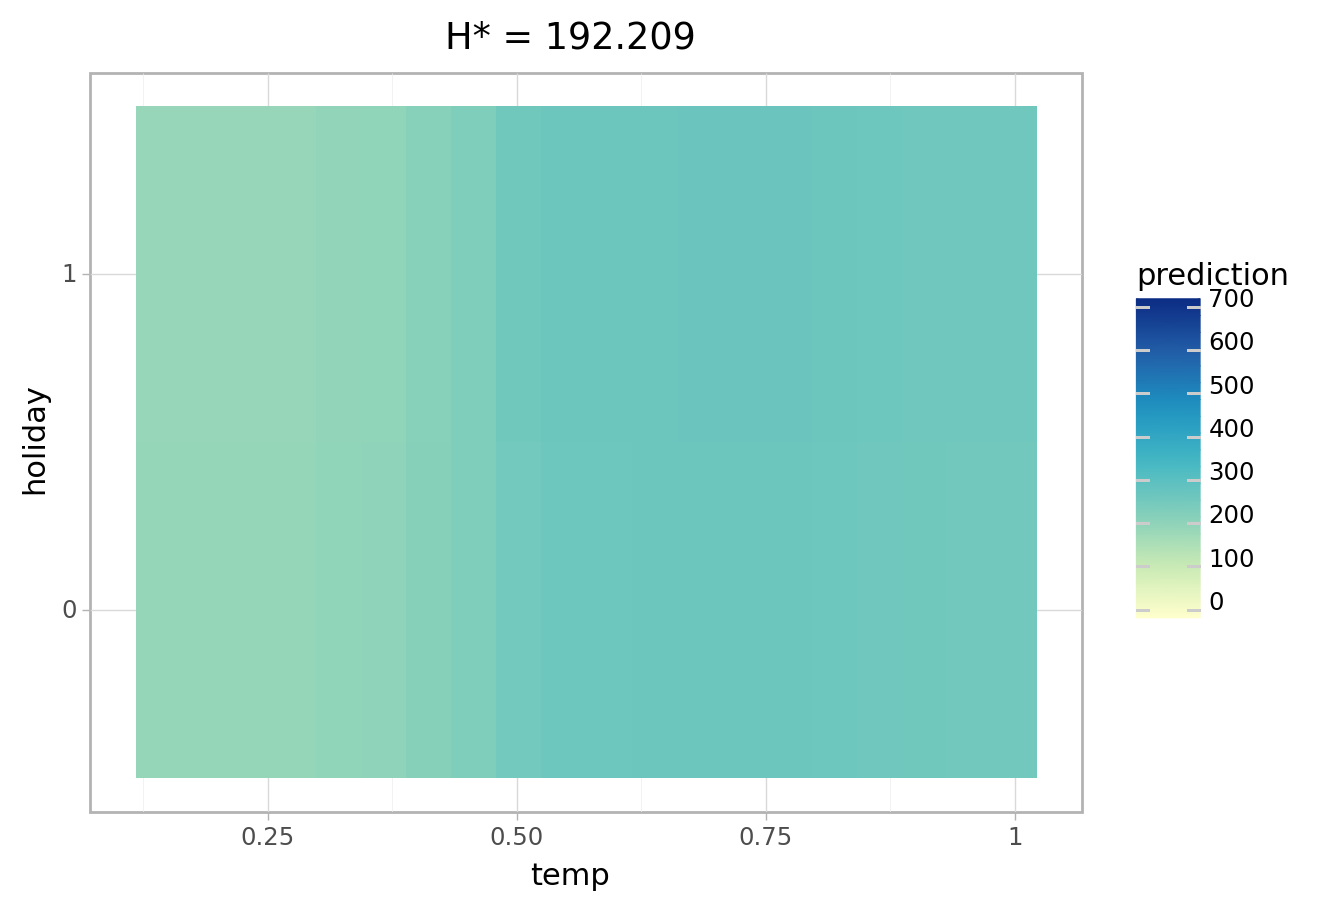

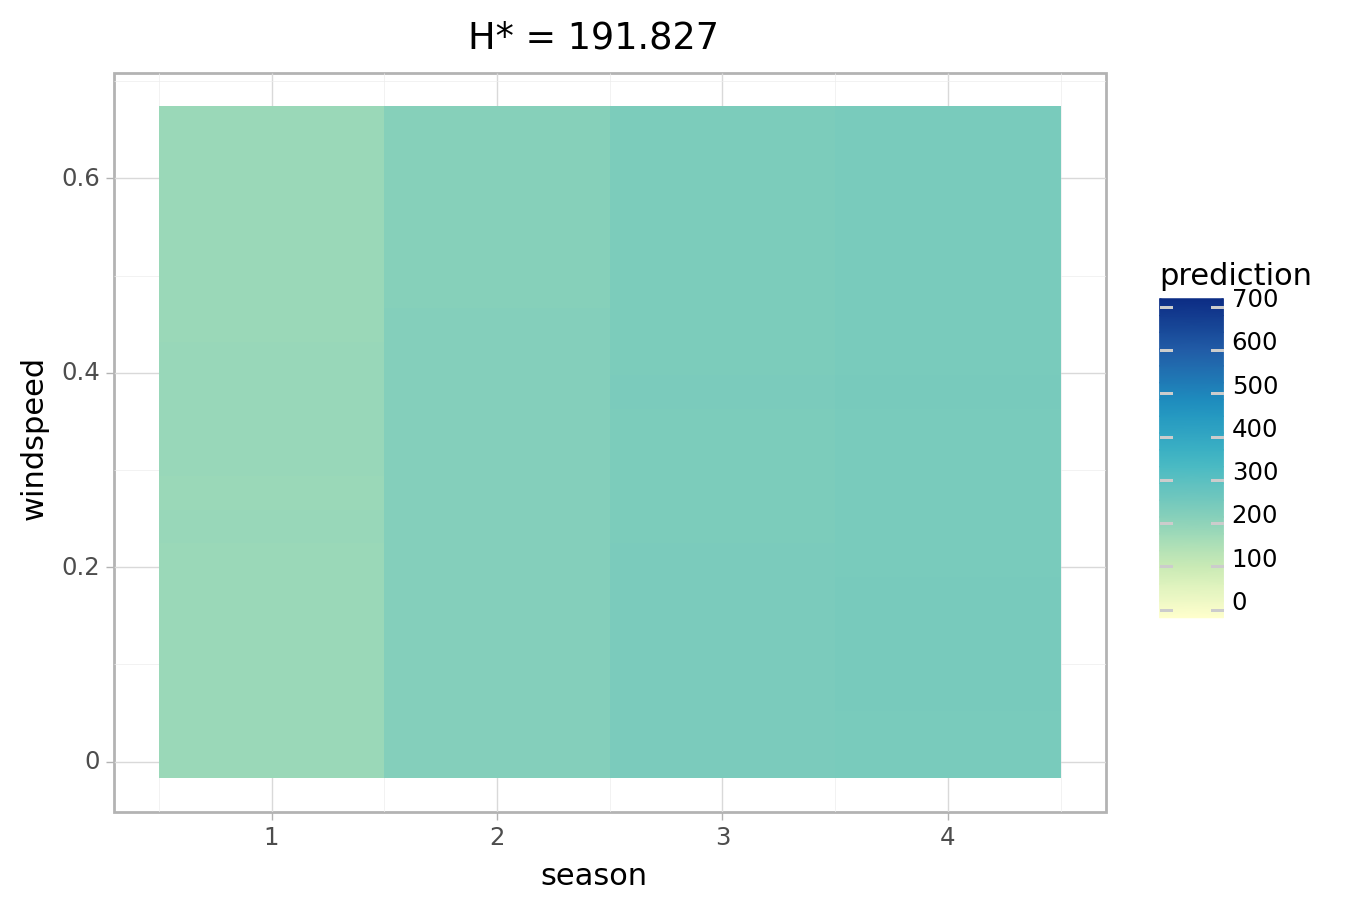

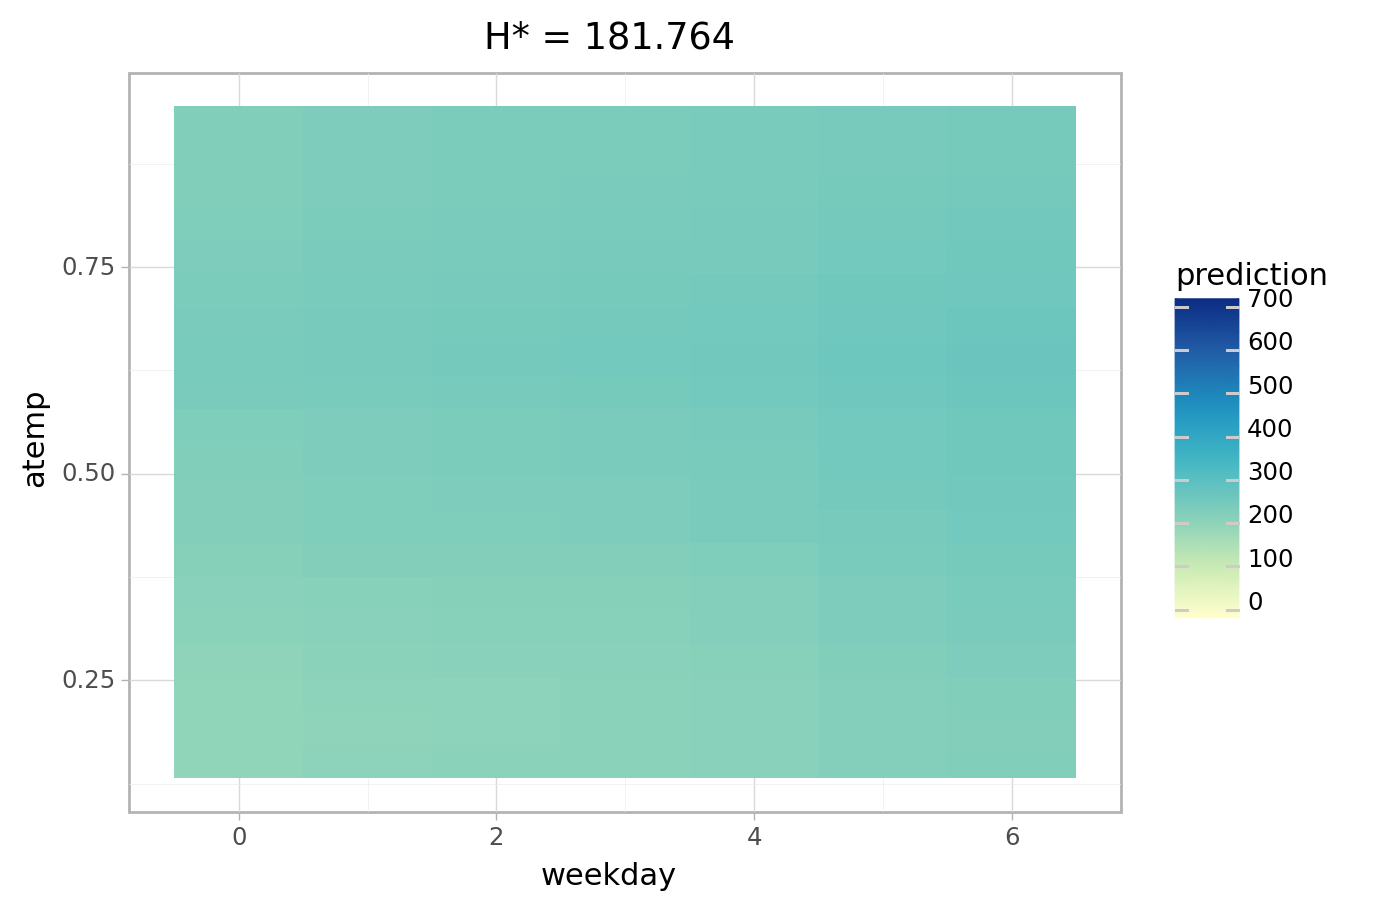

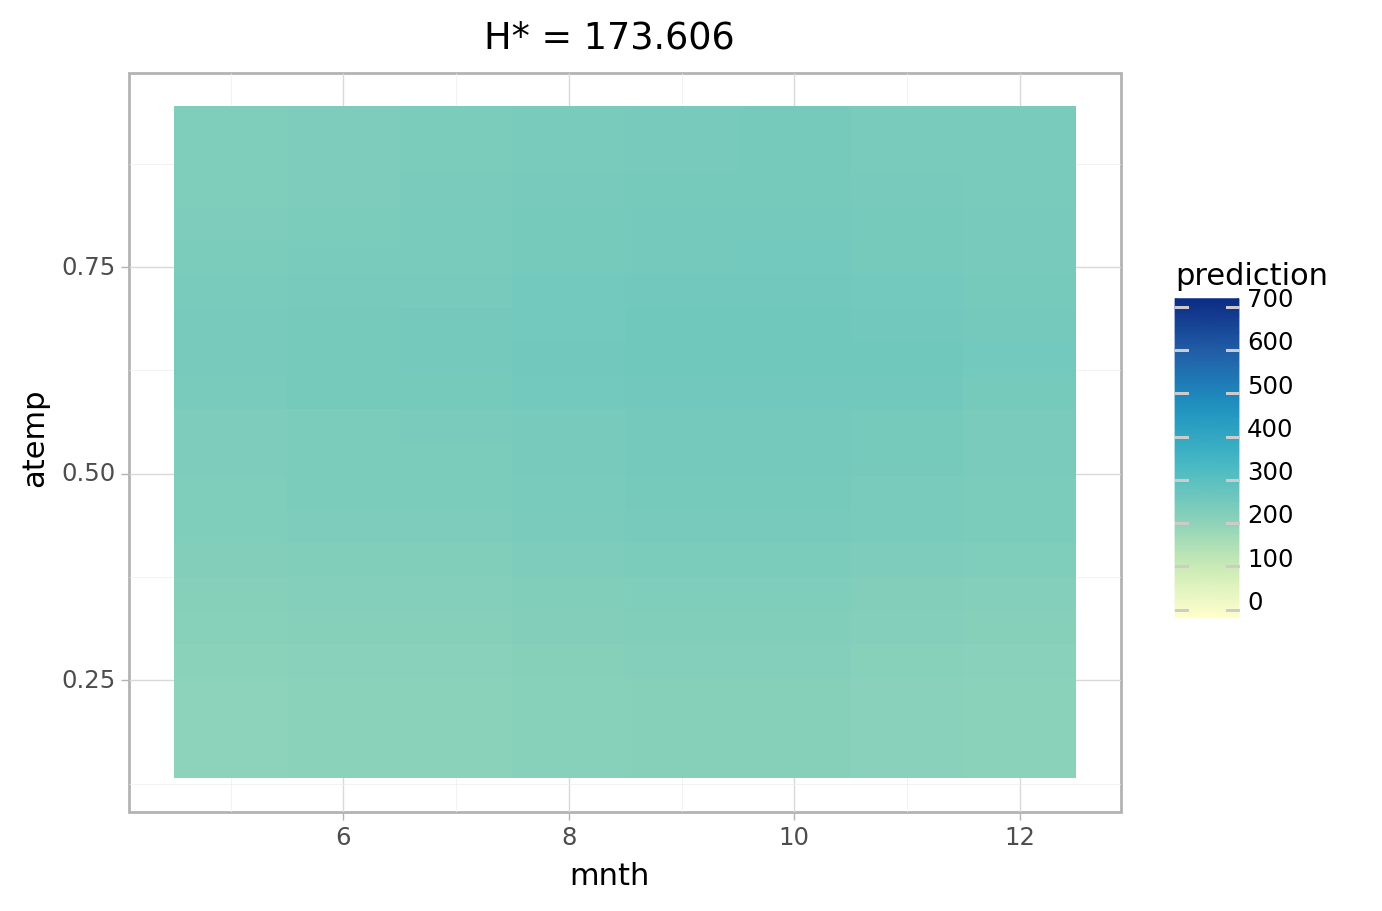

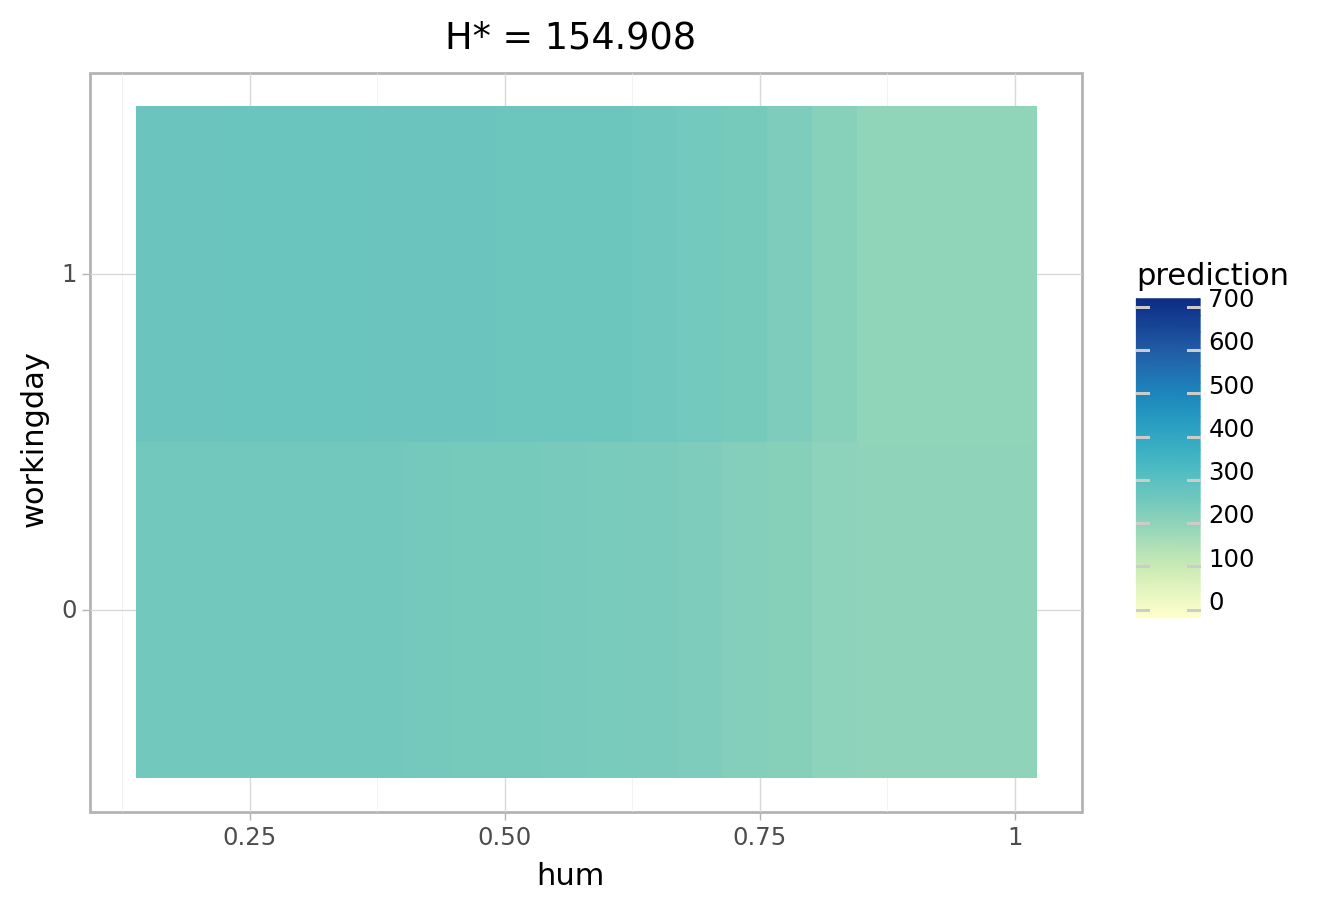

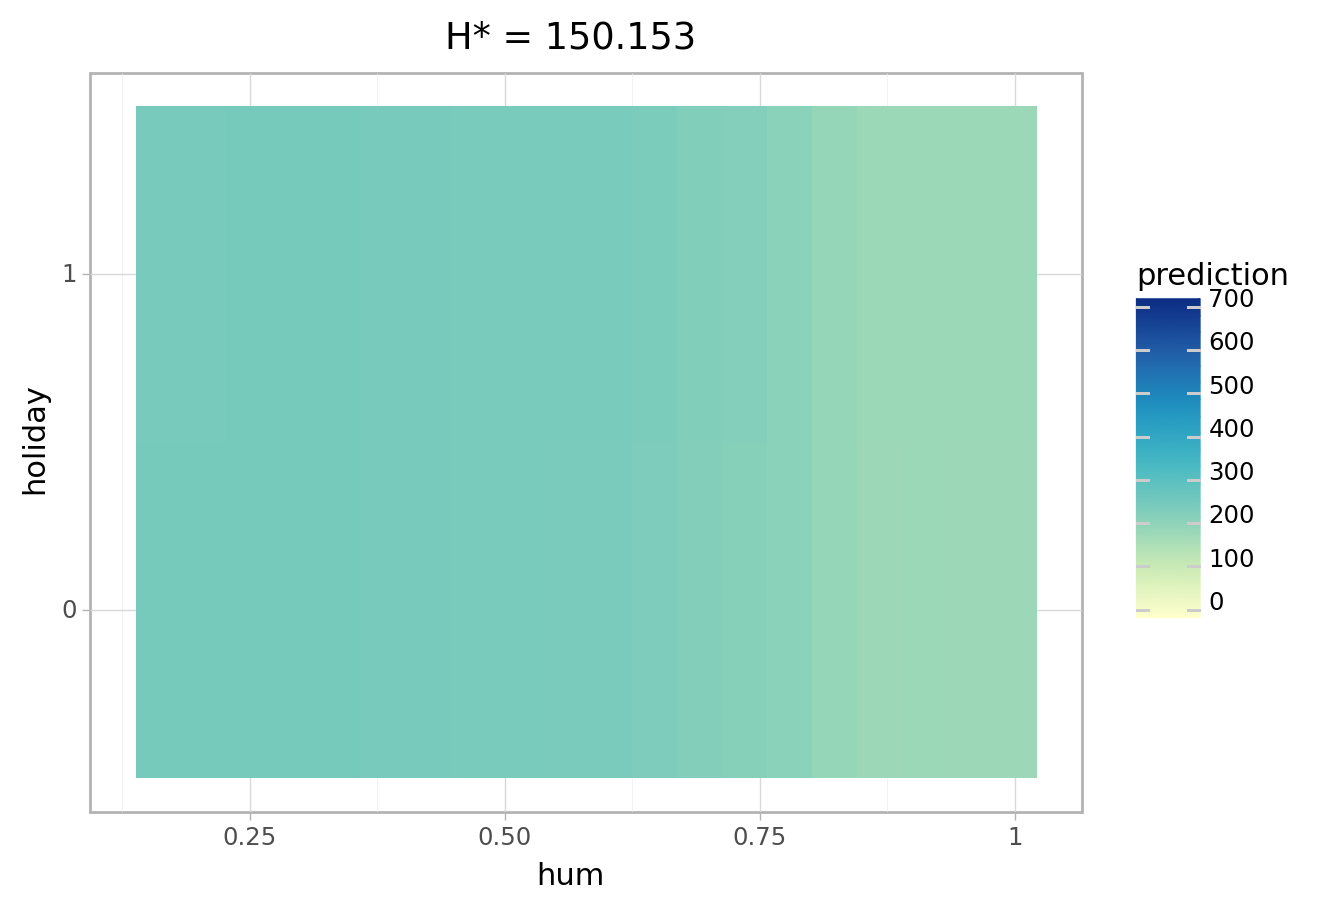

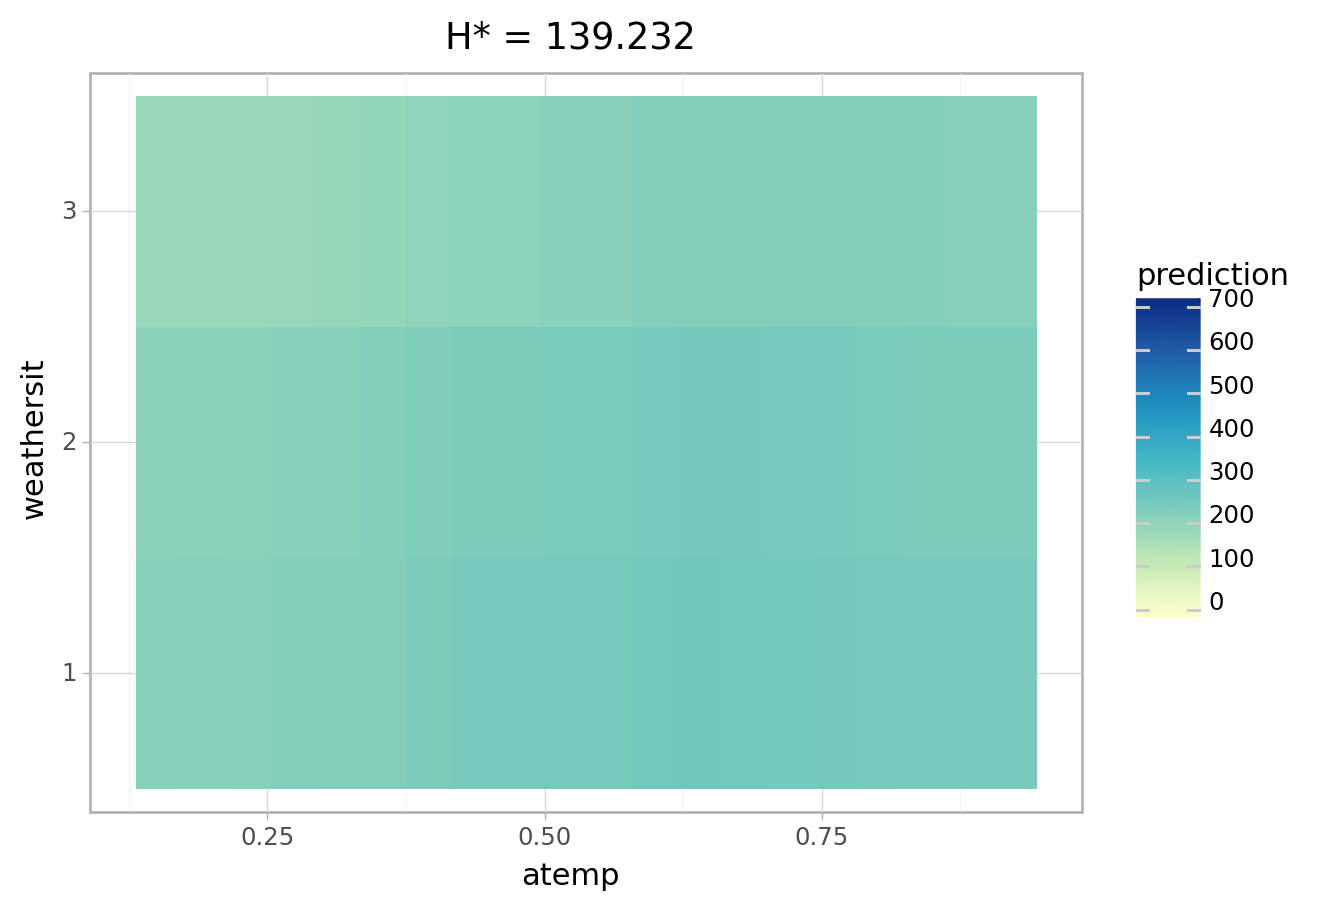

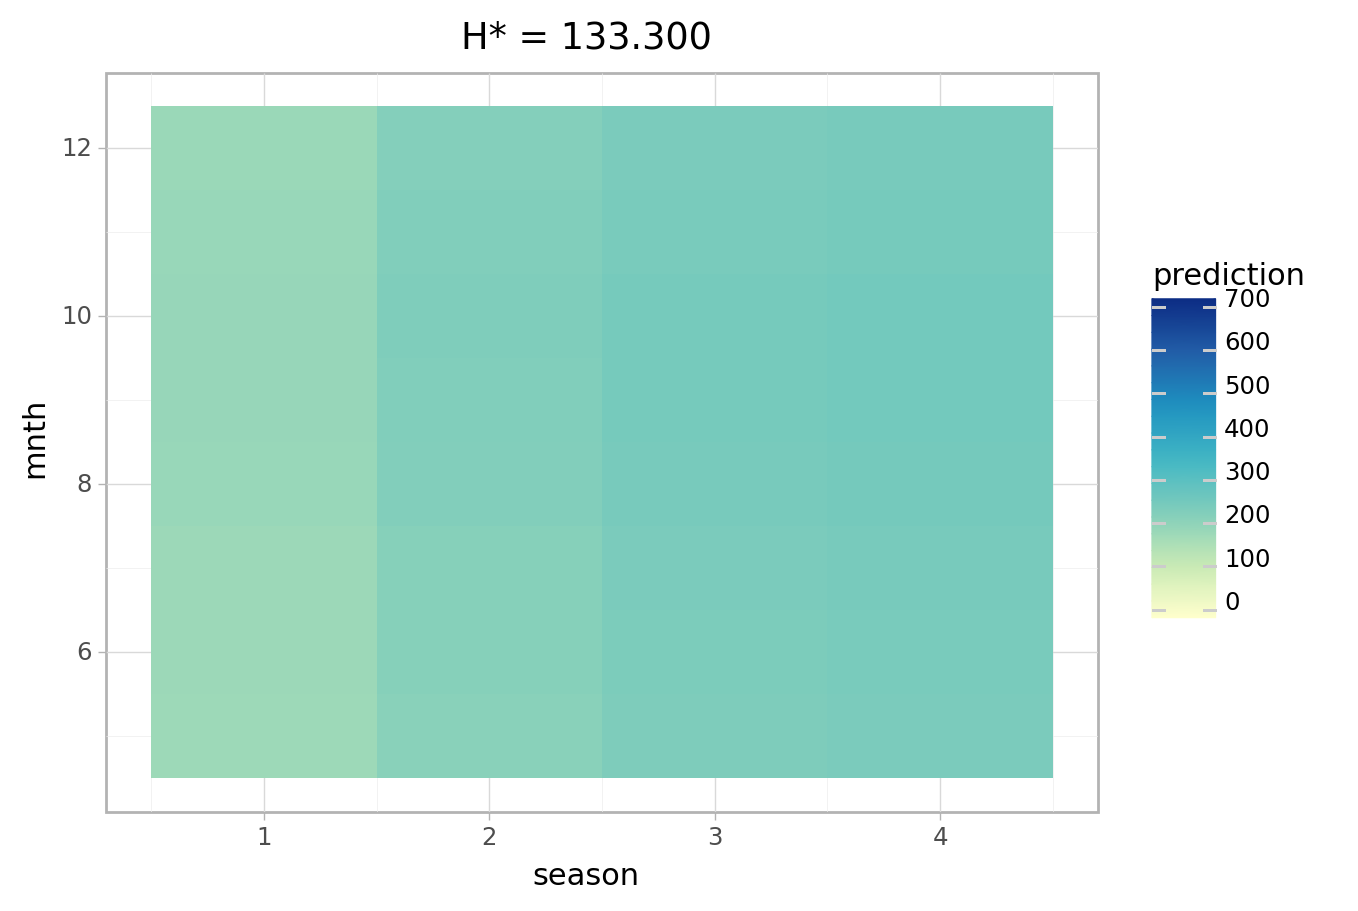

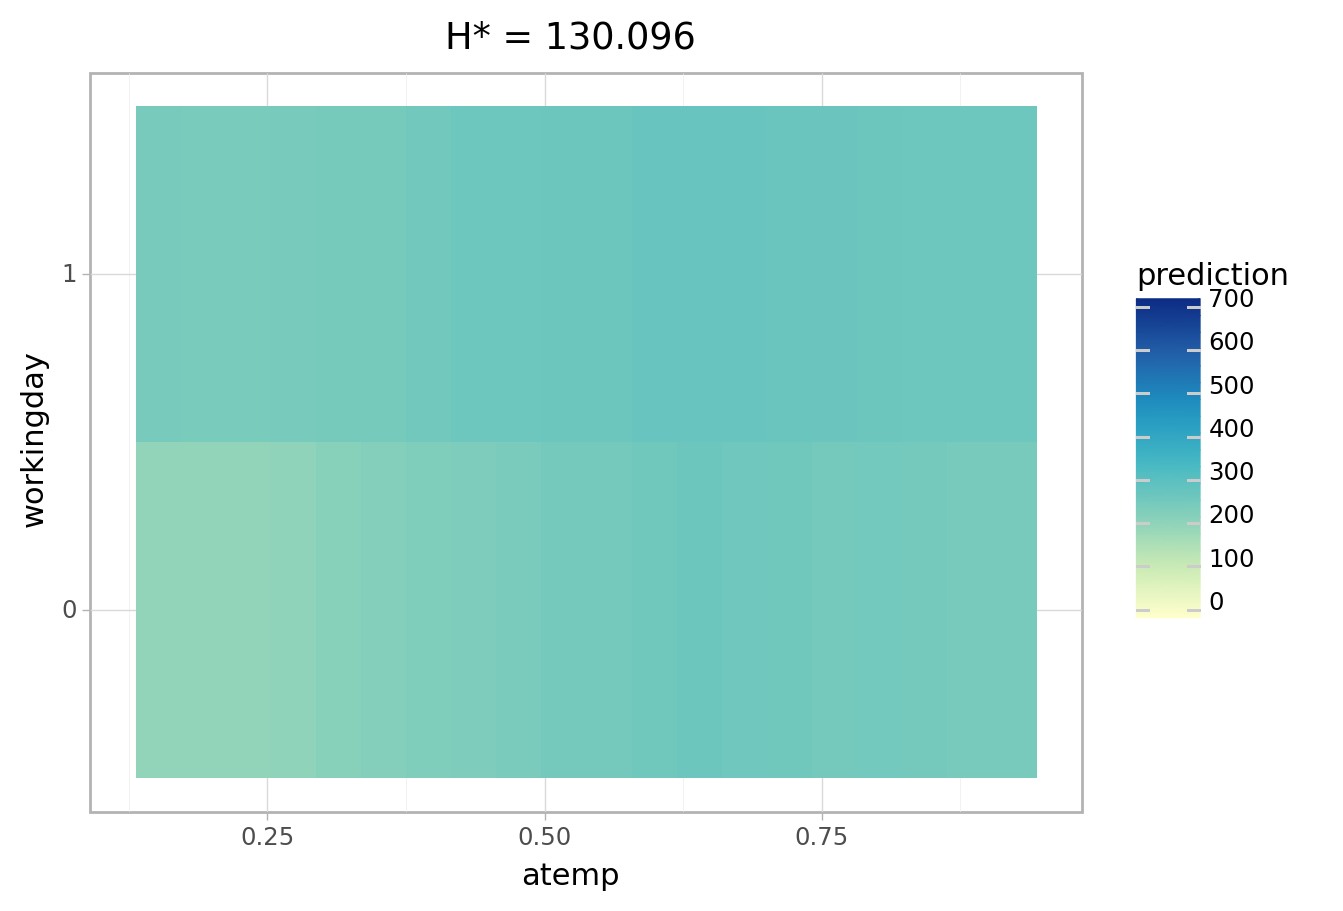

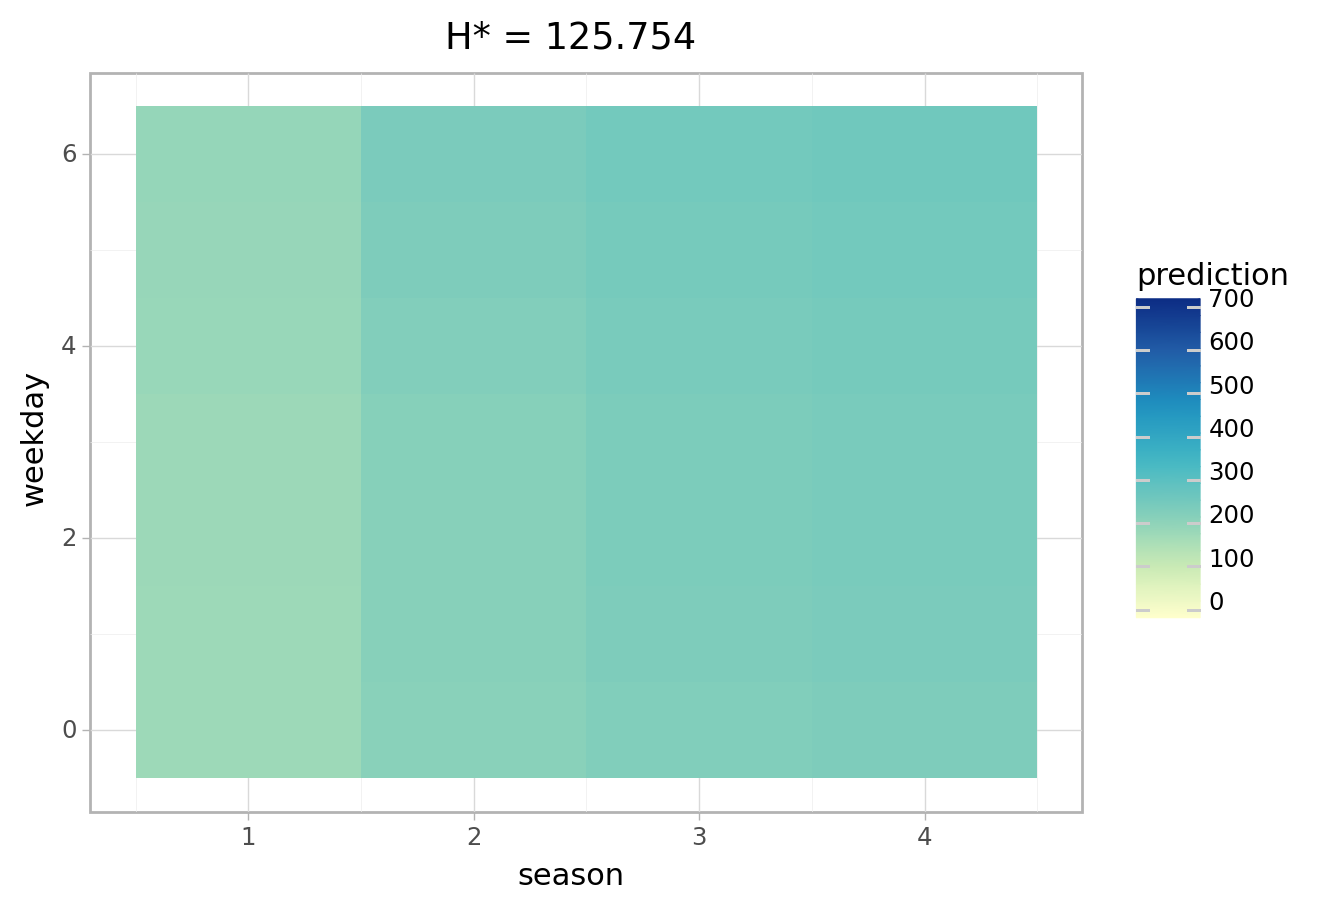

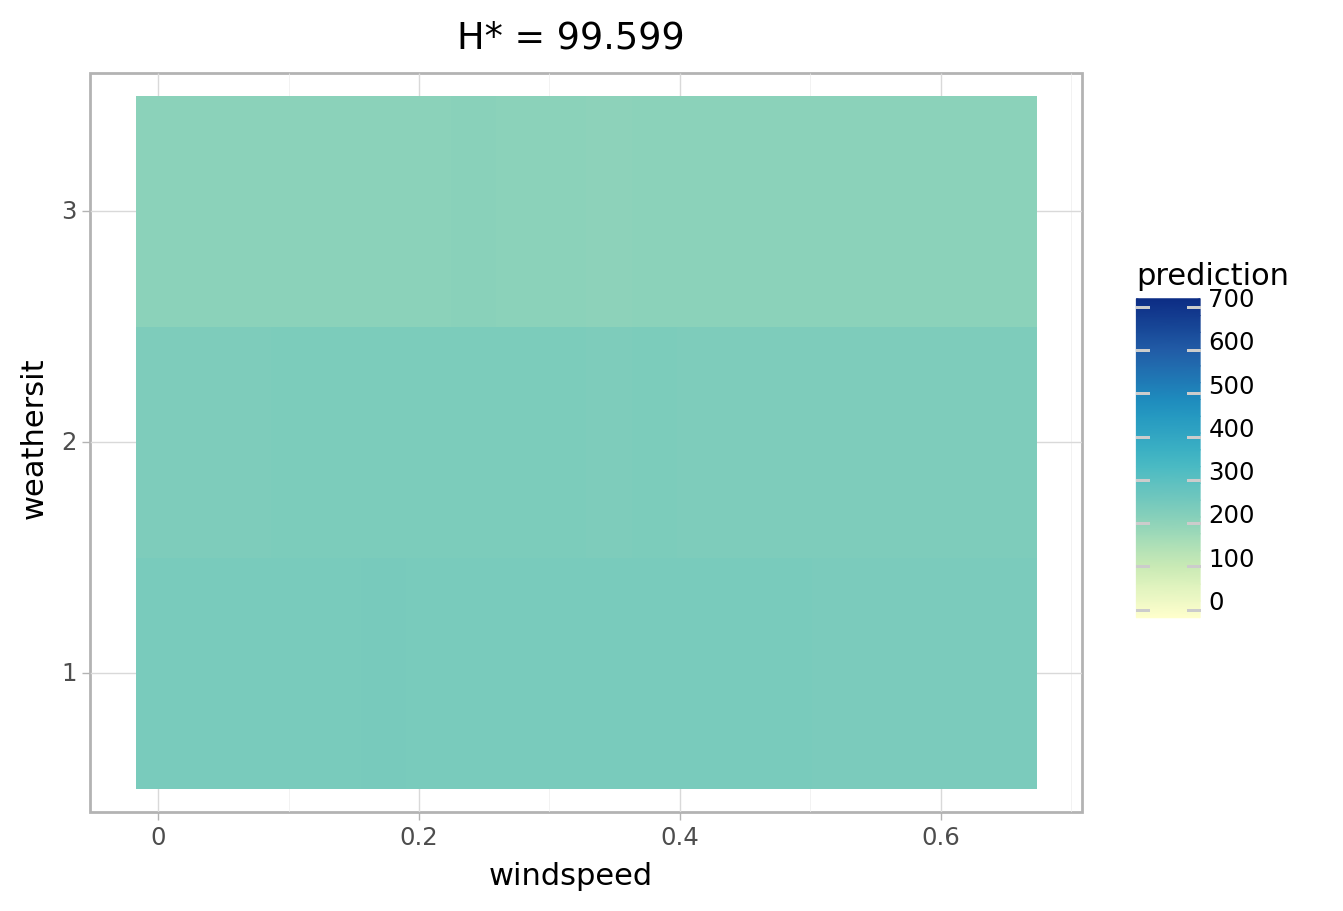

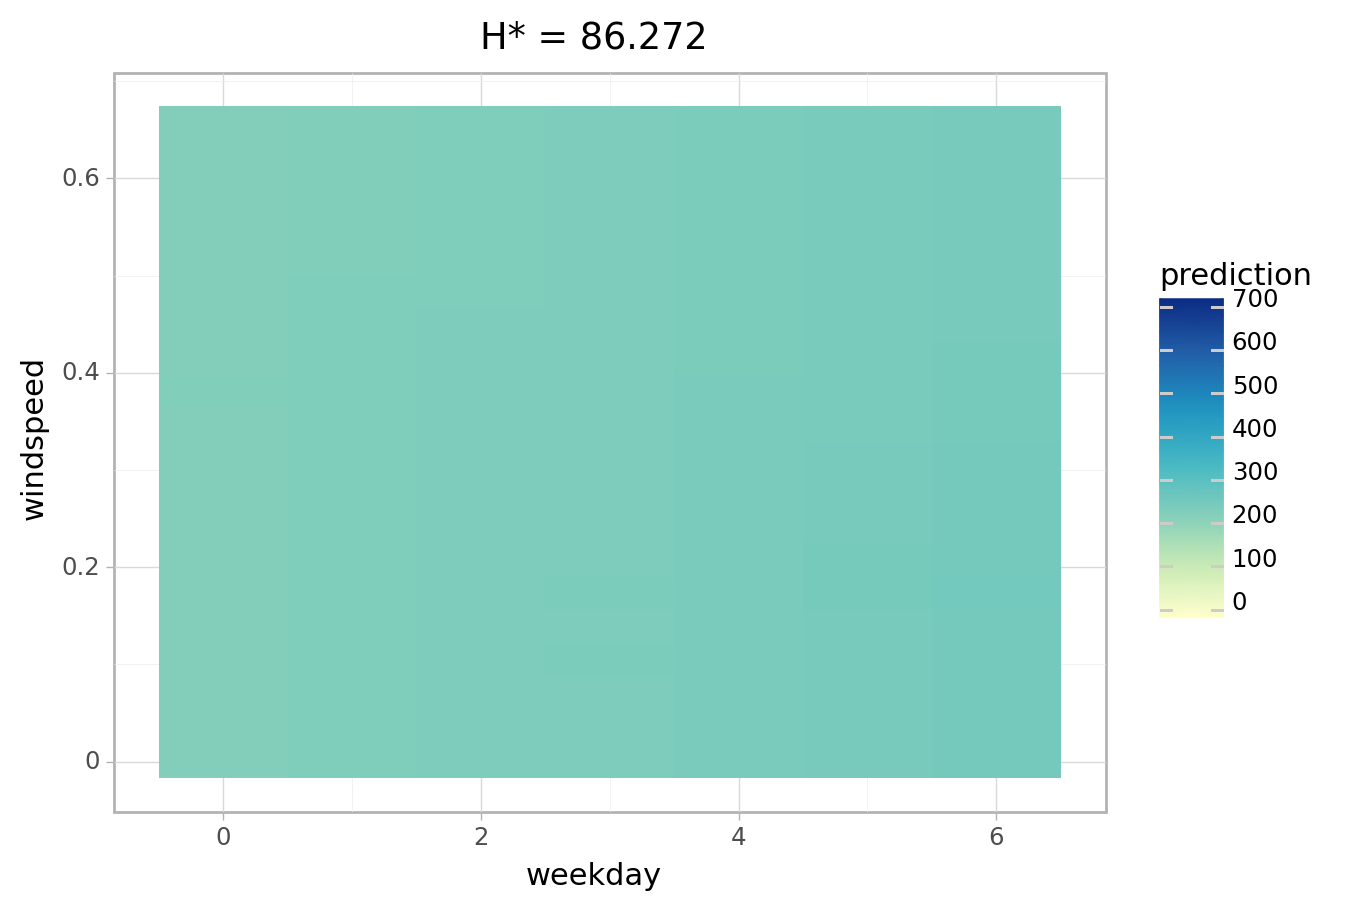

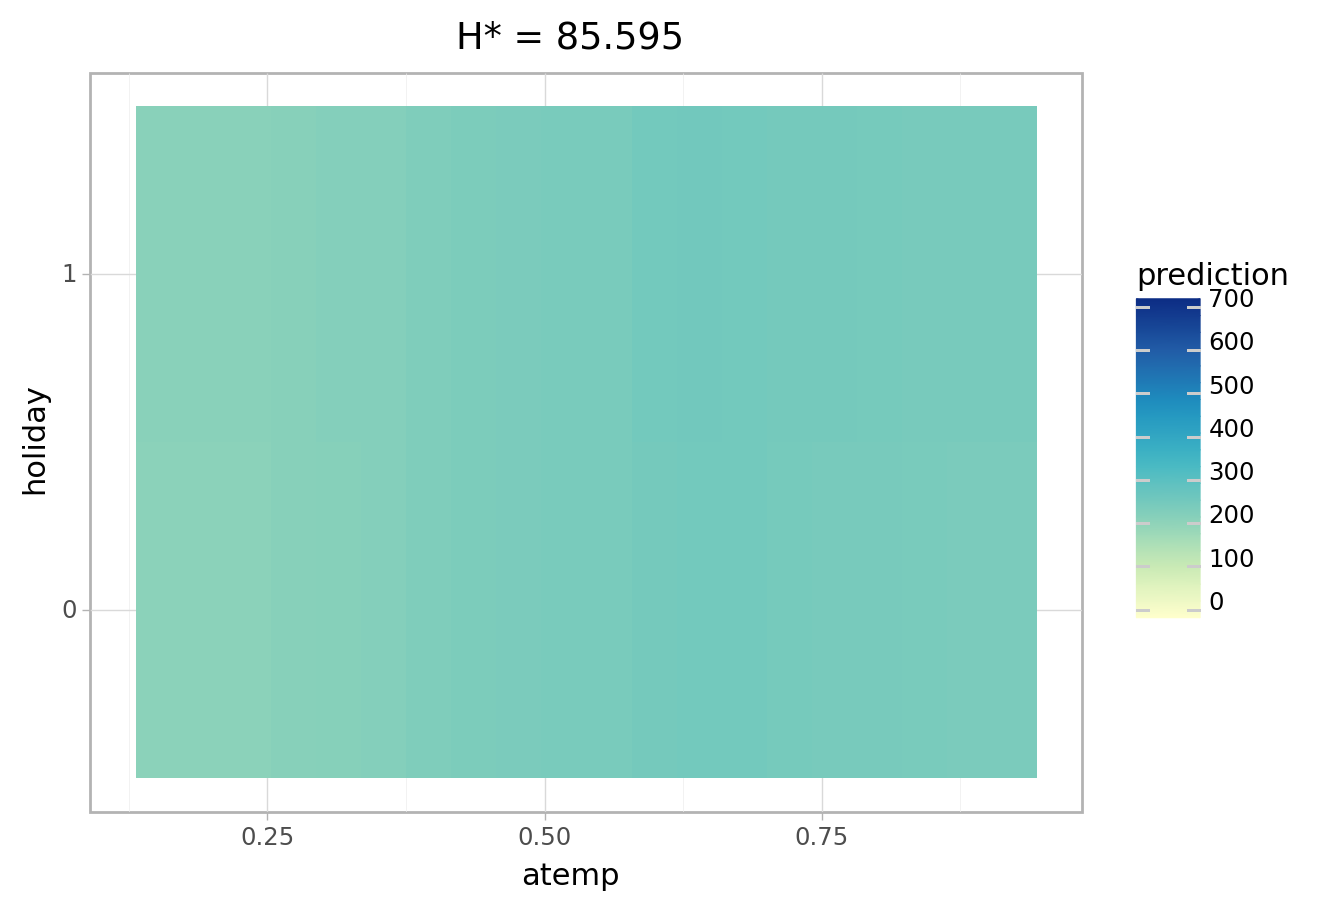

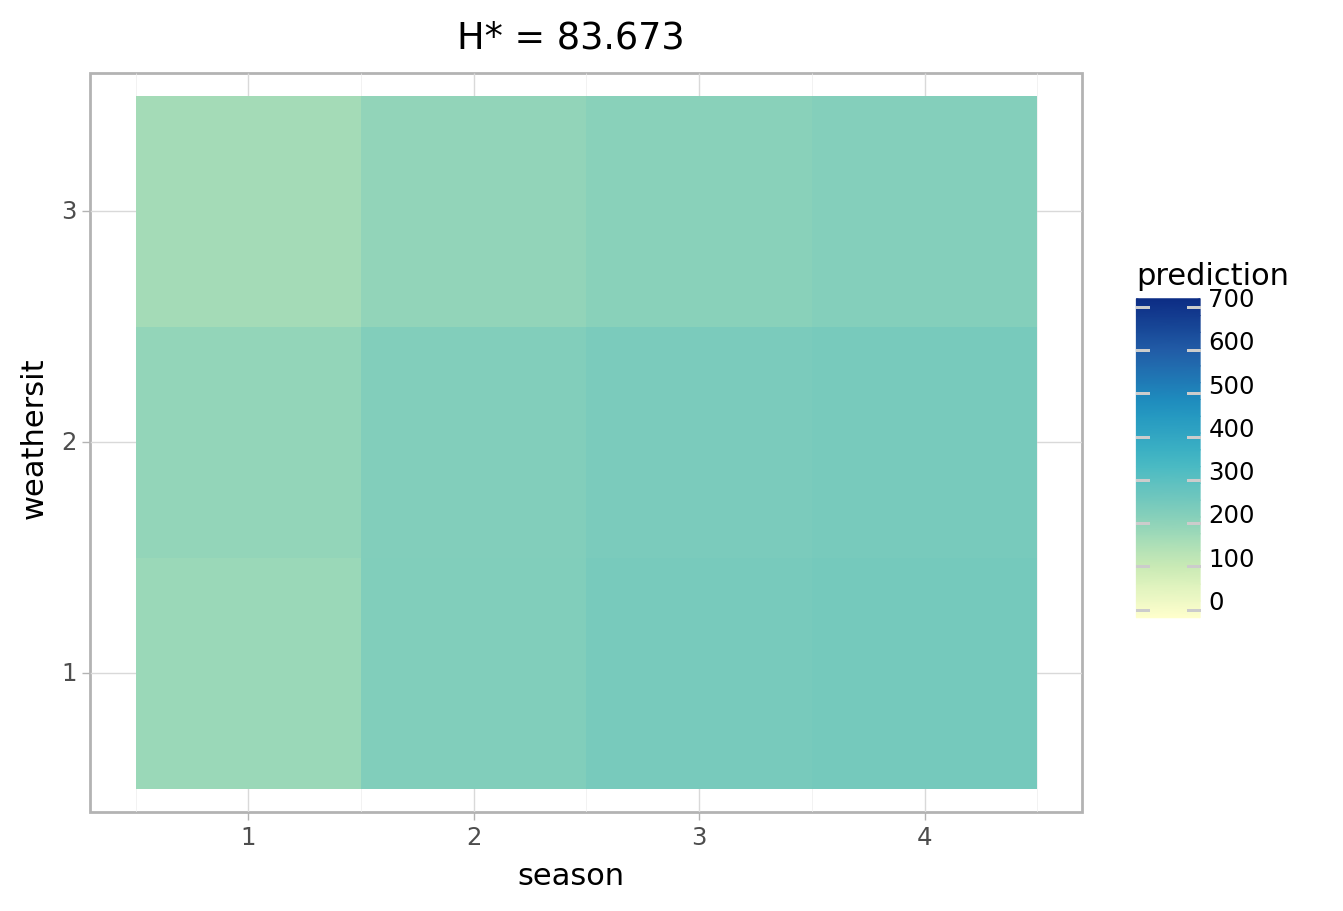

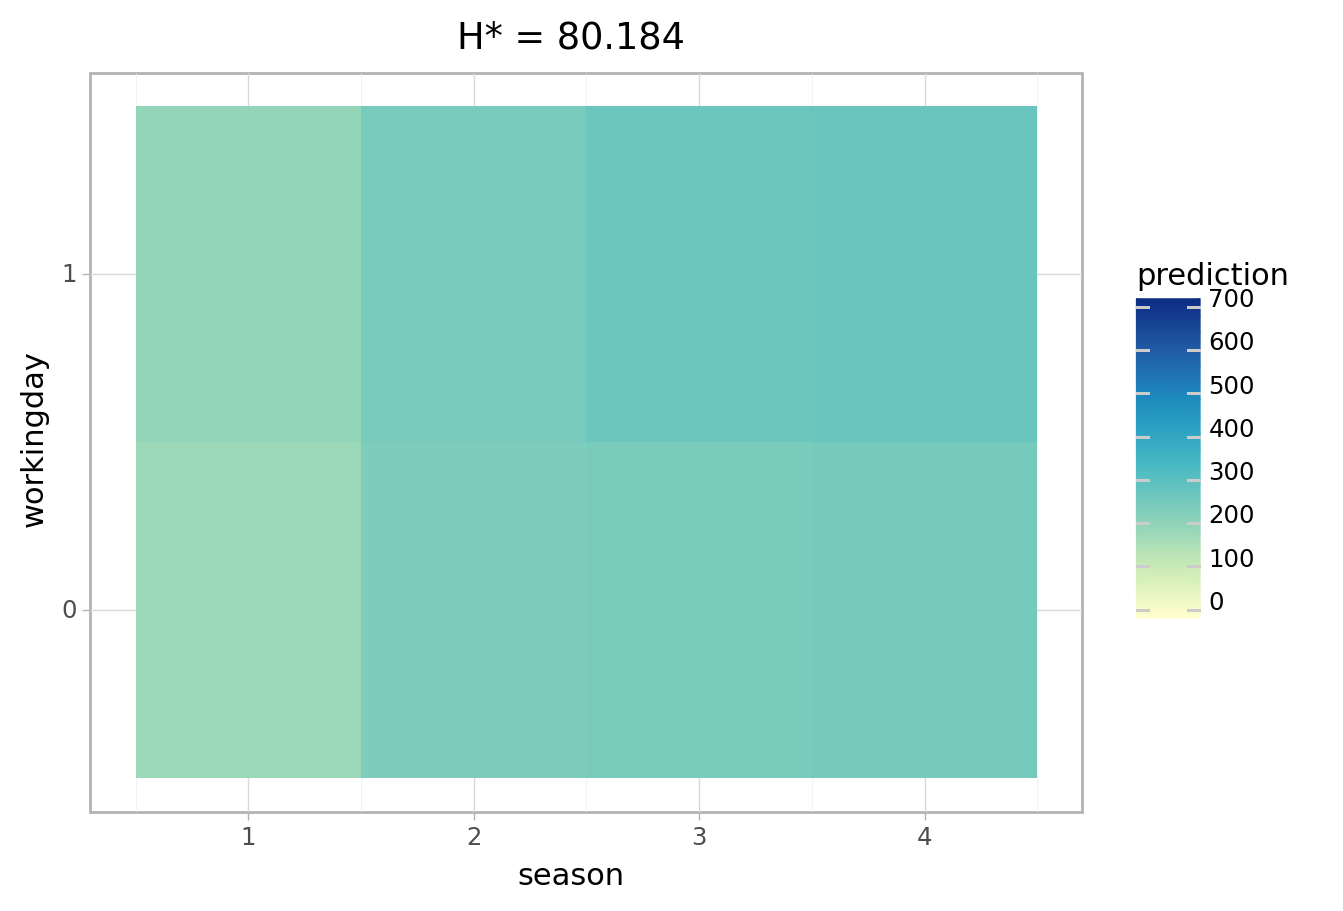

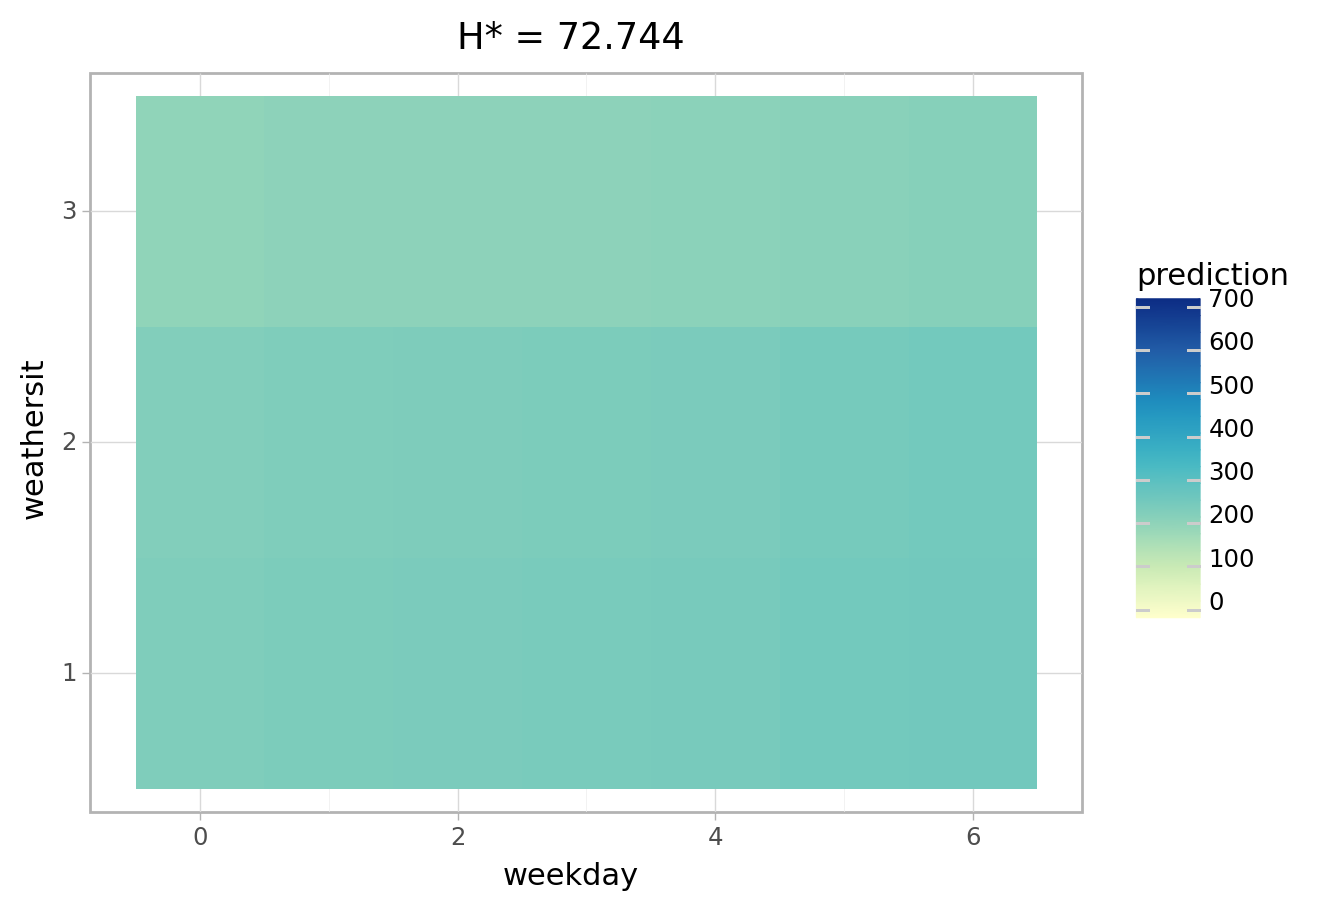

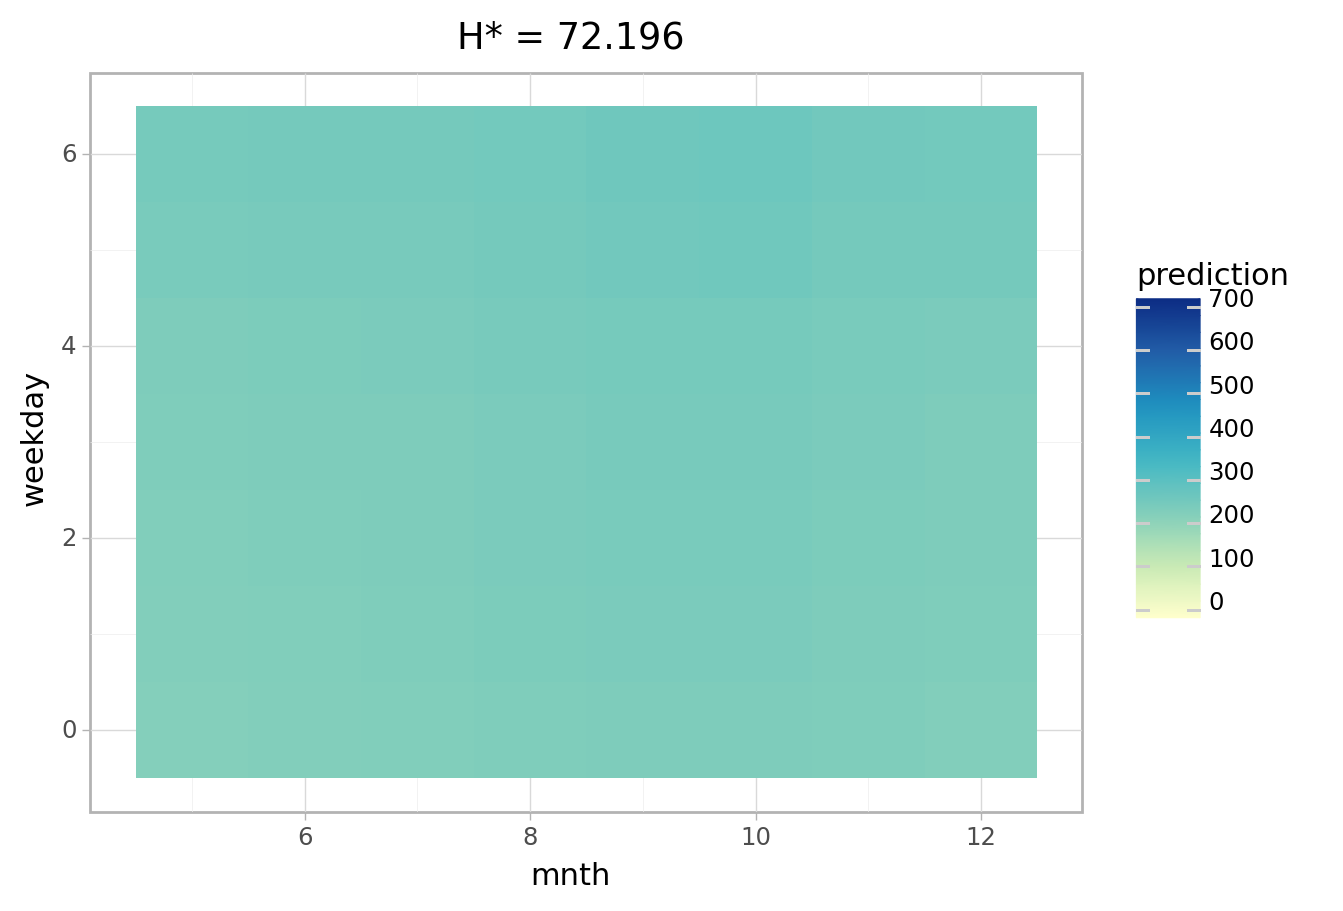

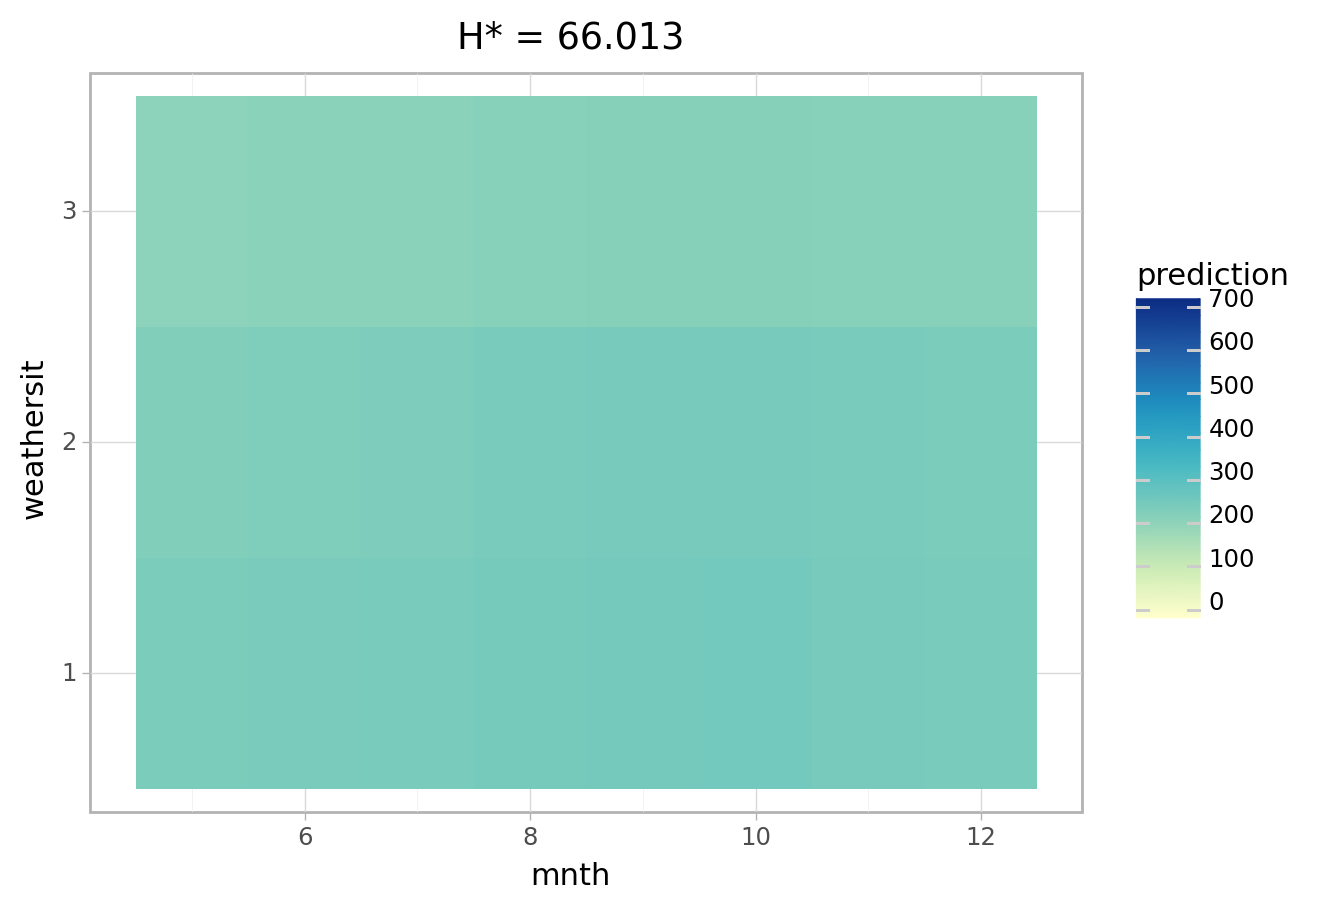

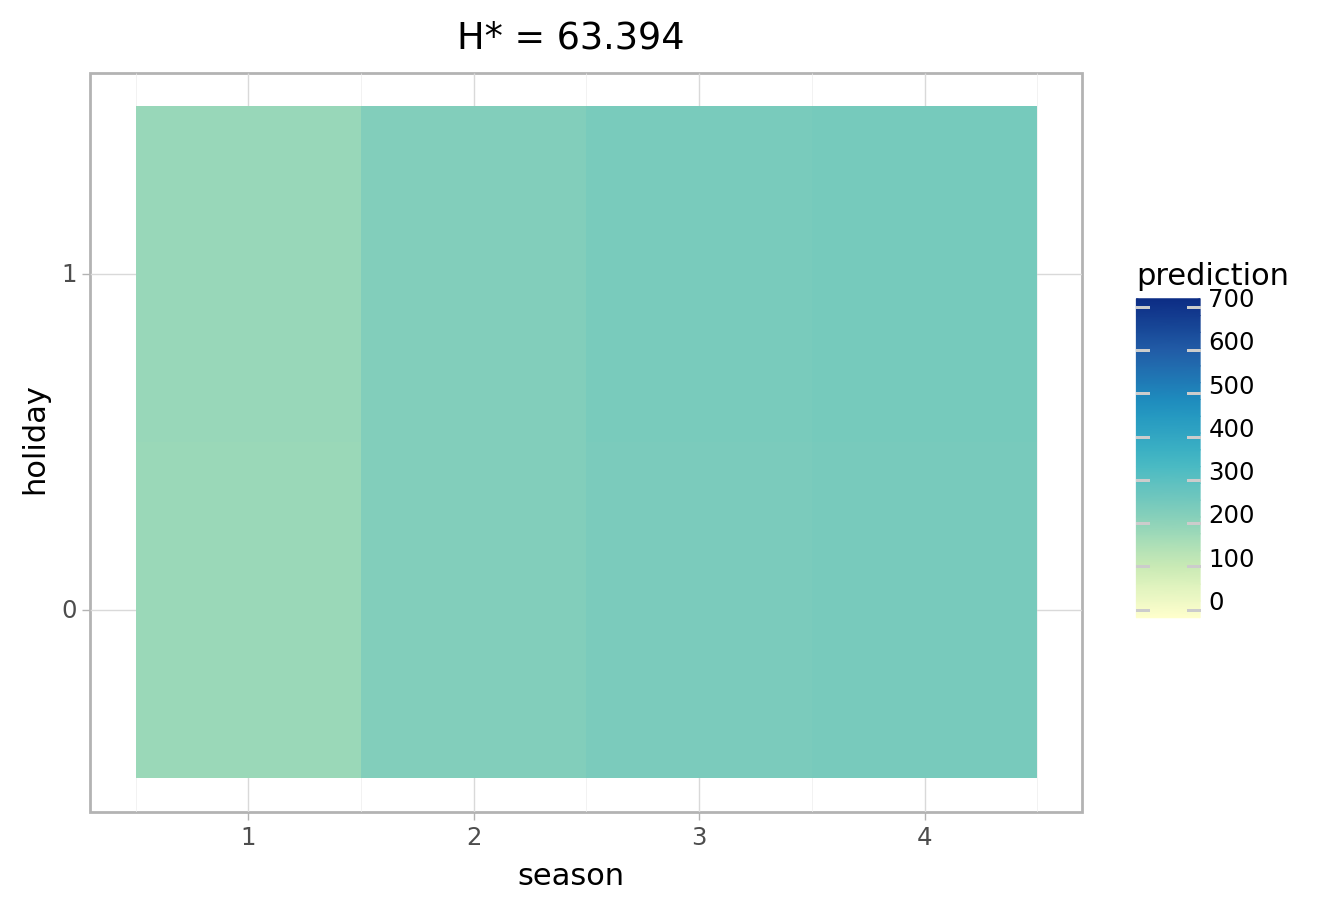

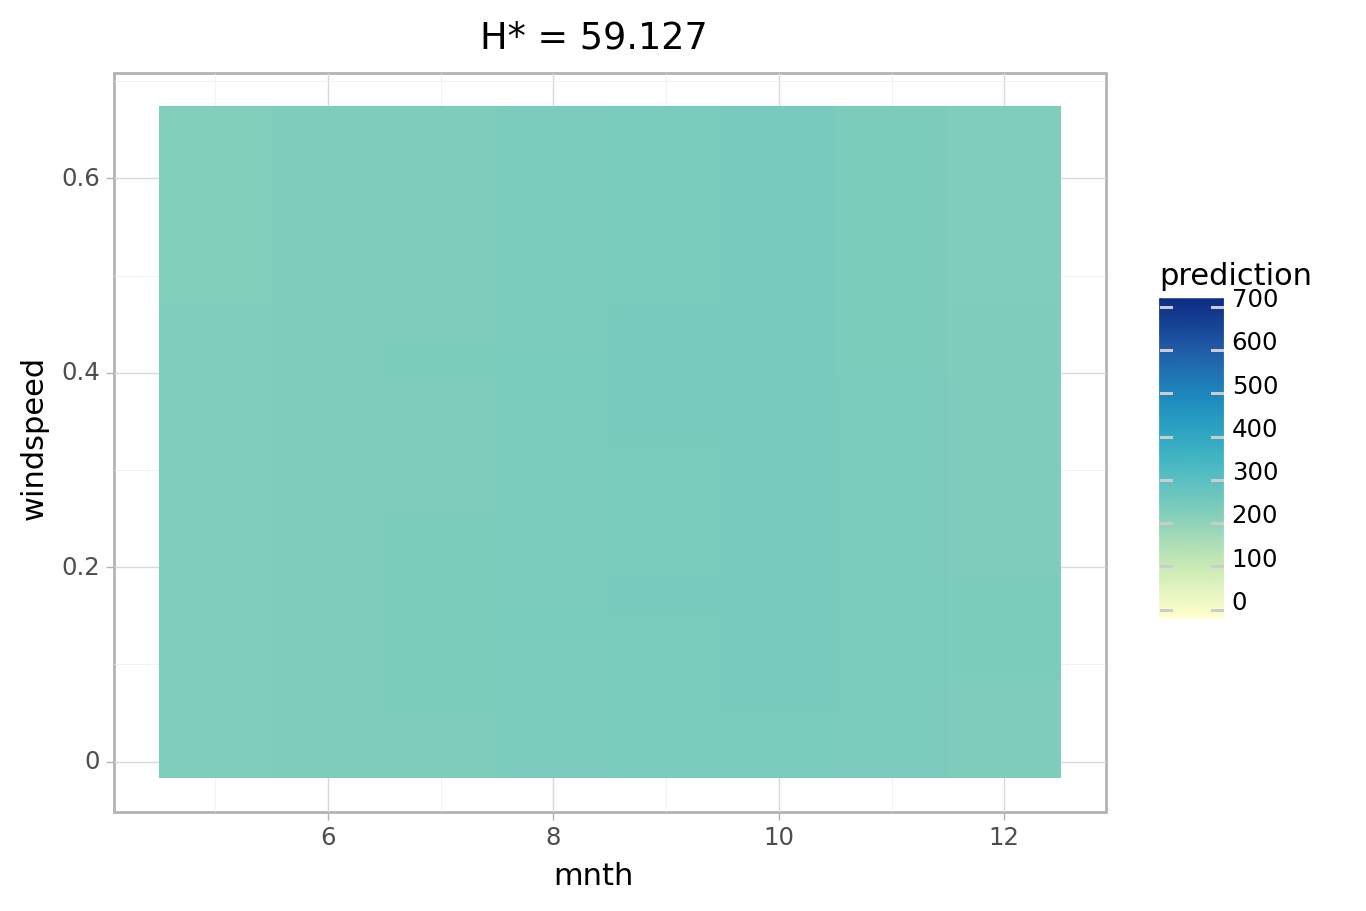

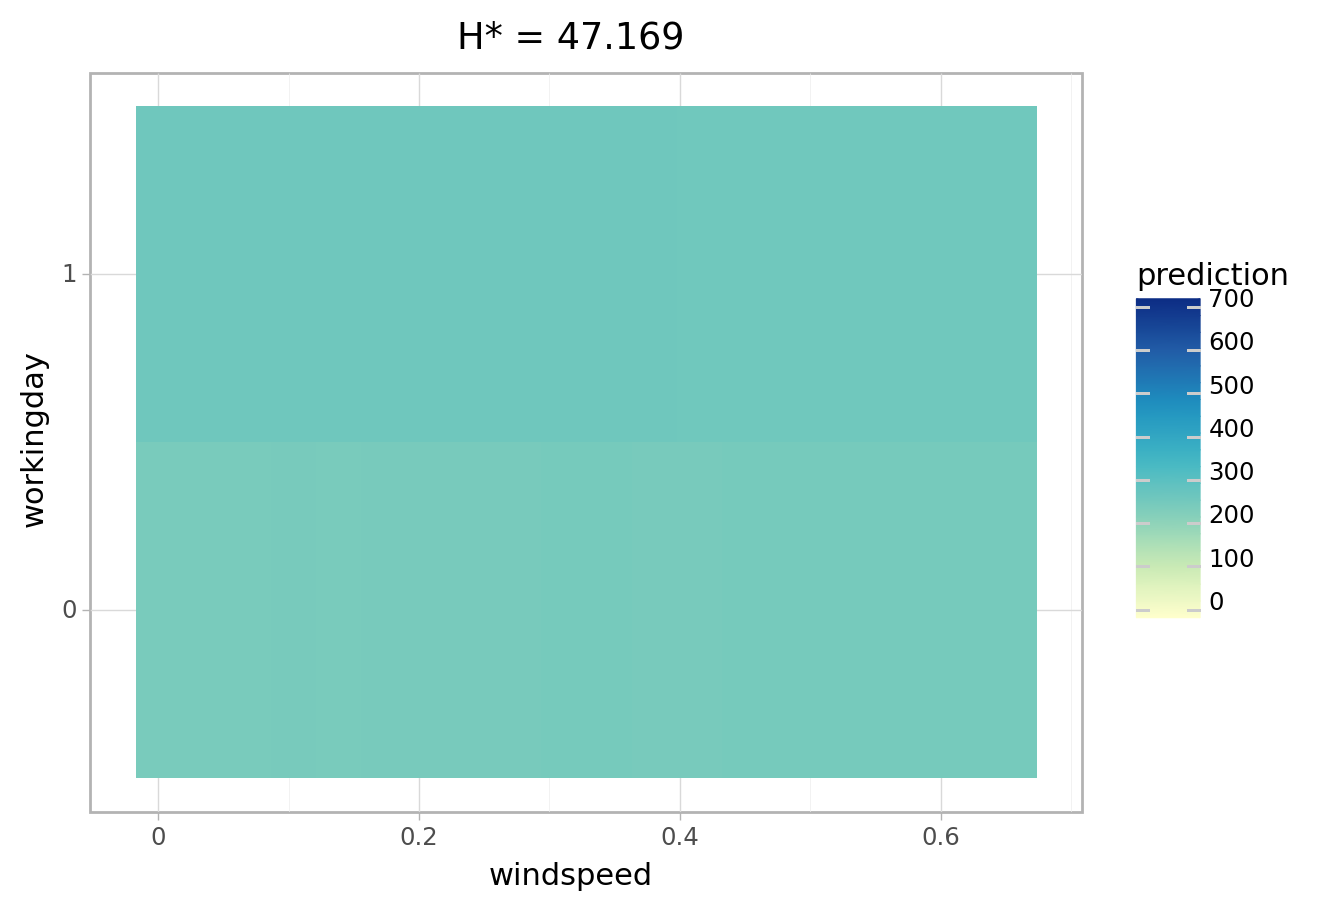

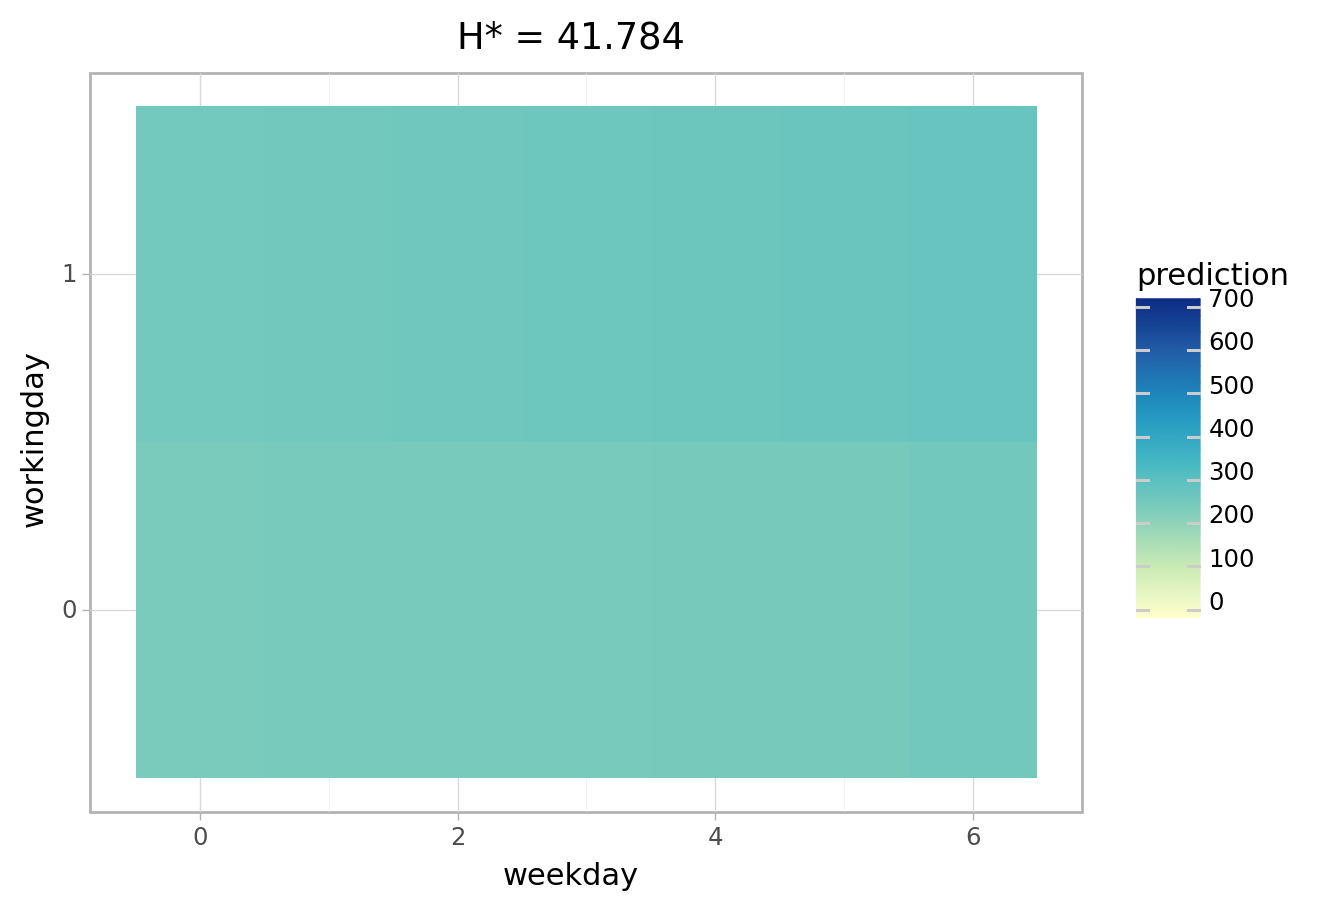

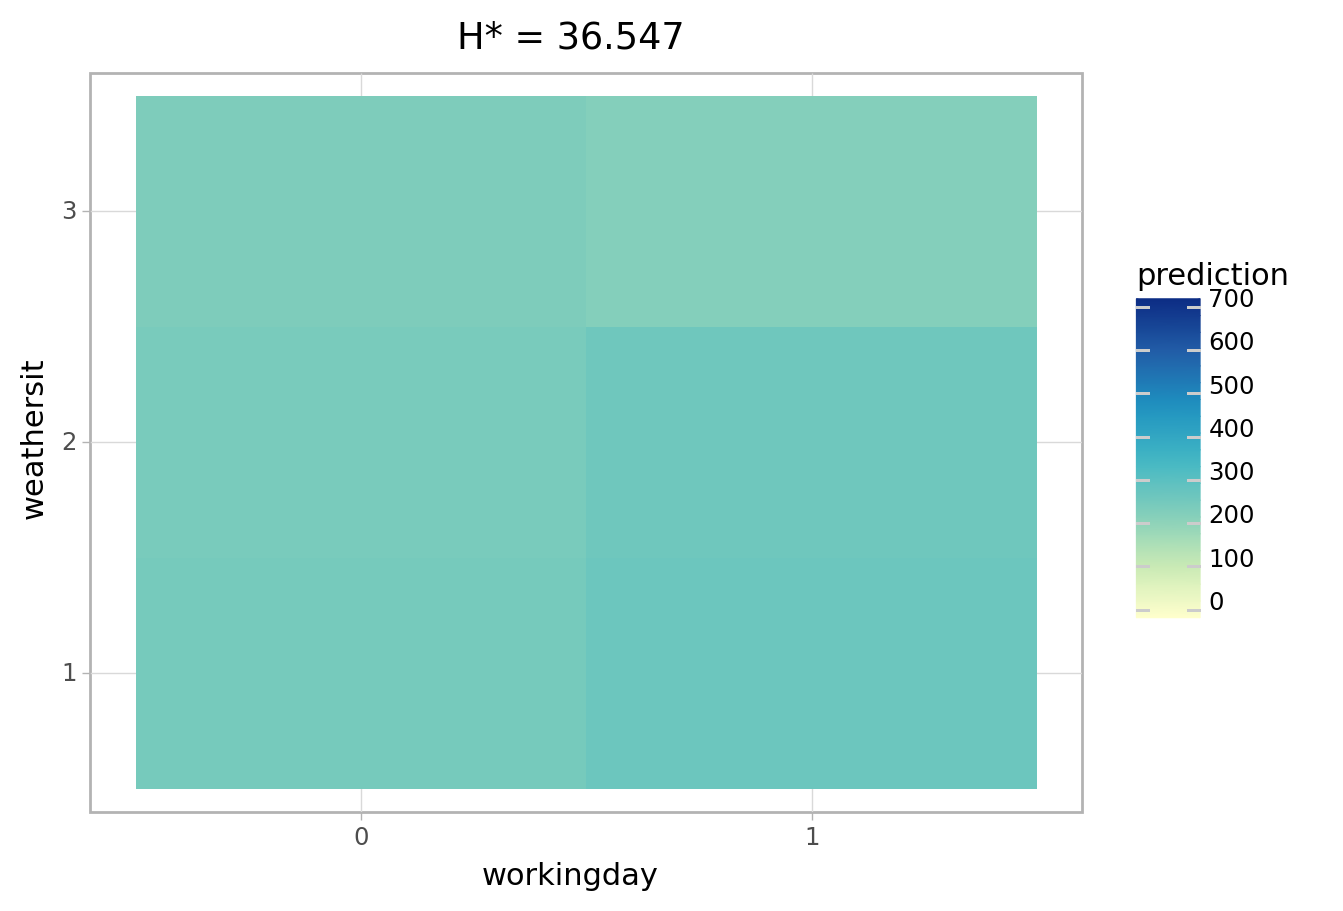

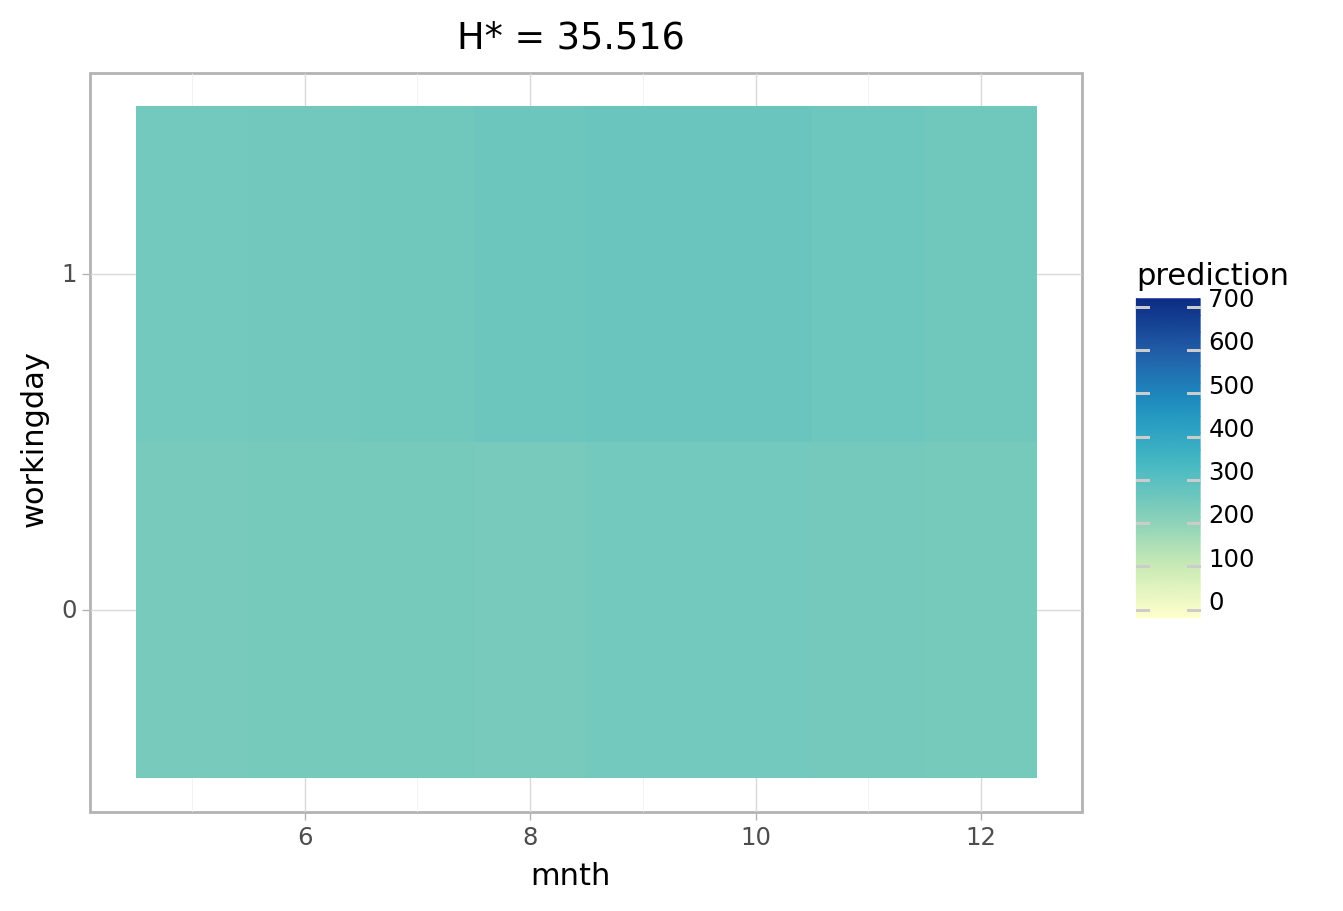

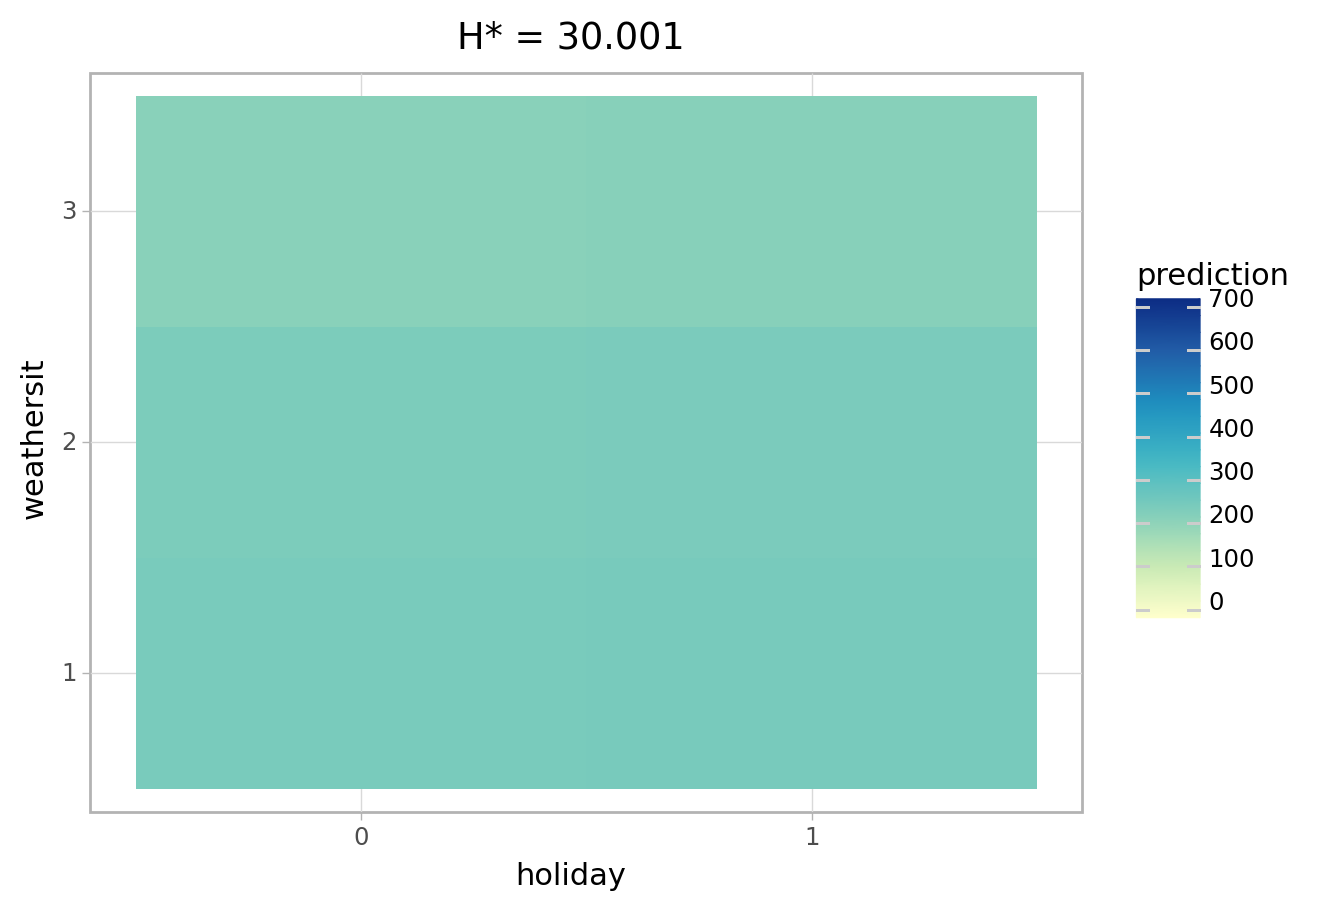

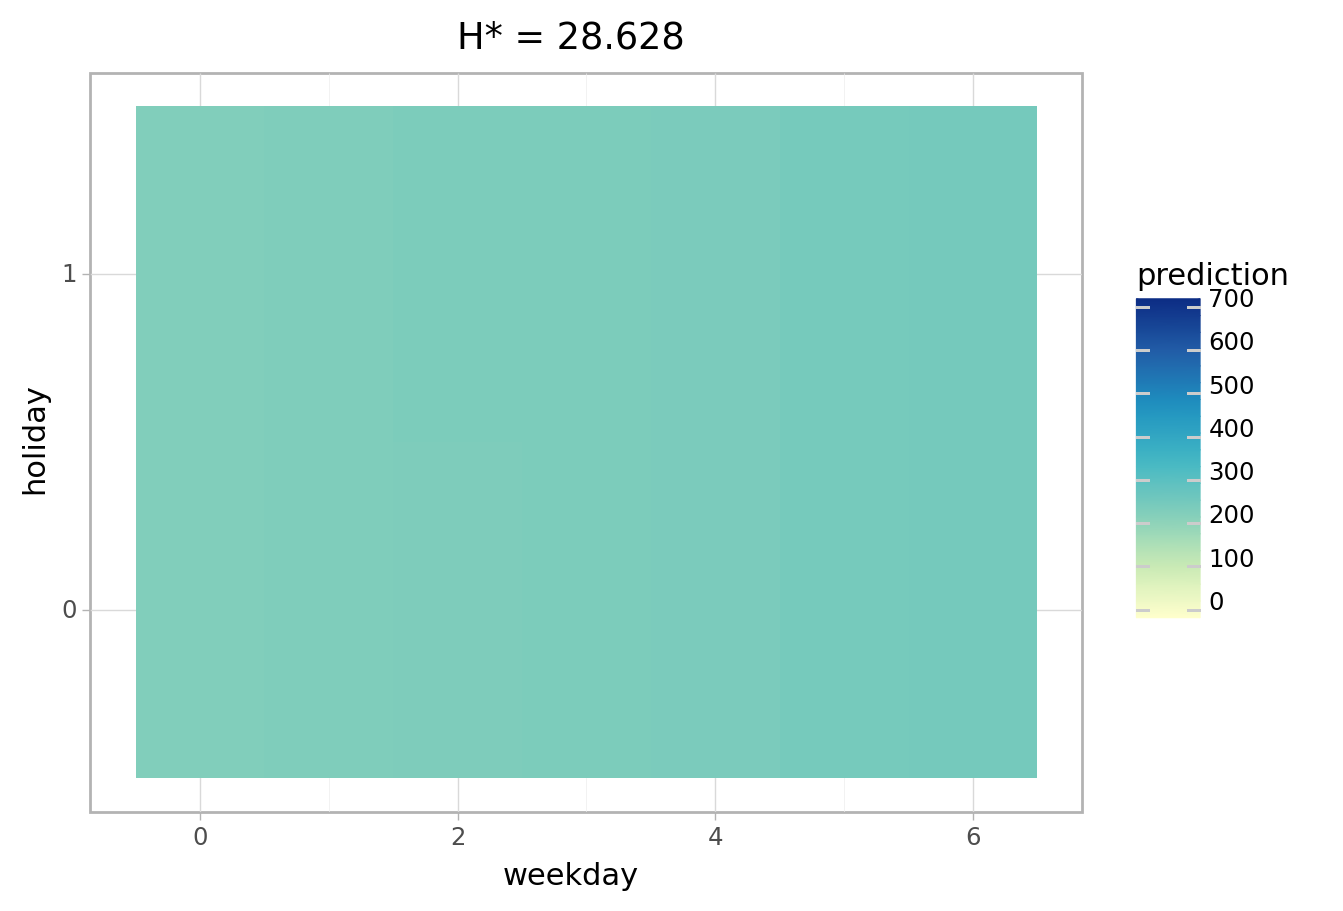

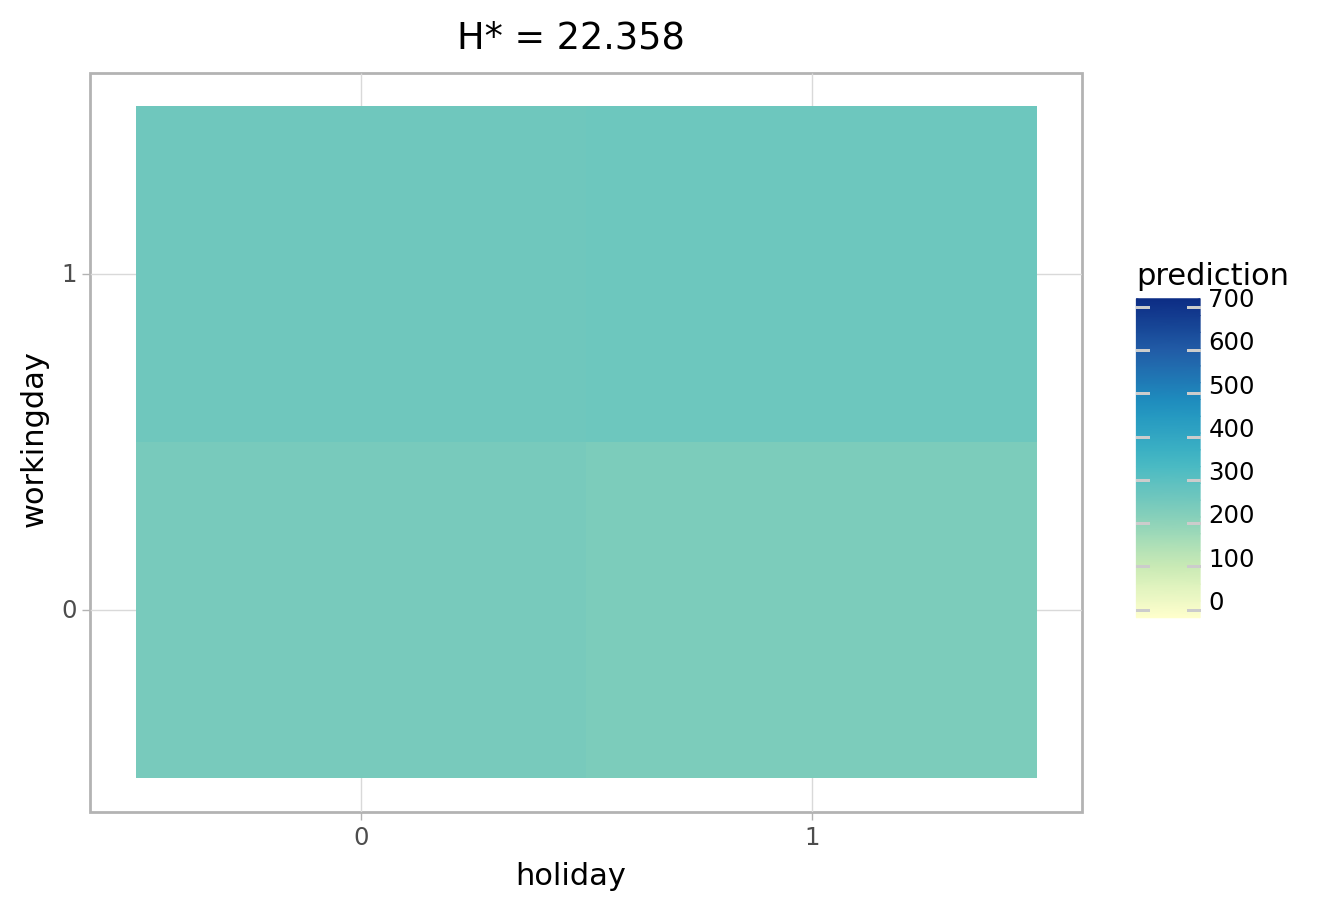

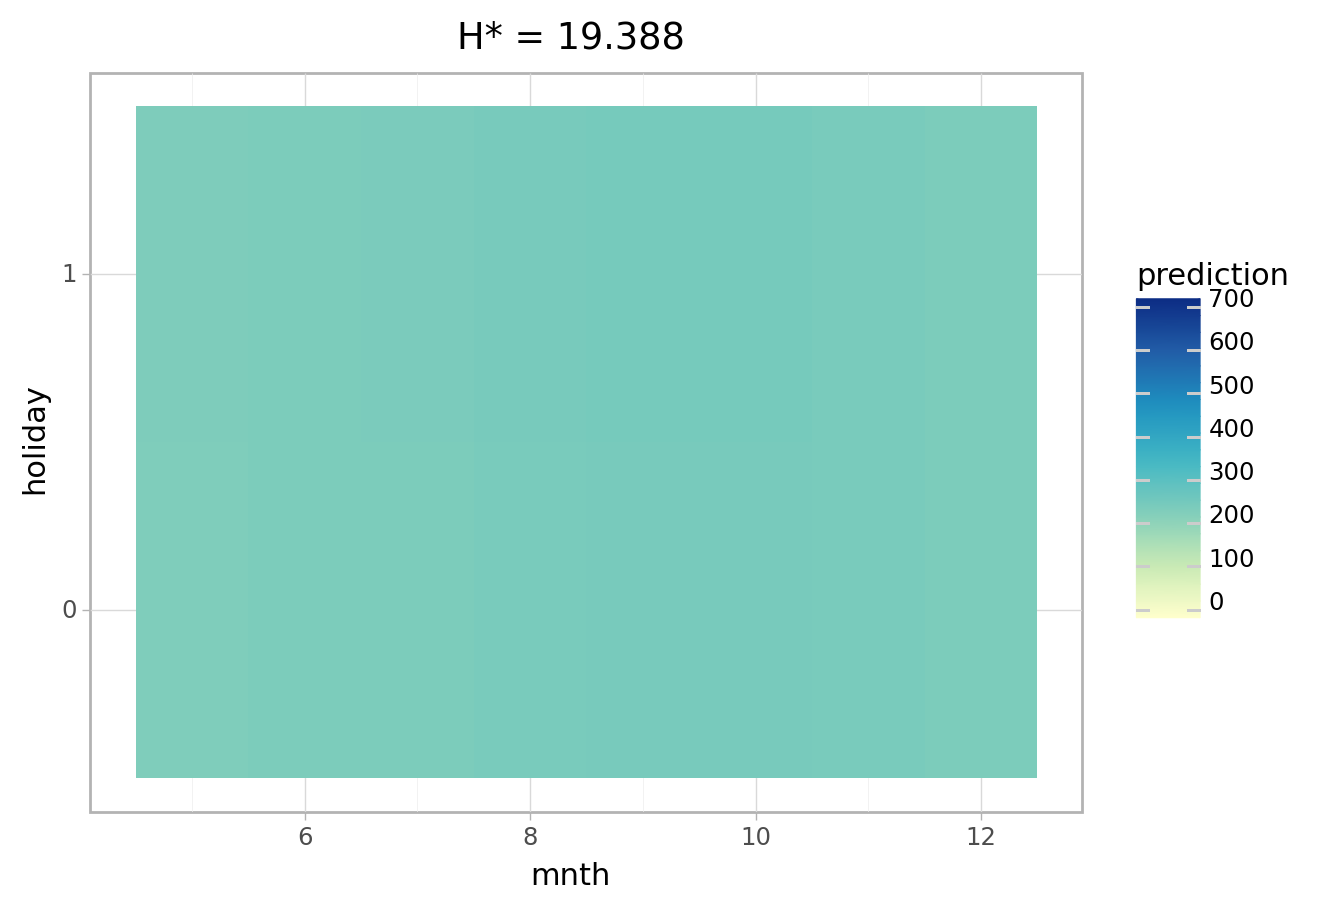

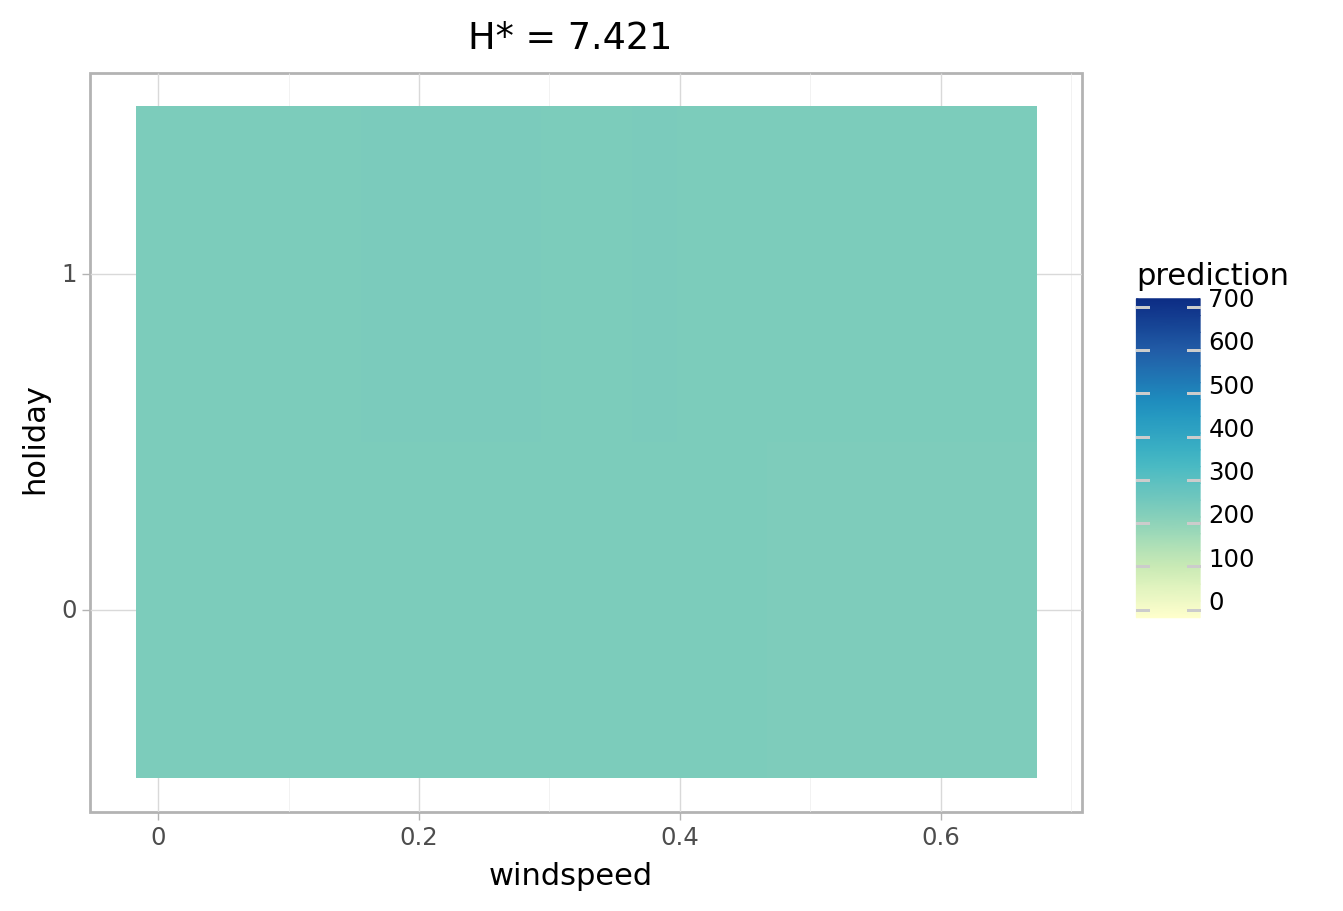

In [14]:
[p.draw() for p in two_way_pdps];

In [16]:
w.single_pdps

[{'num_features': 1,
  'kind': 'categorical',
  'id': 'weathersit',
  'x_feature': 'weathersit',
  'x_values': ['1', '2', '3'],
  'mean_predictions': [245.67050000000006, 239.982, 216.87150000000003],
  'mean_predictions_centered': [0.0, 0.0, 0.0],
  'pdp_min': 216.87150000000003,
  'pdp_max': 245.67050000000006,
  'ice_min': 4.1,
  'ice_max': 931.25,
  'ice_lines': array([[  7.6 ,   7.3 ,   8.25],
         [ 11.  ,  10.45,   9.5 ],
         [413.45, 392.  , 397.4 ],
         [  6.75,   7.8 ,   6.65],
         [437.45, 449.45, 430.55],
         [259.4 , 266.55, 248.5 ],
         [278.85, 277.8 , 233.95],
         [ 39.7 ,  39.8 ,  38.7 ],
         [495.2 , 495.2 , 461.45],
         [287.15, 259.65, 289.95],
         [156.25, 131.55, 149.05],
         [612.45, 585.75, 566.05],
         [293.25, 279.95, 298.1 ],
         [362.6 , 366.2 , 219.2 ],
         [628.95, 652.8 , 616.45],
         [  9.15,   6.5 ,   8.15],
         [462.35, 375.6 , 258.65],
         [321.8 , 312.8 , 314.4 ],
   

In [18]:
import altair as alt

In [51]:
def plot_ice_clusters(pdp):
    n = len(pdp['x_values'])
    
    clusters = []
    ids = []
    idx = []
    lines = []
    
    for i, (ice_line, ice_cluster) in enumerate(zip(pdp['ice_lines'], pdp['ice_clusters'])):
        clusters.extend([ice_cluster] * n)
        ids.extend([i] * n)
        lines.extend(ice_line)
        idx.extend(pdp['x_values'])
        
    df = pd.DataFrame({
        'cluster': clusters,
        'id': ids,
        'value': lines,
        'index': idx,
    })
        
    return alt.Chart(df).mark_line().encode(
        x='index',
        y='value',
        stroke='cluster:N',
        opacity=alt.value(0.5),
        detail='id',
        column='cluster:N',
    ).properties(
        title=pdp['x_feature'],
        width=250
    )

In [55]:
for pdp in w.single_pdps:
    display(plot_ice_clusters(pdp))

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)